In [11]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data.csv")
data_Alex = pd.read_csv("prepped_data_with_lpips_alex_similarity.csv")

In [12]:
data_per_image = data.groupby(['origin']).mean()
data_per_image = data_per_image.sort_values(by=["score"])

# For malginant and benign images each
images = np.unique(data['origin'])

image_class = []
for i in images:
    tmp_label = data.loc[data['origin'] == i]['current_correct_answer'].iloc[0]
    image_class.append(tmp_label)
    
sort_by_image_id = data_per_image.sort_index()[:len(images)] #sort images by image name
sort_by_image_id['class'] = image_class

# retrieve melanoma and nevus images
melanoma = sort_by_image_id.loc[sort_by_image_id['class']=="['melanoma']"]
nevus = sort_by_image_id.loc[sort_by_image_id['class']=="['nevus']"]

#sort nevus descending and turn negative, melanoma ascending
melanoma.sort_values(by=["score"], inplace = True)
nevus.sort_values(by=["score"], ascending = False, inplace = True)
nevus  = nevus*-1
combined_images = nevus.append(melanoma)

/tmp/ipykernel_23077/2235060877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_image = data.groupby(['origin']).mean()
/tmp/ipykernel_23077/2235060877.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_images = nevus.append(melanoma)


In [15]:
malignancy = combined_images['score']
data['malignancy'] = np.nan

for i,n in enumerate(malignancy.index):
    data['malignancy'][data['origin']==n] = malignancy.values[i]   

In [97]:
list(data[((data['malignancy']>-75) & (data['malignancy']<-25)) | ((data['malignancy']>25) & (data['malignancy']<75))]['index'].unique())

[24680,
 24683,
 24685,
 24687,
 371811,
 371813,
 463263,
 463268,
 463271,
 463273,
 463277,
 190606,
 190613,
 190624,
 190626,
 190635,
 190651,
 190653,
 190656,
 190671,
 190677,
 190681,
 190698,
 190700,
 190704,
 190713,
 190715,
 190718,
 190725,
 190777,
 190780,
 190784,
 190790,
 190791,
 190800,
 190802,
 190823,
 190831,
 190834,
 190838,
 190839,
 190840,
 190850,
 190853,
 190863,
 190866,
 190875,
 190876,
 190881,
 190921,
 190946,
 190950,
 190957,
 190979,
 190981,
 190986,
 191000,
 191003,
 191015,
 191016,
 191024,
 191026,
 191035,
 191046,
 191049,
 191059,
 191062,
 191109,
 191113,
 191121,
 191131,
 191138,
 191141,
 191158,
 191169,
 191172,
 191194,
 191197,
 191217,
 191227,
 191236,
 191262,
 191270,
 191276,
 191285,
 191289,
 191292,
 191297,
 191304,
 191328,
 191330,
 191347,
 191348,
 191355,
 26457,
 26458,
 26462,
 26463,
 26467,
 26469,
 26474,
 26481,
 26482,
 26490,
 26495,
 26505,
 26506,
 26511,
 68447,
 68451,
 68453,
 68457,
 68460,
 68464

In [51]:
data_Alex

Unnamed: 0.1  level_0  Unnamed: 0   index  user_id  score  \
0                  0        3      406213  407796        2    100   
1                  1        4      406215  407798        2    100   
2                  2        5      406222  407805        2      0   
3                  3        6      406225  407808        2      0   
4                  4        7      406227  407810        2      0   
...              ...      ...         ...     ...      ...    ...   
751448        751448   755995      756060  758019   132095      0   
751449        751449   755996      756063  758022   132095    100   
751450        751450   755997      756066  758025   132095      0   
751451        751451   755998      756069  758028   132095    100   
751452        751452   755999      756072  758031   132095    100   

       current_labeling_state             response_submitted_at  \
0               gold_standard  2020-09-04 16:34:37.391000+00:00   
1               gold_standard  2020-09-04 16:34:39.990999+00:00   
2               gold_standard  2020-09-04 16:34:48.517999+00:00   
3               gold_standard  2020-09-04 16:34:51.782000+00:00   
4               gold_standard  2020-09-04 16:34:53.345000+00:00   
...                       ...                               ...   
751448          gold_standard  2021-06-21 02:57:28.742000+00:00   
751449          gold_standard  2021-06-21 02:57:31.355000+00:00   
751450          gold_standard  2021-06-21 02:57:34.098000+00:00   
751451          gold_standard  2021-06-21 02:57:36.079000+00:00   
751452          gold_standard  2021-06-21 02:57:38.096999+00:00   

                     problem_appeared_at             origin  ...  \
0       2020-09-04 16:34:34.810000+00:00  ISIC_0026165.jpeg  ...   
1       2020-09-04 16:34:38.653000+00:00  ISIC_0029795.jpeg  ...   
2       2020-09-04 16:34:41.907000+00:00  ISIC_0031663.jpeg  ...   
3       2020-09-04 16:34:50.275000+00:00  ISIC_0032596.jpeg  ...   
4       2020-09-04 16:34:52.808000+00:00  ISIC_0029604.jpeg  ...   
...                                  ...                ...  ...   
751448  2021-06-21 02:57:27.598000+00:00  ISIC_0024827.jpeg  ...   
751449  2021-06-21 02:57:29.993000+00:00  ISIC_0033336.jpeg  ...   
751450  2021-06-21 02:57:32.214000+00:00  ISIC_0030134.jpeg  ...   
751451  2021-06-21 02:57:35.112999+00:00  ISIC_0025786.jpeg  ...   
751452  2021-06-21 02:57:37.069999+00:00  ISIC_0032550.jpeg  ...   

       2back_accuracy 3back_accuracy  1forward_accuracy  \
0                   1              1                  1   
1                   1              1                  1   
2                   0              0                  1   
3                   1              1                  1   
4                   0              0                  0   
...               ...            ...                ...   
751448              0              1                  1   
751449              1              0                  1   
751450              1              0                  1   
751451              0              1                  0   
751452              1              1                  0   

                                              origin_file  \
0       ../../../Datasets/ISIC-Archive-Downloader/Data...   
1       ../../../Datasets/ISIC-Archive-Downloader/Data...   
2       ../../../Datasets/ISIC-Archive-Downloader/Data...   
3       ../../../Datasets/ISIC-Archive-Downloader/Data...   
4       ../../../Datasets/ISIC-Archive-Downloader/Data...   
...                                                   ...   
751448  ../../../Datasets/ISIC-Archive-Downloader/Data...   
751449  ../../../Datasets/ISIC-Archive-Downloader/Data...   
751450  ../../../Datasets/ISIC-Archive-Downloader/Data...   
751451  ../../../Datasets/ISIC-Archive-Downloader/Data...   
751452  ../../../Datasets/ISIC-Archive-Downloader/Data...   

        shifted_origin_1back  \
0          ISIC_0027127.jpeg   
1          ISIC_0026165.jpeg   
2          ISIC_002

In [290]:
candidates = list(data[(data['malignancy']>-50) & (data['malignancy']<50)]['index'])
data_Alex_filtered = data_Alex.loc[data_Alex['index'].isin(candidates)]

In [310]:
similarity_1forward_max = data_Alex['similarity_1back'].max()
similarity_1forward_min = data_Alex['similarity_1forward'].min()
print(similarity_1forward_max,similarity_1forward_min)

data_Alex['similarity_bins_1back'] = pd.cut(x=data_Alex['similarity_1back'], bins=np.arange(0.3, 0.70, 0.02))
data_Alex['similarity_bins_1forward'] = pd.cut(x=data_Alex['similarity_1forward'], bins=np.arange(0.3, 0.70, 0.02))
data_per_bin_b = data_Alex.groupby(['similarity_bins_1back']).mean()
data_per_bin_f = data_Alex.groupby(['similarity_bins_1forward']).mean()
data_per_bin_b

0.9242 0.0


/tmp/ipykernel_23077/3736352303.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = data_Alex.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/3736352303.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = data_Alex.groupby(['similarity_bins_1forward']).mean()


Unnamed: 0.1        level_0     Unnamed: 0  \
similarity_bins_1back                                                
(0.3, 0.32]            375883.147654  377637.253551  378325.084051   
(0.32, 0.34]           374190.627932  375935.900397  375158.561597   
(0.34, 0.36]           376852.854126  378615.096500  378812.884406   
(0.36, 0.38]           376418.677556  378175.866656  378150.508126   
(0.38, 0.4]            375721.907705  377475.489739  376768.607258   
(0.4, 0.42]            376521.454885  378279.962498  378287.731209   
(0.42, 0.44]           376054.774768  377810.137430  377942.056810   
(0.44, 0.46]           375236.970954  376988.386625  377466.251935   
(0.46, 0.48]           375669.815623  377423.443319  378527.381774   
(0.48, 0.5]            376103.393380  377859.951800  378751.618973   
(0.5, 0.52]            375961.254719  377716.198043  378317.319913   
(0.52, 0.54]           375860.004803  377614.114724  377921.554909   
(0.54, 0.56]           376483.146135  378240.515472  380198.257369   
(0.56, 0.58]           374881.209399  376629.555933  376632.034967   
(0.58, 0.6]            373923.393629  375666.668721  375976.806300   
(0.6, 0.62]            375027.378734  376776.549176  379007.705120   
(0.62, 0.64]           376917.465129  378677.672017  380112.793973   
(0.64, 0.66]           375994.274918  377748.507970  377521.338586   
(0.66, 0.68]           381702.931673  383490.378078  382807.905196   

                               index       user_id      score        RT  \
similarity_bins_1back                                                     
(0.3, 0.32]            379649.468575  42010.286913  82.221266  1.302148   
(0.32, 0.34]           376475.043753  41875.809597  81.893944  1.334992   
(0.34, 0.36]           380138.033200  42067.378409  80.354014  1.356630   
(0.36, 0.38]           379474.235472  42058.171977  80.290229  1.374730   
(0.38, 0.4]            378090.139372  41978.496706  79.742984  1.370131   
(0.4, 0.42]            379611.150450  42080.269071  79.922078  1.369252   
(0.42, 0.44]           379266.121725  42041.985299  80.341566  1.373219   
(0.44, 0.46]           378788.977269  41955.725501  80.597580  1.372901   
(0.46, 0.48]           379851.568378  41985.445388  81.115374  1.362090   
(0.48, 0.5]            380076.497143  42067.544822  81.486786  1.364189   
(0.5, 0.52]            379642.201233  42006.373709  81.408241  1.350442   
(0.52, 0.54]           379245.566208  42055.891461  82.024258  1.357076   
(0.54, 0.56]           381527.958836  42051.723885  82.216511  1.347856   
(0.56, 0.58]           377951.390819  41981.207196  82.128931  1.348617   
(0.58, 0.6]            377293.733115  41885.521702  82.621813  1.353598   
(0.6, 0.62]            380333.583899  41968.862431  82.405041  1.337372   
(0.62, 0.64]           381441.711009  42098.169127  82.410824  1.335196   
(0.64, 0.66]           378845.365335  42015.970502  82.493587  1.345116   
(0.66, 0.68]           384145.236299  42459.019217  83.202847  1.357292   

                       1back_accuracy  2back_accuracy  3back_accuracy  \
similarity_bins_1back                                                   
(0.3, 0.32]                  0.732028        0.520232        0.518188   
(0.32, 0.34]                 0.700988        0.519524        0.515559   
(0.34, 0.36]                 0.657936        0.509726        0.510176   
(0.36, 0.38]                 0.625605        0.501838        0.505837   
(0.38, 0.4]                  0.585756        0.501283        0.496454   
(0.4, 0.42]                  0.551728        0.502657        0.501598   
(0.42, 0.44]                 0.521859        0.499037        0.500661   
(0.44, 0.46]                 0.499992        0.503900        0.498705   
(0.46, 0.48]                 0.484258        0.497780        0.503312   
(0.48, 0.5]                  0.457970        0.499515        0.499183   
(0.5, 0.52]                  0.448565        0.497747        0.498459   
(0.52, 0.54]                

In [311]:
data_per_bin_b1 = data_Alex.groupby(['similarity_bins_1back']).count()
data_per_bin_f1 = data_Alex.groupby(['similarity_bins_1forward']).count()
data_per_bin_b1

Unnamed: 0.1  level_0  Unnamed: 0  index  user_id  \
similarity_bins_1back                                                      
(0.3, 0.32]                    9292     9292        9292   9292     9292   
(0.32, 0.34]                  14879    14879       14879  14879    14879   
(0.34, 0.36]                  22259    22259       22259  22259    22259   
(0.36, 0.38]                  31010    31010       31010  31010    31010   
(0.38, 0.4]                   39764    39764       39764  39764    39764   
(0.4, 0.42]                   50050    50050       50050  50050    50050   
(0.42, 0.44]                  59725    59725       59725  59725    59725   
(0.44, 0.46]                  66033    66033       66033  66033    66033   
(0.46, 0.48]                  69591    69591       69591  69591    69591   
(0.48, 0.5]                   69129    69129       69129  69129    69129   
(0.5, 0.52]                   64577    64577       64577  64577    64577   
(0.52, 0.54]                  57878    57878       57878  57878    57878   
(0.54, 0.56]                  49023    49023       49023  49023    49023   
(0.56, 0.58]                  39494    39494       39494  39494    39494   
(0.58, 0.6]                   30826    30826       30826  30826    30826   
(0.6, 0.62]                   22694    22694       22694  22694    22694   
(0.62, 0.64]                  16260    16260       16260  16260    16260   
(0.64, 0.66]                  10916    10916       10916  10916    10916   
(0.66, 0.68]                   7025     7025        7025   7025     7025   

                       score  current_labeling_state  response_submitted_at  \
similarity_bins_1back                                                         
(0.3, 0.32]             9292                    9292                   9292   
(0.32, 0.34]           14879                   14879                  14879   
(0.34, 0.36]           22259                   22259                  22259   
(0.36, 0.38]           31010                   31010                  31010   
(0.38, 0.4]            39764                   39764                  39764   
(0.4, 0.42]            50050                   50050                  50050   
(0.42, 0.44]           59725                   59725                  59725   
(0.44, 0.46]           66033                   66033                  66033   
(0.46, 0.48]           69591                   69591                  69591   
(0.48, 0.5]            69129                   69129                  69129   
(0.5, 0.52]            64577                   64577                  64577   
(0.52, 0.54]           57878                   57878                  57878   
(0.54, 0.56]           49023                   49023                  49023   
(0.56, 0.58]           39494                   39494                  39494   
(0.58, 0.6]            30826                   30826                  30826   
(0.6, 0.62]            22694                   22694                  22694   
(0.62, 0.64]           16260                   16260                  16260   
(0.64, 0.66]           10916                   10916                  10916   
(0.66, 0.68]            7025                    7025                   7025   

                       problem_appeared_at  origin  ...  3back_accuracy  \
similarity_bins_1back                               ...                   
(0.3, 0.32]                           9292    9292  ...            9292   
(0.32, 0.34]                         14879   14879  ...           14879   
(0.34, 0.36]                         22259   22259  ...           22259   
(0.36, 0.38]                         31010   31010  ...           31010   
(0.38, 0.4]                          39764   39764  ...           39764   
(0.4, 0.42]                          50050   50050  ...           50050   
(0.42, 0.44]                         59725   59725  ...           59725   
(0.44, 0.46]                         66033   66033  ...           66033   
(0.46, 0.48]    

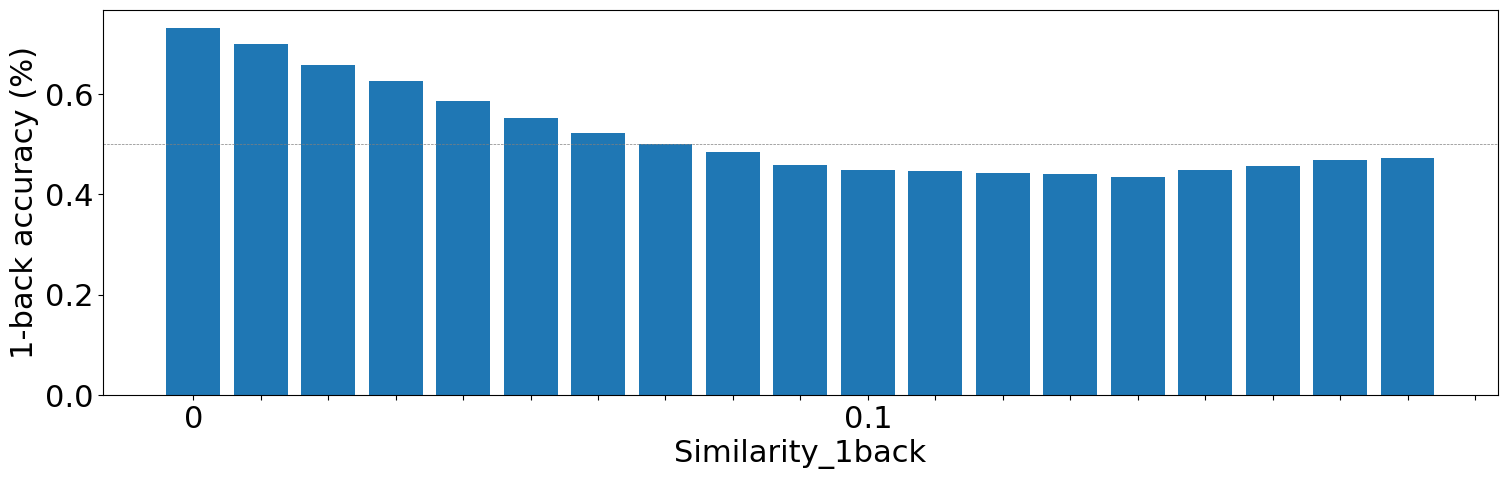

In [312]:
y = data_per_bin_b['1back_accuracy']
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels1 = ['']*(len(x)+1)

temp = 0
numb = 0
while temp < len(x_labels1):
    x_labels1[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels1)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('Similarity_1back')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

In [296]:
np.arange(0.30, 0.69, 0.01)

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69])

<Figure size 640x480 with 0 Axes>

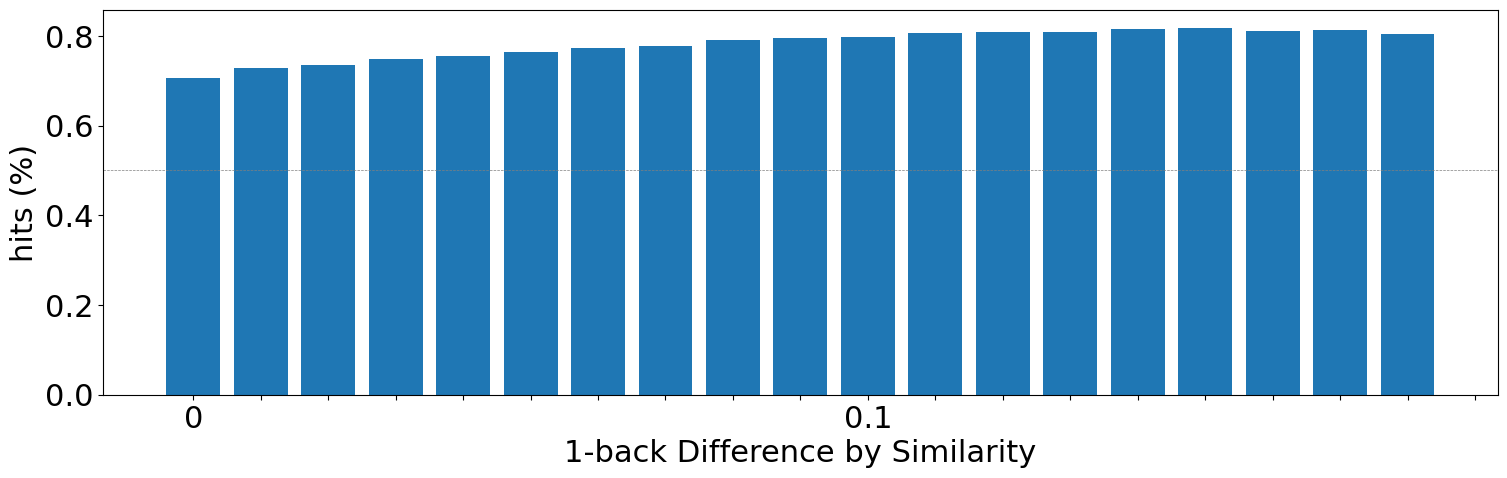

<Figure size 640x480 with 0 Axes>

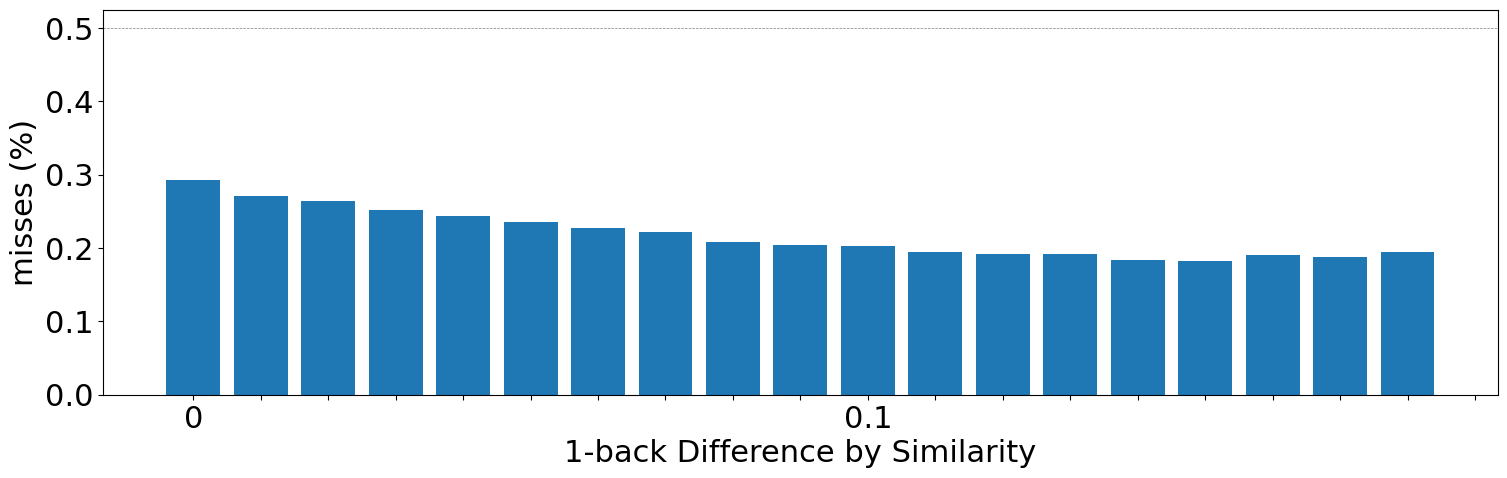

<Figure size 640x480 with 0 Axes>

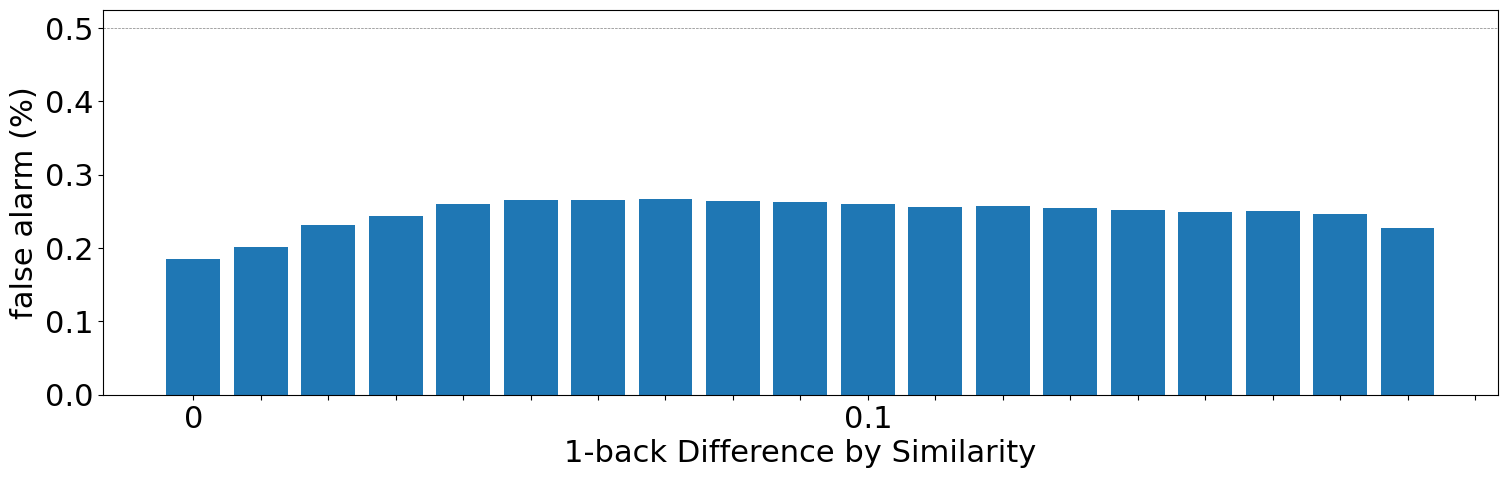

<Figure size 640x480 with 0 Axes>

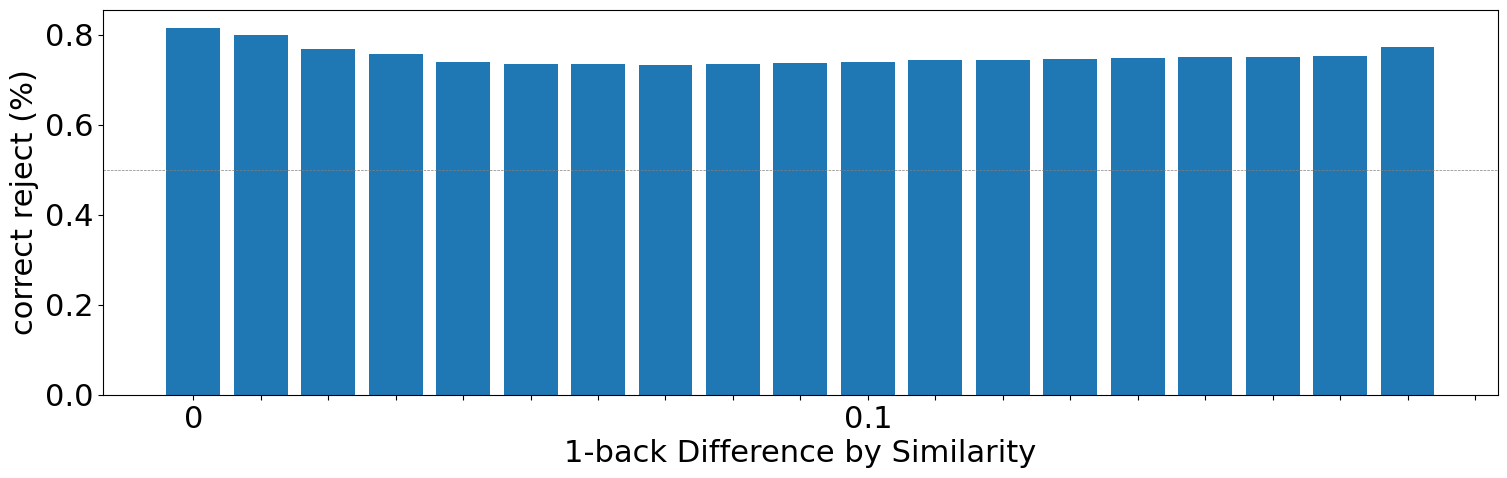

<Figure size 640x480 with 0 Axes>

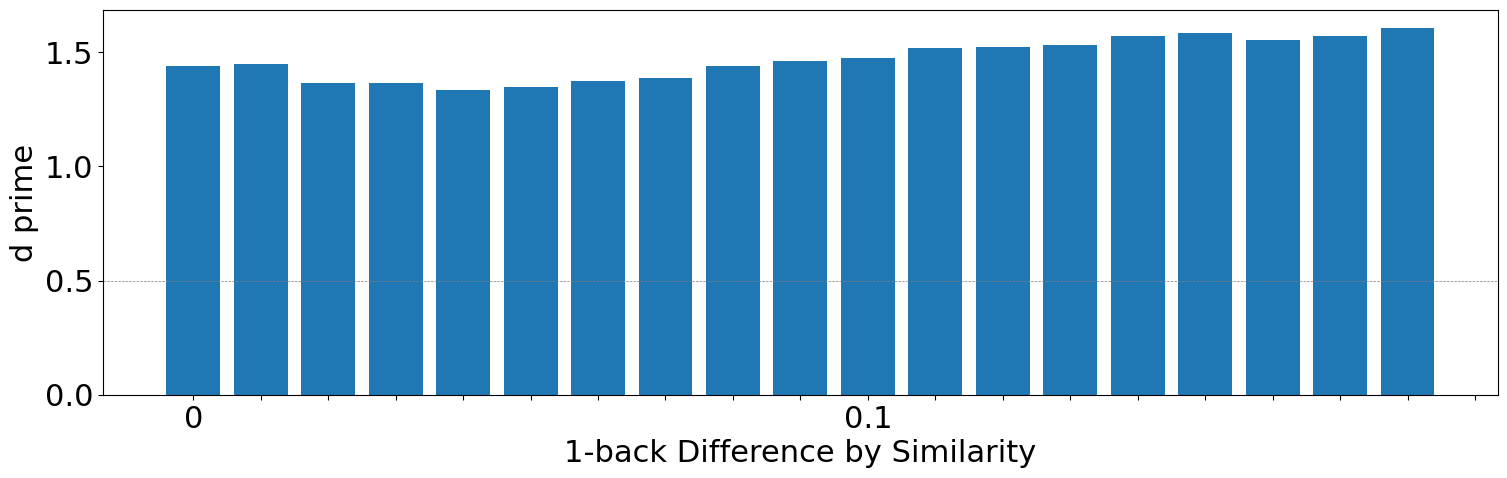

<Figure size 640x480 with 0 Axes>

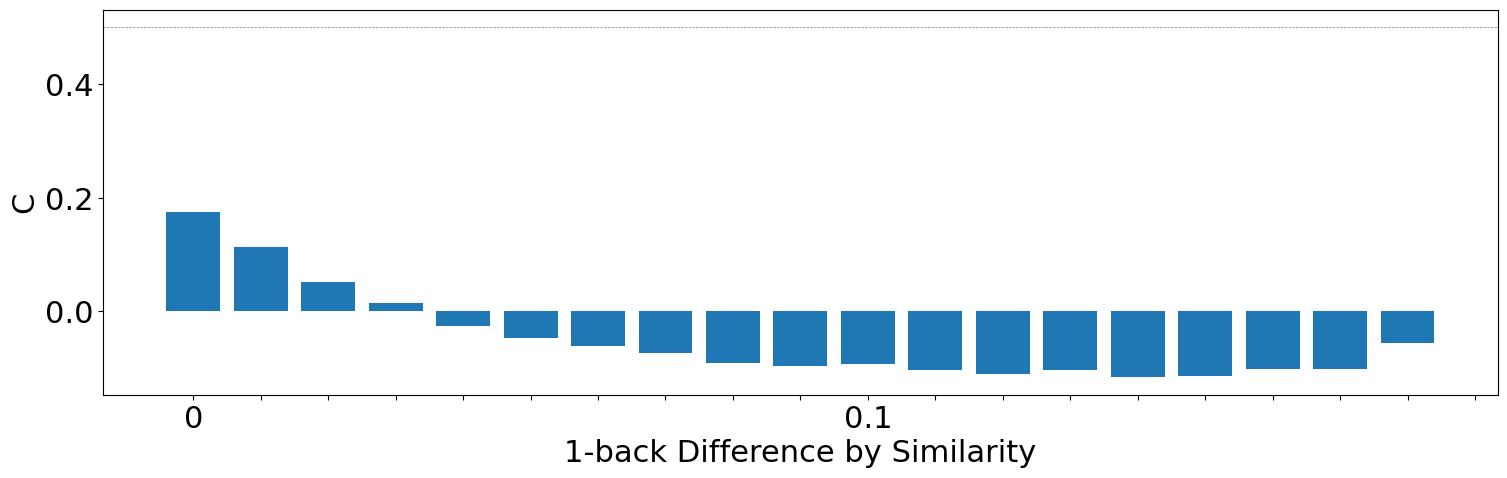

<Figure size 640x480 with 0 Axes>

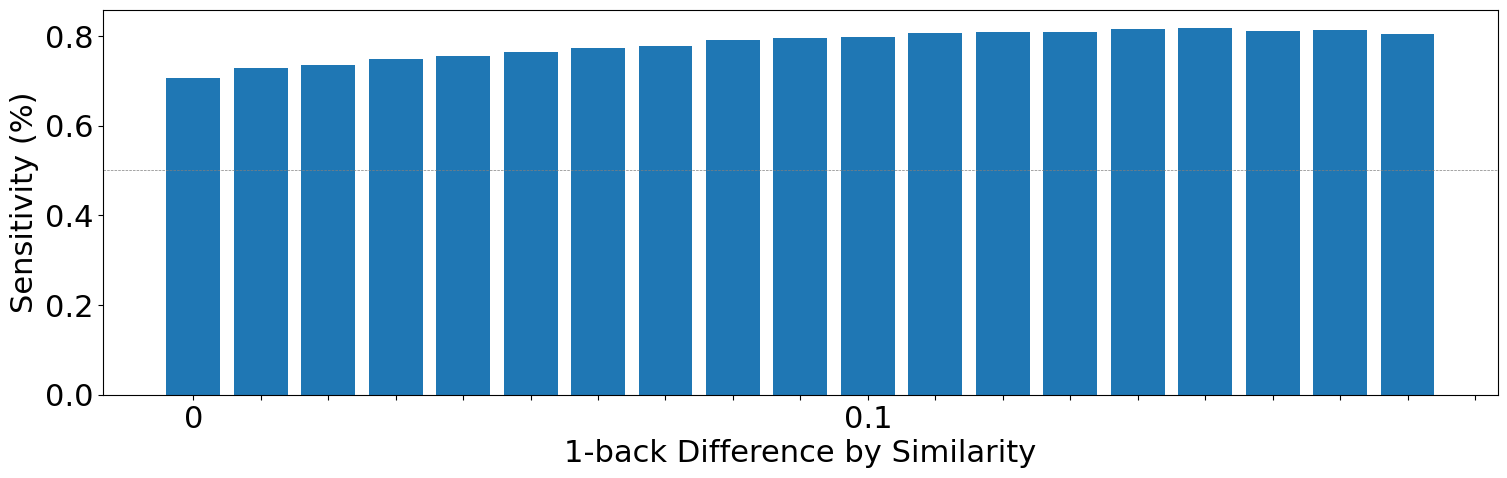

<Figure size 640x480 with 0 Axes>

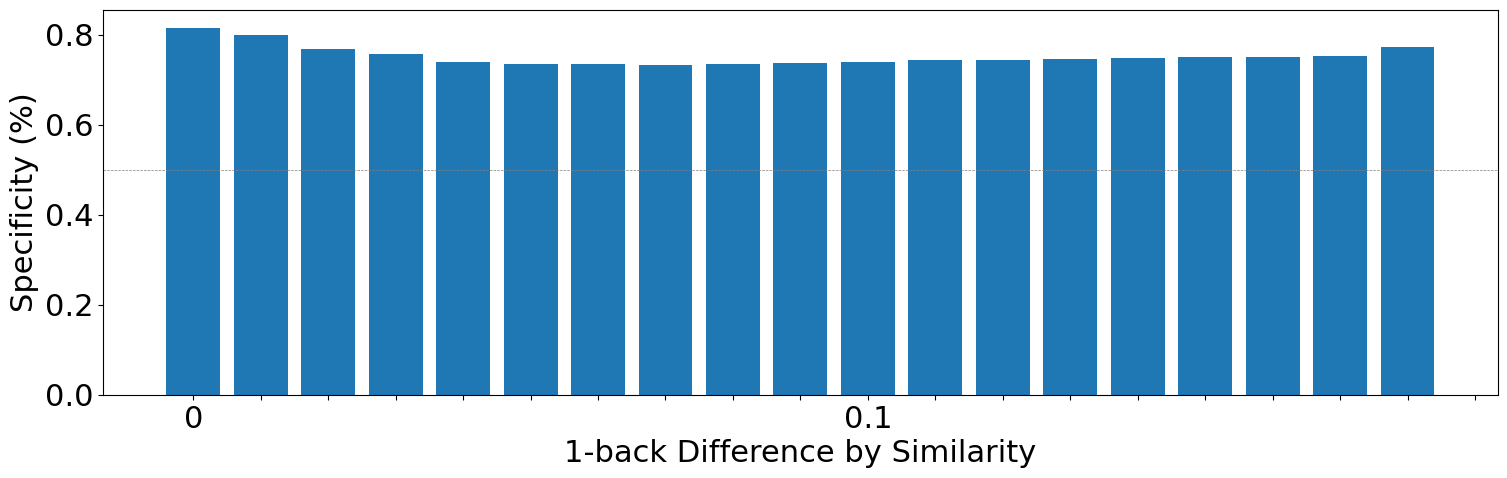

<Figure size 640x480 with 0 Axes>

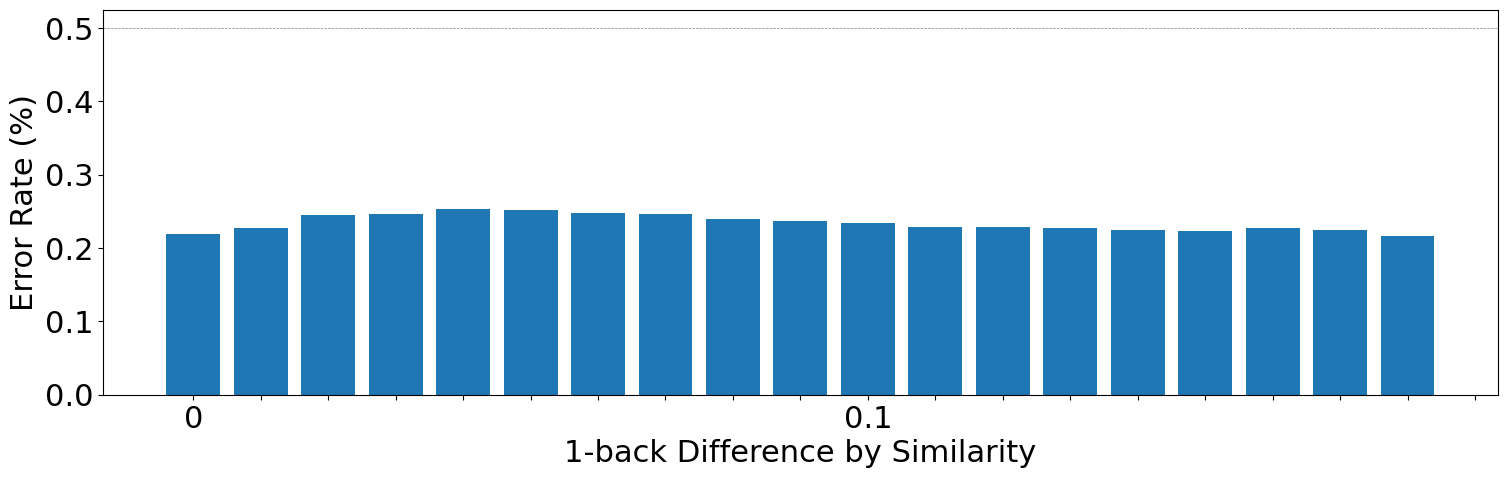

In [313]:
import scipy.stats as stats

hit_1back = []
miss_1back = []
FA_1back = []
CR_1back = []
lengths_1back = []
sensitivity_1back = []
specificity_1back = []
error_rate_1back = []
# balance_rate = []
for start in np.arange(0.3, 0.67, 0.02):
    data_temp = data_Alex[data_Alex['similarity_bins_1back'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
    lengths_1back.append(data_temp.shape[0])
    TP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    FP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    FN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    TN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    
    hit_1back.append(TP / (TP + FN))
    FA_1back.append(FP / (FP + TN))
    miss_1back.append(FN / (FN + TP))
    CR_1back.append(TN / (TN + FP))

    sensitivity_1back.append(TP / (TP + FN))
    specificity_1back.append(TN / (TN + FP))
    error_rate_1back.append((FN + FP) / (TP + FN + FP + TN))

# PLOT 1: hits
plt.figure()
y = hit_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# # PLOT 7: benign samples
# plt.figure()
# y = num_benign_1back
# x = data_per_bin_b.index
# y_pos = np.arange(len(x))
# plt.figure(figsize=(18, 5))
# x_labels = ['']*(len(x)+1)
# temp = 0
# numb = 0
# while temp < len(x_labels):
#     x_labels[temp] = np.around(numb, decimals=1, out=None)
#     temp += 10
#     numb += 0.1
# plt.xticks(np.arange(len(x)+1),x_labels)
# plt.bar(y_pos, y)
# plt.ylabel('number of benigns')
# plt.xlabel('1-back Difference by Similarity')
# #plt.axvline(x=20,linewidth=0.5, color='black')
# plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# # PLOT 8: malignant samples
# plt.figure()
# y = num_malignant_1back
# x = data_per_bin_b.index
# y_pos = np.arange(len(x))
# plt.figure(figsize=(18, 5))
# x_labels = ['']*(len(x)+1)
# temp = 0
# numb = 0
# while temp < len(x_labels):
#     x_labels[temp] = np.around(numb, decimals=1, out=None)
#     temp += 10
#     numb += 0.1
# plt.xticks(np.arange(len(x)+1),x_labels)
# plt.bar(y_pos, y)
# plt.ylabel('number of malignants')
# plt.xlabel('1-back Difference by Similarity')
# #plt.axvline(x=20,linewidth=0.5, color='black')
# plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: sensitivity
plt.figure()
y = sensitivity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 10: Specificity
plt.figure()
y = specificity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 11: Error Rate
plt.figure()
y = error_rate_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

<Figure size 640x480 with 0 Axes>

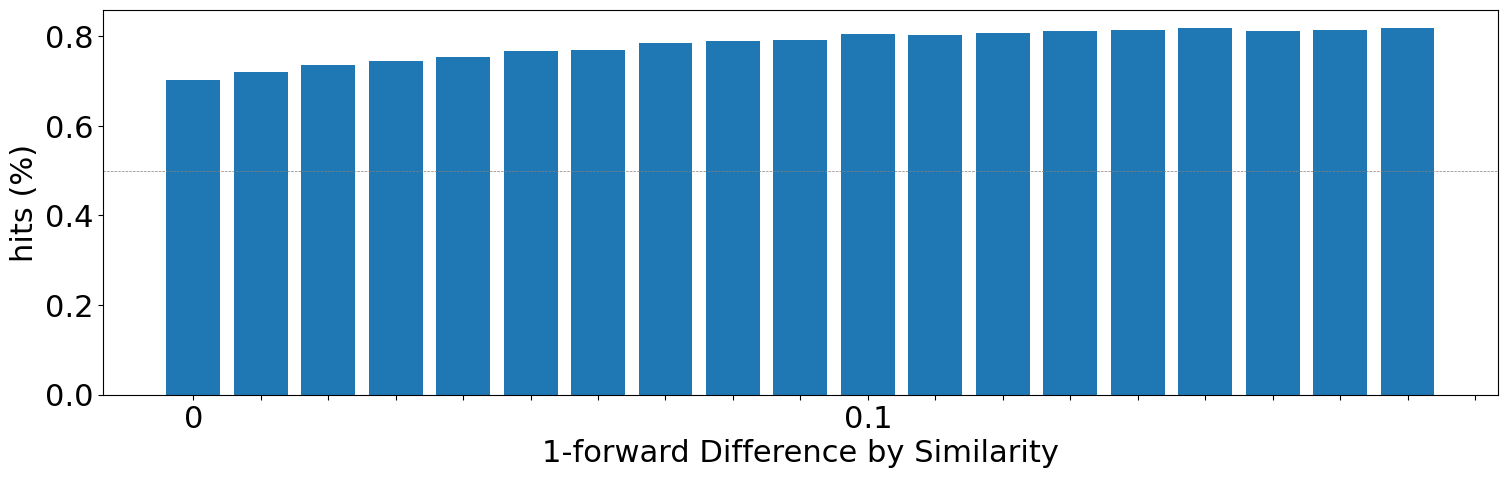

<Figure size 640x480 with 0 Axes>

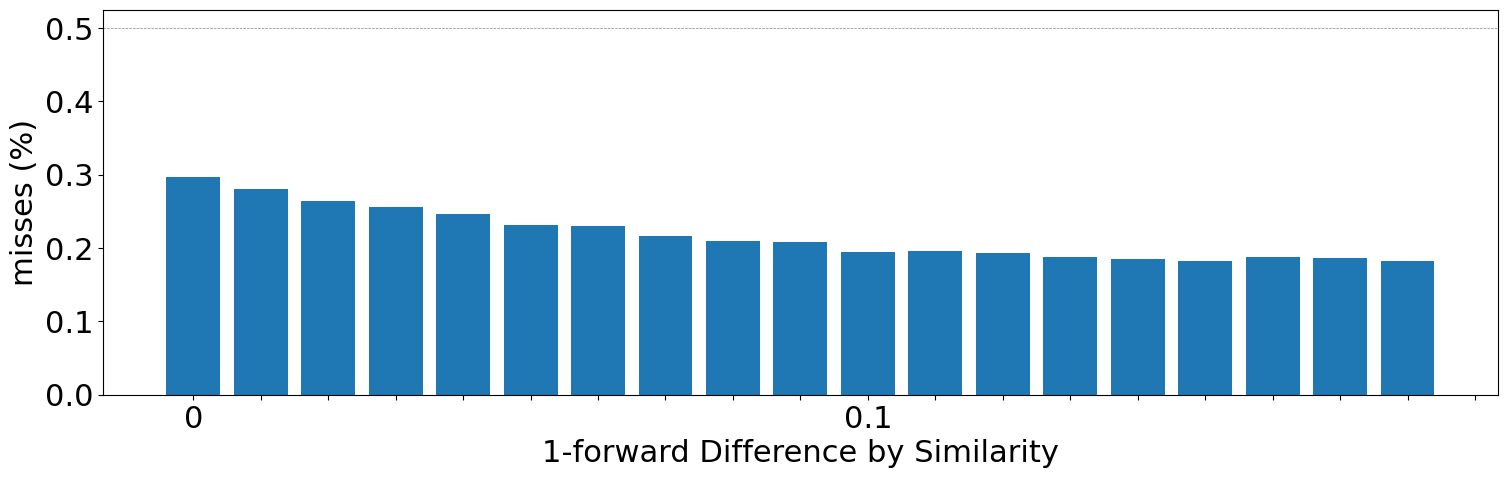

<Figure size 640x480 with 0 Axes>

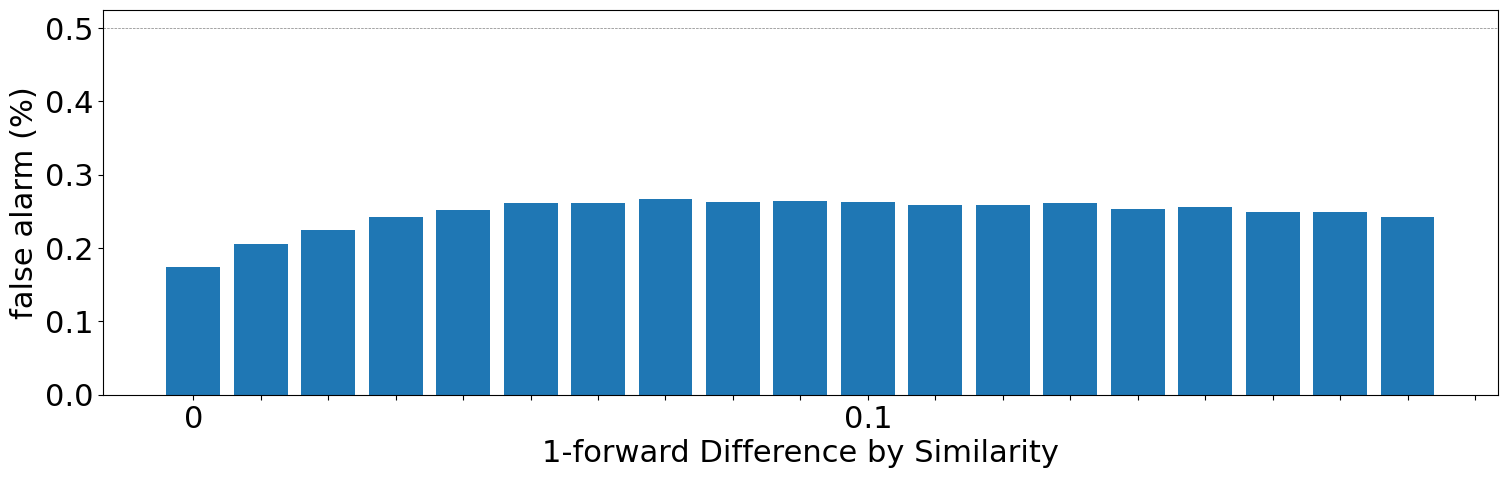

<Figure size 640x480 with 0 Axes>

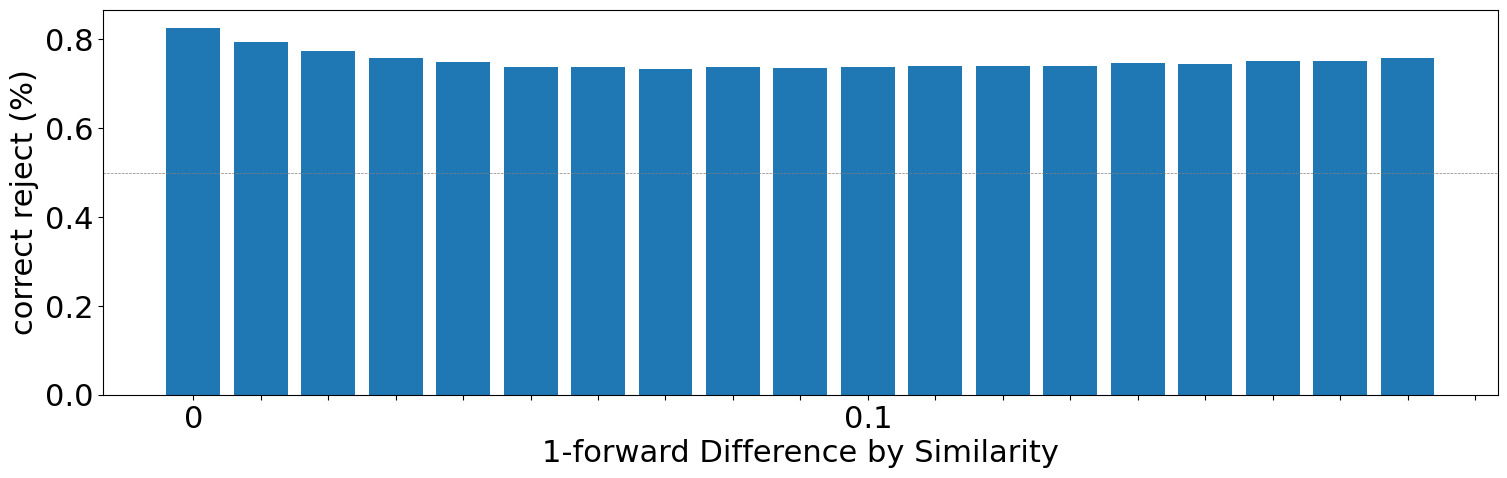

<Figure size 640x480 with 0 Axes>

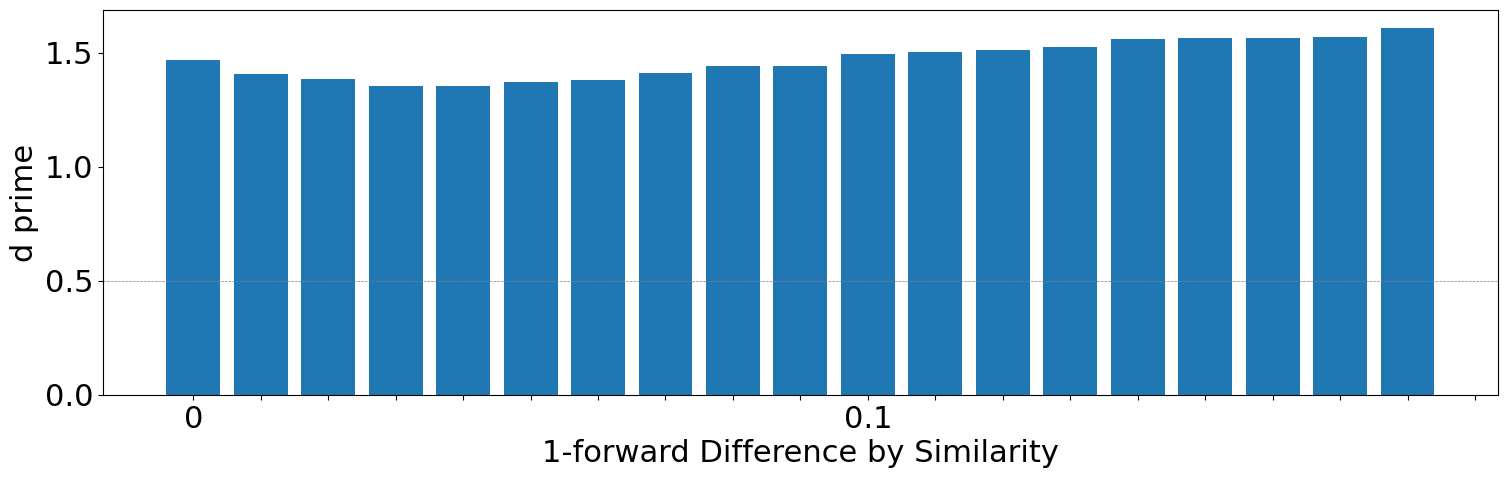

<Figure size 640x480 with 0 Axes>

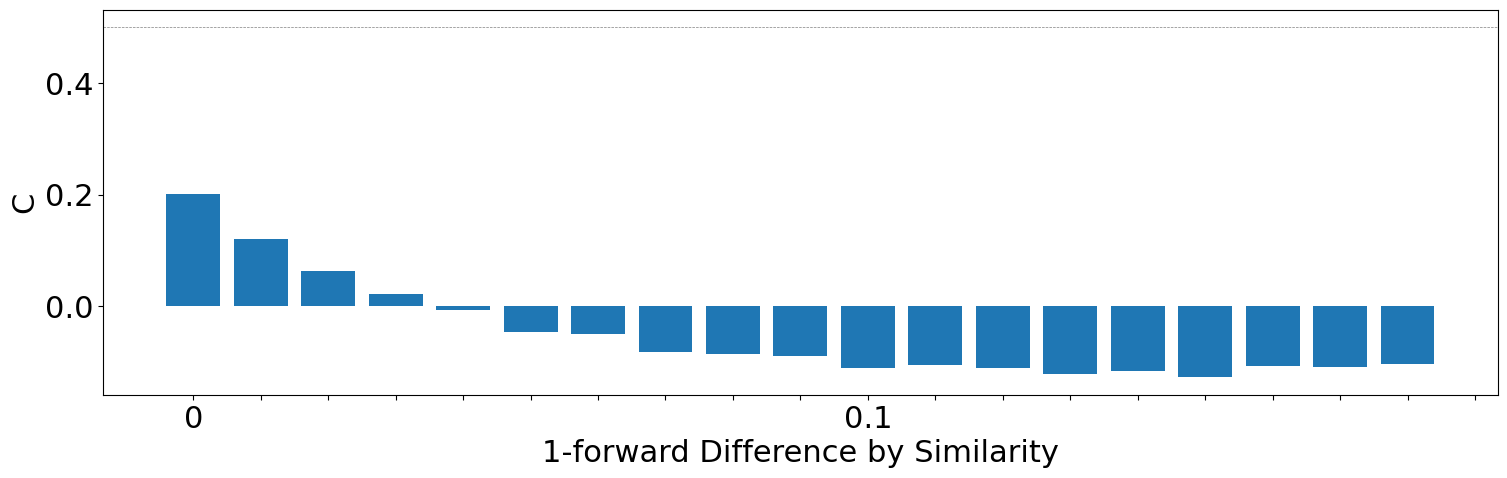

<Figure size 640x480 with 0 Axes>

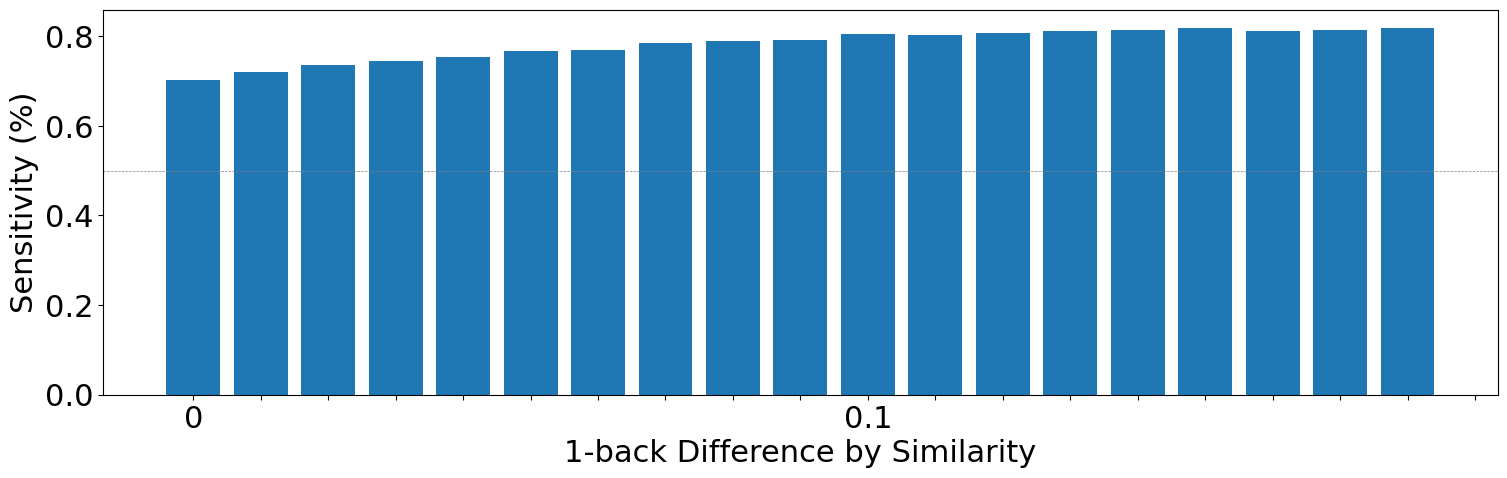

<Figure size 640x480 with 0 Axes>

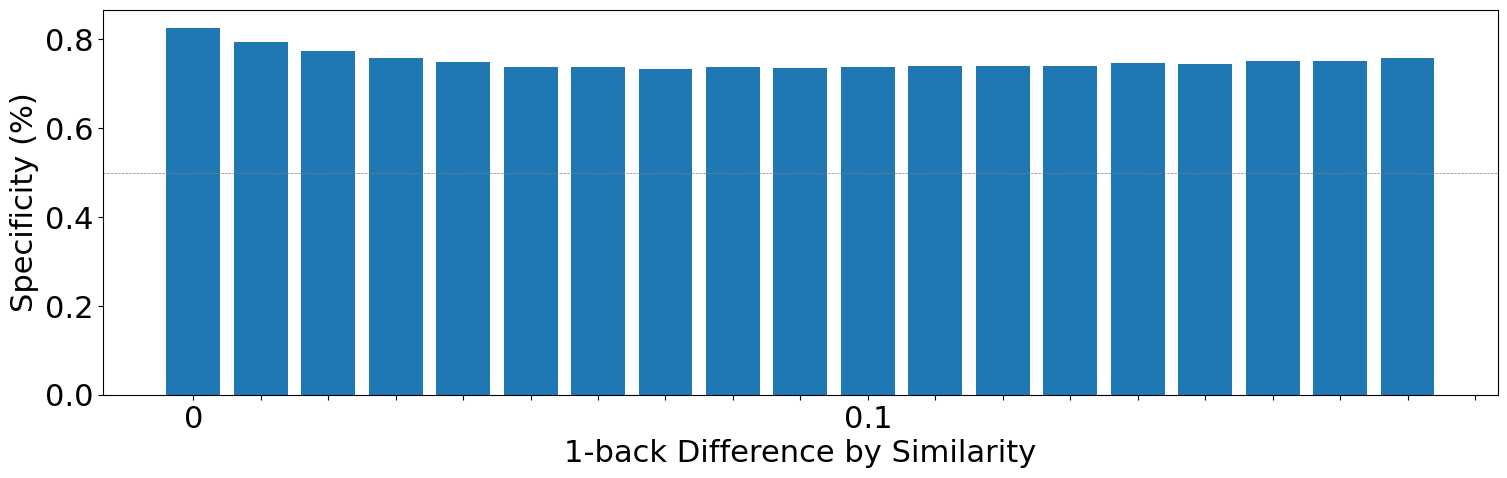

<Figure size 640x480 with 0 Axes>

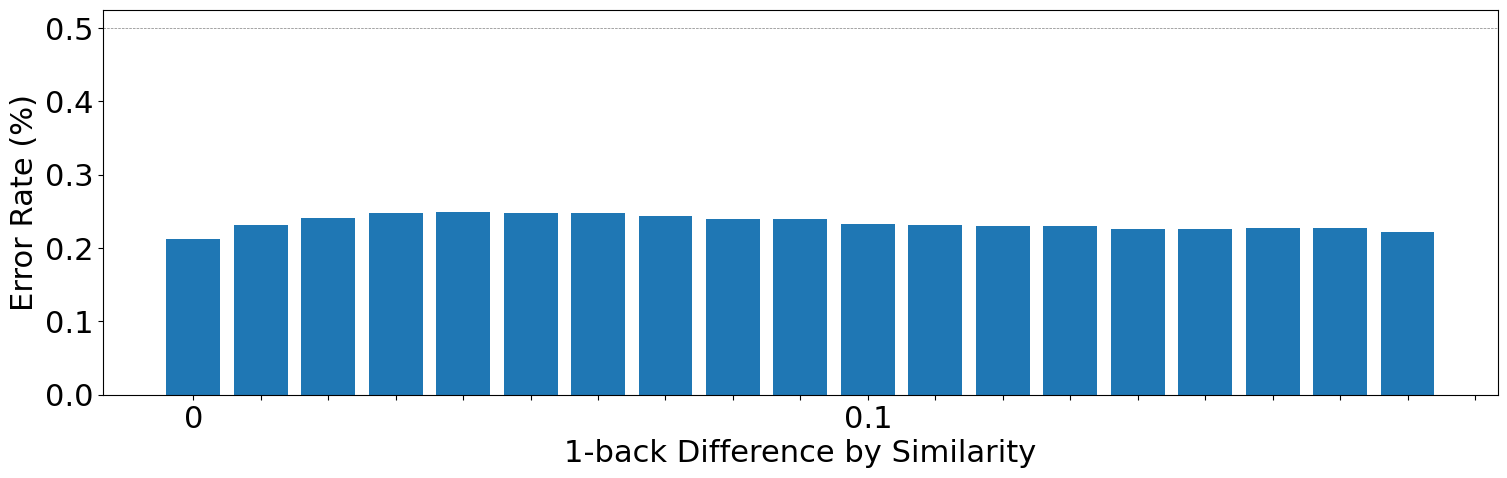

In [314]:
hit_1forward = []
miss_1forward = []
FA_1forward = []
CR_1forward = []
lengths_1forward = []
sensitivity_1forward = []
specificity_1forward = []
error_rate_1forward = []

for start in np.arange(0.3,0.67,0.02):
    data_temp = data_Alex[data_Alex['similarity_bins_1forward'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
    lengths_1forward.append(data_temp.shape[0])
    
    TP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    FP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    FN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    TN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    
    hit_1forward.append(TP / (TP + FN))
    FA_1forward.append(FP / (FP + TN))
    miss_1forward.append(FN / (FN + TP))
    CR_1forward.append(TN / (TN + FP))

    sensitivity_1forward.append(TP / (TP + FN))
    specificity_1forward.append(TN / (TN + FP))
    error_rate_1forward.append((FN + FP) / (TP + FN + FP + TN))

# PLOT 1: hits
plt.figure()
y = hit_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_d = [0 if a != a else a for a in y_1forward_d]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_c = [0 if a != a else a for a in y_1forward_c]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = sensitivity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: Specificity
plt.figure()
y = specificity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: Error Rate
plt.figure()
y = error_rate_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

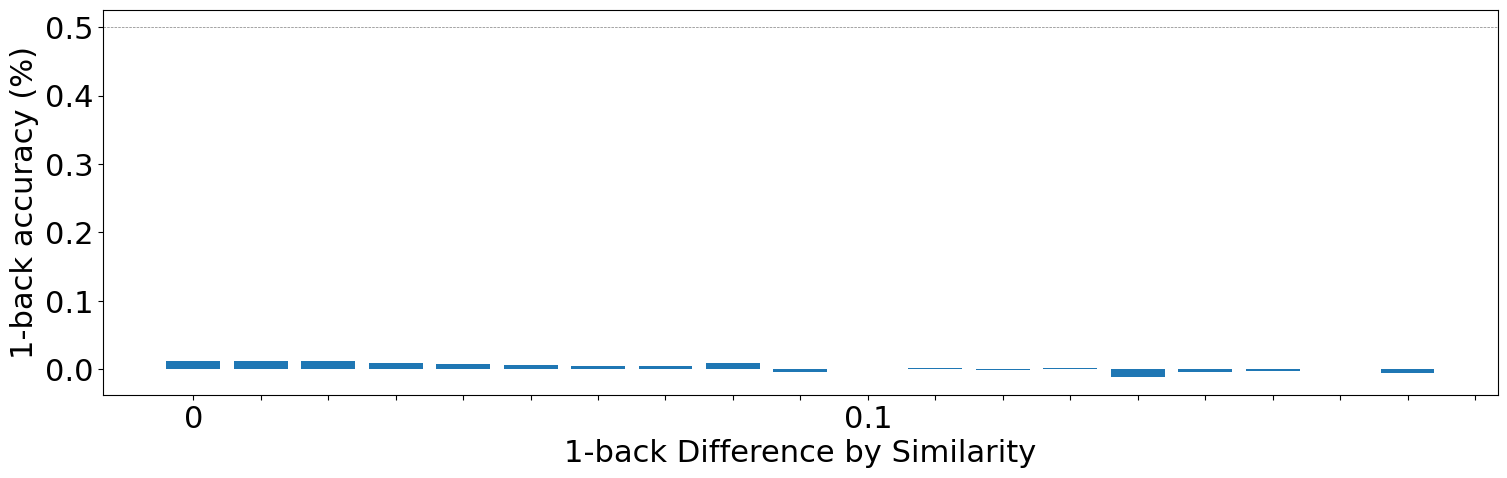

In [315]:
y = data_per_bin_b['1back_accuracy'] - data_per_bin_f['1forward_accuracy']
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

sum of hits:-0.0046650326187547275
sum of miss:0.004665032618754977
sum of FA:-0.008366994804333339
sum of CR:0.00836699480433345
sum of sensitivity:-0.0046650326187547275
sum of specificity:0.00836699480433345
sum of error rate:-0.0019422032277299217


<Figure size 640x480 with 0 Axes>

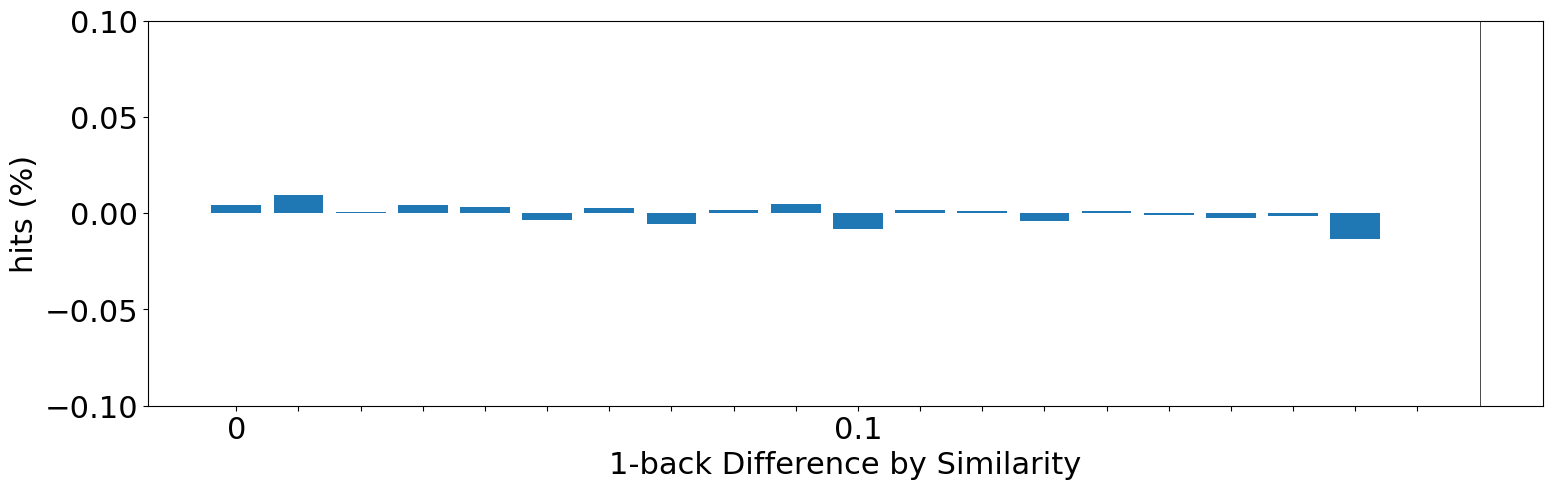

<Figure size 640x480 with 0 Axes>

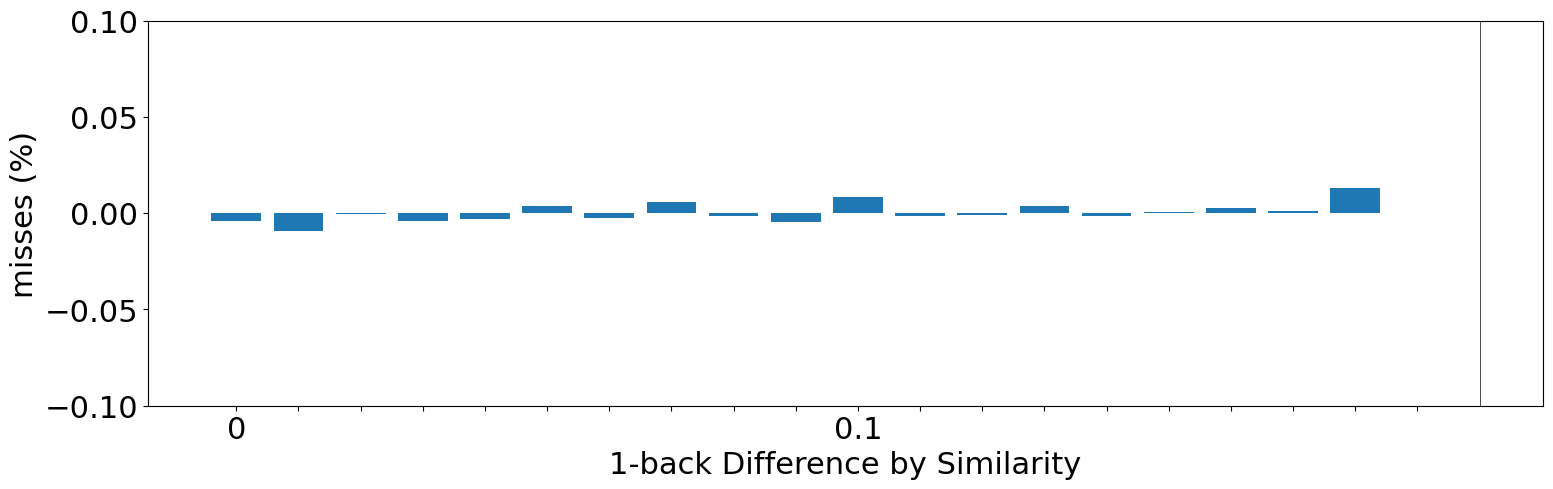

<Figure size 640x480 with 0 Axes>

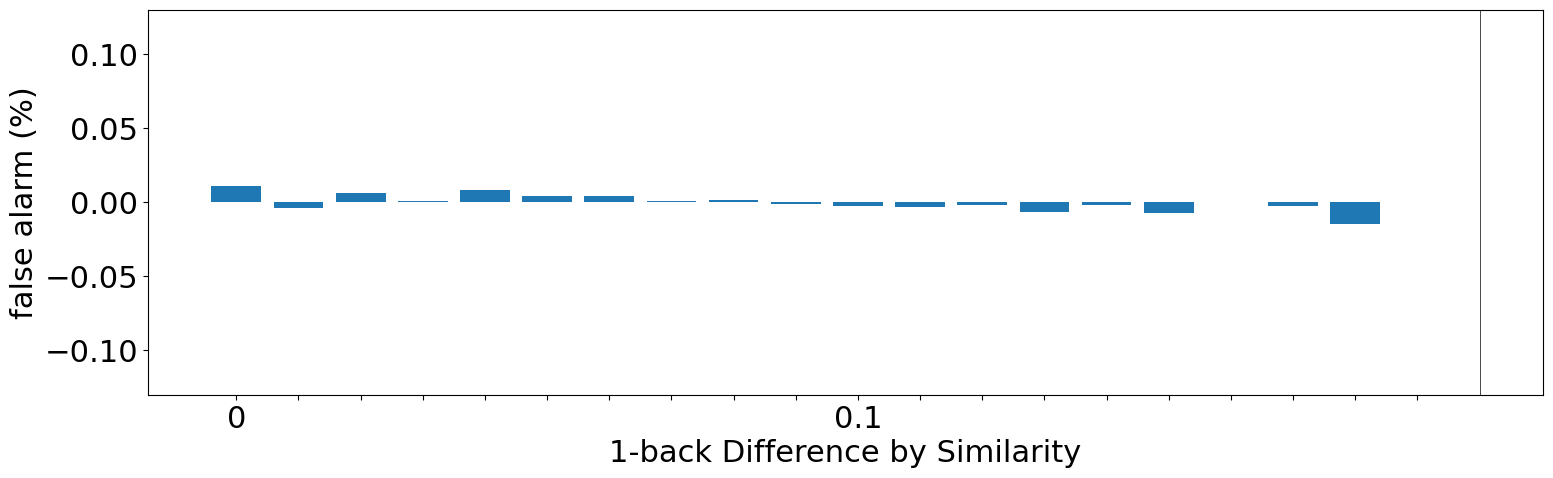

<Figure size 640x480 with 0 Axes>

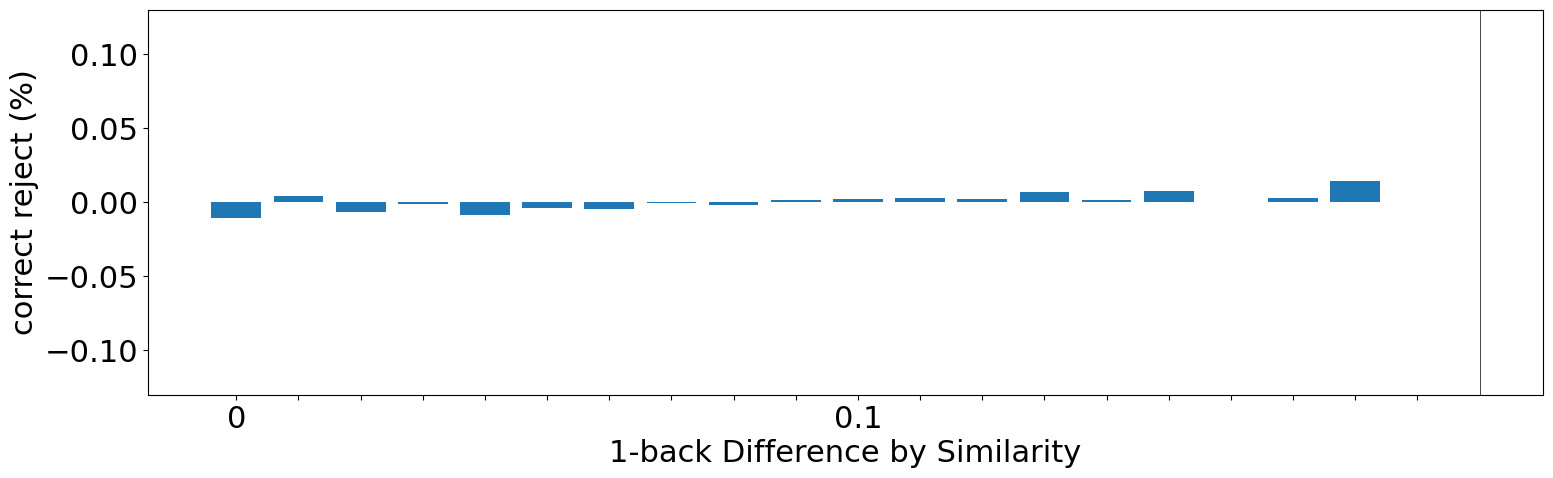

<Figure size 640x480 with 0 Axes>

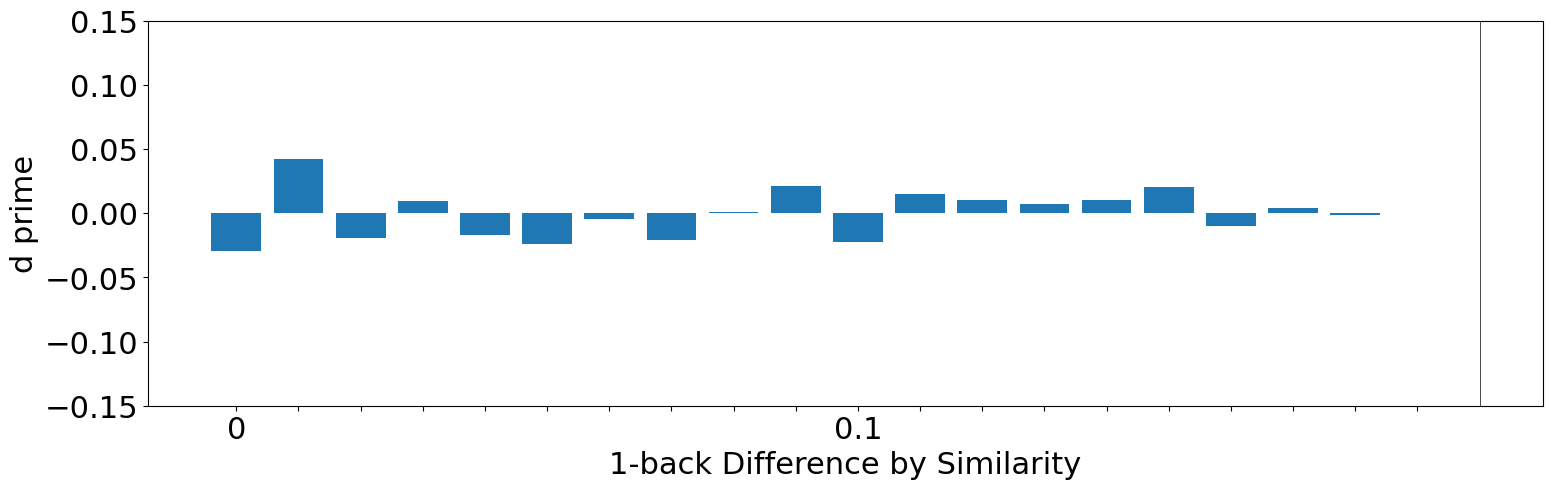

<Figure size 640x480 with 0 Axes>

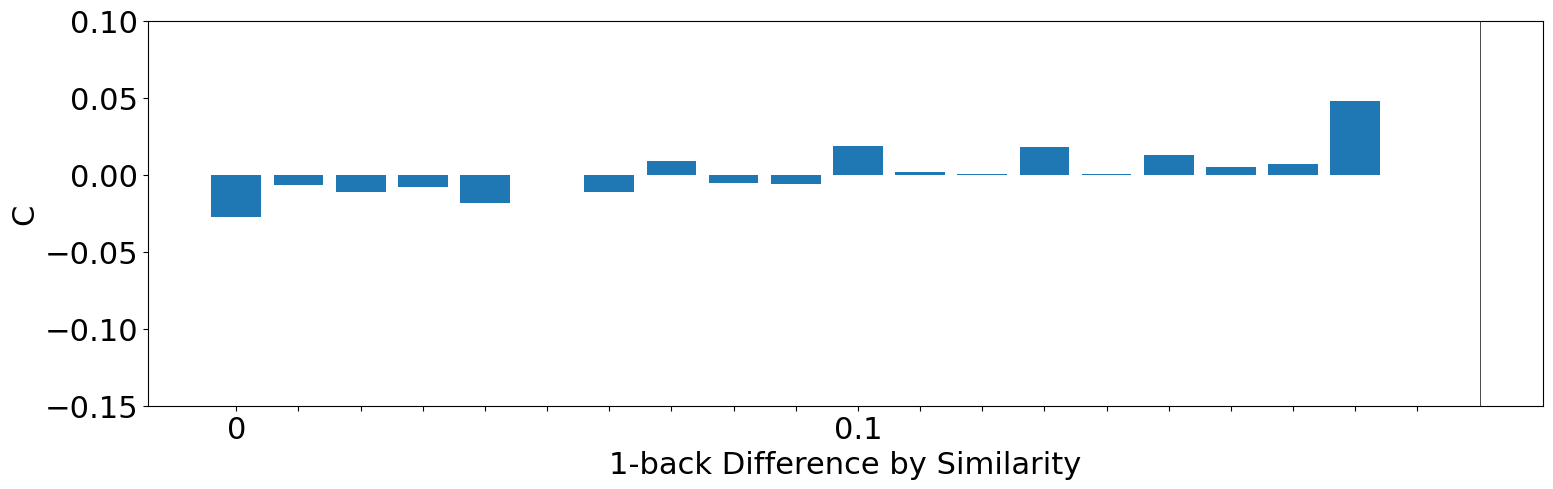

<Figure size 640x480 with 0 Axes>

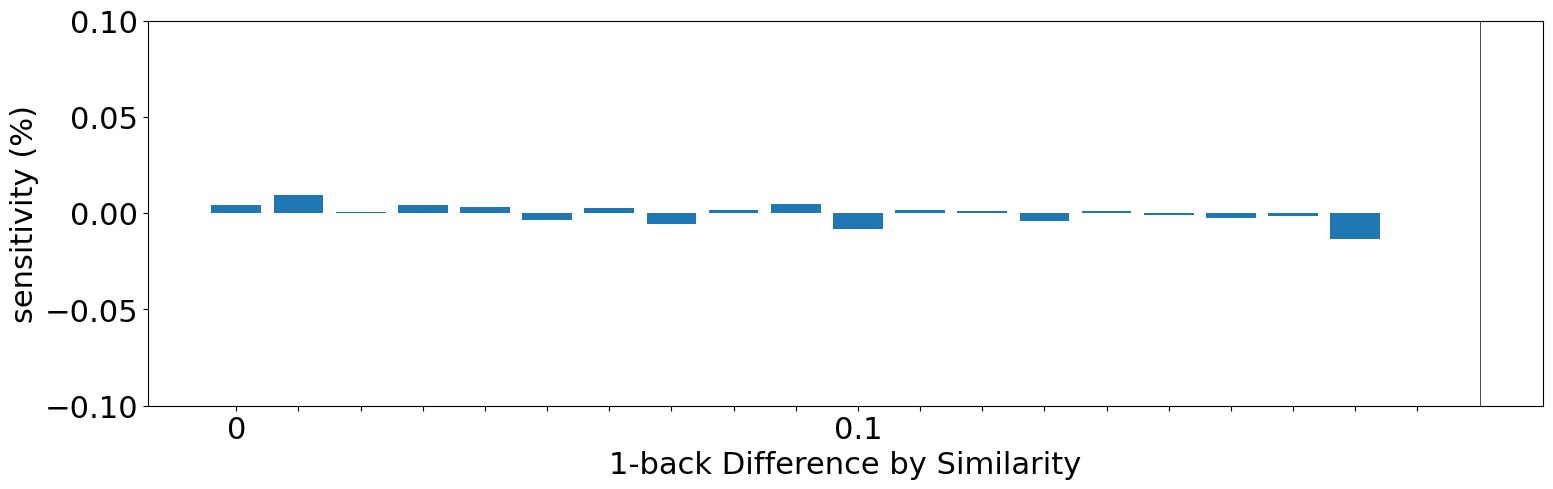

<Figure size 640x480 with 0 Axes>

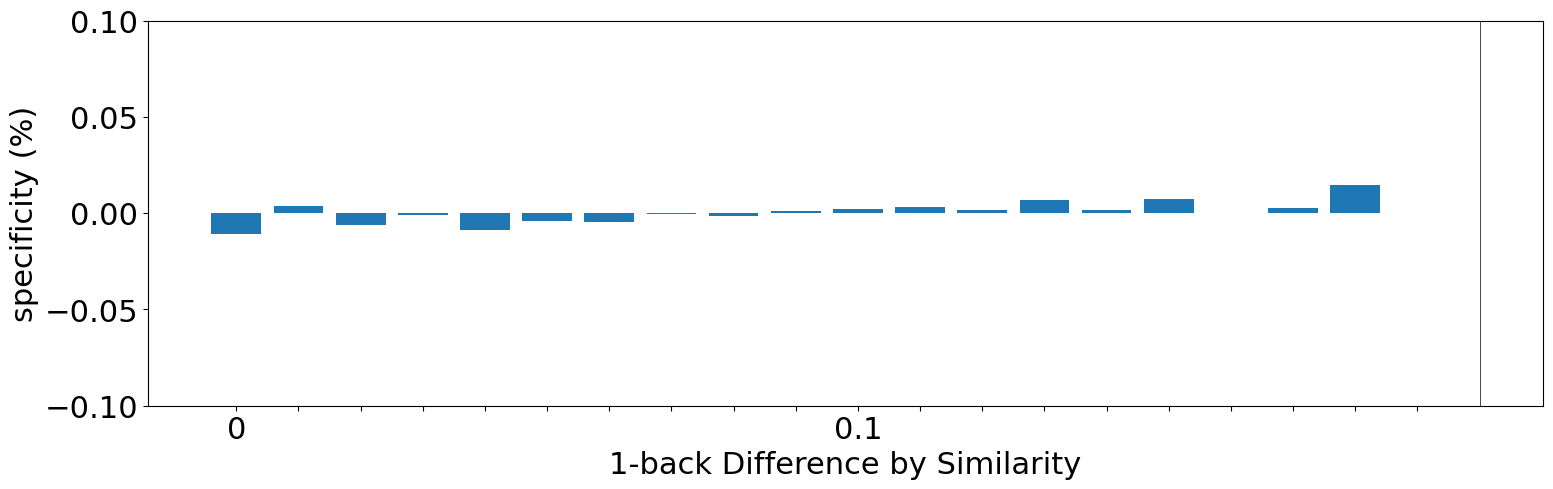

<Figure size 640x480 with 0 Axes>

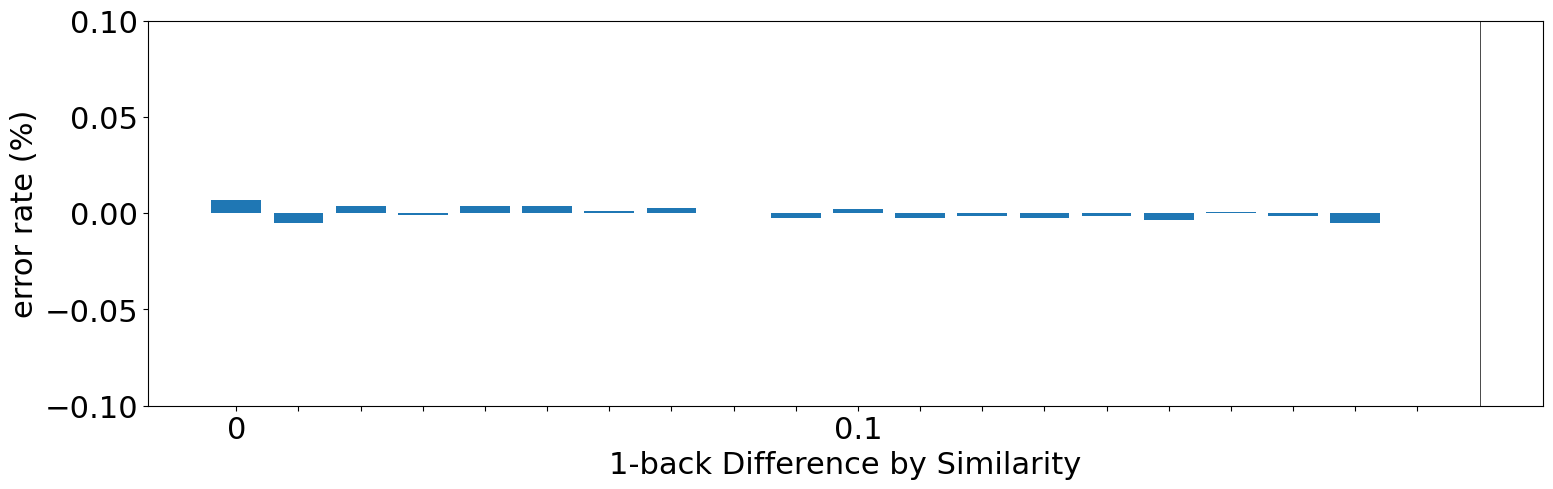

In [316]:
# PLOT 1: hits
plt.figure()
hit_diff = [(a - b) for (a,b) in zip(hit_1back, hit_1forward)]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, hit_diff)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of hits:' + str(sum(hit_diff)))

# PLOT 2: miss
plt.figure()
miss_diff = [(a - b) for (a,b) in zip(miss_1back, miss_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, miss_diff)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of miss:' + str(sum(miss_diff)))

# PLOT 3: false alarm
plt.figure()
FA_diff = [(a - b) for (a,b) in zip(FA_1back, FA_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, FA_diff)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.13, 0.13])
print('sum of FA:' + str(sum(FA_diff)))

# PLOT 4: correct reject
plt.figure()
CR_diff = [(a - b) for (a,b) in zip(CR_1back, CR_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, CR_diff)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.13, 0.13])
print('sum of CR:' + str(sum(CR_diff)))

# PLOT 5: d'
plt.figure()
d_diff = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, d_diff)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.15, 0.15])

# PLOT 6: C
plt.figure()
C_diff = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, C_diff)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.15, 0.1])

# PLOT 7: sensitivity
plt.figure()
sensitivity_diff = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, sensitivity_diff)
plt.ylabel('sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of sensitivity:' + str(sum(sensitivity_diff)))

# PLOT 8: specificity
plt.figure()
specificity_diff = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, specificity_diff)
plt.ylabel('specificity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of specificity:' + str(sum(specificity_diff)))

# PLOT 9: error rate
plt.figure()
error_diff = [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, error_diff)
plt.ylabel('error rate (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of error rate:' + str(sum(error_diff)))

In [192]:
import scipy.stats as stats
import random
from tqdm import tqdm

In [235]:
temp = pd.DataFrame(columns = ['0.3, 0.32','0.32, 0.34', '0.34, 0.36','0.36, 0.38', '0.38, 0.40','0.40, 0.42','0.42, 0.44','0.44, 0.46', 
                               '0.46, 0.48','0.48, 0.50', '0.50, 0.52','0.52, 0.54','0.54, 0.56','0.56, 0.58', '0.58, 0.60','0.60, 0.62',
                               '0.62, 0.64','0.64, 0.66','0.66, 0.68'])

p_m_hit = temp.copy(deep=True)
p_m_miss = temp.copy(deep=True)
p_m_FA = temp.copy(deep=True)
p_m_CR = temp.copy(deep=True)
p_m_dprime = temp.copy(deep=True)
p_m_C = temp.copy(deep=True)
p_m_sensitivity = temp.copy(deep=True)
p_m_specificity = temp.copy(deep=True)
p_m_error_rate = temp.copy(deep=True)

num_perm = 1000
for i in tqdm(range(num_perm)):
    temp_data = data_Alex_filtered.copy(deep=True)
    
#     shuffled_1back = temp_data['similarity_1back'].values
#     shuffled_1forward = temp_data['similarity_1forward'].values
    
#     temp = list(zip(shuffled_1back, shuffled_1forward))
#     random.shuffle(temp)
#     shuffled_1back, shuffled_1forward = zip(*temp)
#     # res1 and res2 come out as tuples, and so must be converted to lists.
#     shuffled_1back, shuffled_1forward = list(shuffled_1back), list(shuffled_1forward)
    
#     temp_data['similarity_1back'] = shuffled_1back
#     temp_data['similarity_1forward'] = shuffled_1forward

    temp_data['similarity_1back'] = temp_data['similarity_1back'].sample(frac=1).values
    temp_data['similarity_1forward'] = temp_data['similarity_1forward'].sample(frac=1).values
    
    temp_data['similarity_bins_1back'] = pd.cut(x=temp_data['similarity_1back'], bins=np.arange(0.30, 0.70, 0.04))
    temp_data['similarity_bins_1forward'] = pd.cut(x=temp_data['similarity_1forward'], bins=np.arange(0.30, 0.70, 0.04))
    data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
    data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
    lenth = temp_data.shape[0]

    hit_1back = []
    miss_1back = []
    FA_1back = []
    CR_1back = []
    lengths_1back = []
    num_benign_1back = []
    num_malignant_1back = []
    sensitivity_1back = []
    specificity_1back = []
    error_rate_1back = []
    # balance_rate = []
    for start in np.arange(0.30, 0.67, 0.02):
        data_temp = temp_data[temp_data['similarity_bins_1back'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
        lengths_1back.append(data_temp.shape[0])
        hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
        FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
        miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
        CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
    #     hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    #     miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

        num_benign_1back.append(FA_1back[-1] + CR_1back[-1])
        num_malignant_1back.append(hit_1back[-1] + miss_1back[-1])
        sensitivity_1back.append(hit_1back[-1] / (hit_1back[-1] + miss_1back[-1]))
        specificity_1back.append(CR_1back[-1] / (CR_1back[-1] + FA_1back[-1]))
        error_rate_1back.append(1 -(hit_1back[-1] + CR_1back[-1]))
    
        
    hit_1forward = []
    miss_1forward = []
    FA_1forward = []
    CR_1forward = []
    lengths_1forward = []
    sensitivity_1forward = []
    specificity_1forward = []
    error_rate_1forward = []

    num_benign_1forward = []
    num_malignant_1forward = []
    for start in np.arange(0.30, 0.67, 0.02):
        data_temp = temp_data[temp_data['similarity_bins_1forward'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
        lengths_1forward.append(data_temp.shape[0])
        hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
        FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
        miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
        CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
    #     hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    #     miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

        num_benign_1forward.append(FA_1forward[-1] + CR_1forward[-1])
        num_malignant_1forward.append(hit_1forward[-1] + miss_1forward[-1])
        sensitivity_1forward.append(hit_1forward[-1] / (hit_1forward[-1] + miss_1forward[-1]))
        specificity_1forward.append(CR_1forward[-1] / (CR_1forward[-1] + FA_1forward[-1]))
        error_rate_1forward.append(1 -(hit_1forward[-1] + CR_1forward[-1]))
        
    y_1back_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1back, FA_1back)]
    y_1back_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1back, FA_1back)]
    y_1forward_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1forward, FA_1forward)]
    y_1forward_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1forward, FA_1forward)]
    
    m_hit= [(a - b) / lenth for (a,b) in zip(hit_1back, hit_1forward)]
    m_miss= [(a - b) / lenth for (a,b) in zip(miss_1back, miss_1forward)]
    m_FA = [(a - b) / lenth for (a,b) in zip(FA_1back, FA_1forward)]
    m_CR = [(a - b) / lenth for (a,b) in zip(CR_1back, CR_1forward)]
    m_dprime = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
    m_C = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
    m_sensitivity = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)]
    m_specificity = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)]
    m_error_rate = [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)]
    
    p_m_hit.loc[i] = m_hit
    p_m_miss.loc[i] = m_miss
    p_m_FA.loc[i] = m_FA
    p_m_CR.loc[i] = m_CR
    p_m_dprime.loc[i] = m_dprime
    p_m_C.loc[i] = m_C
    p_m_sensitivity.loc[i] = m_sensitivity
    p_m_specificity.loc[i] = m_specificity
    p_m_error_rate.loc[i] = m_error_rate

  0%|                                                                                                                                                                                    | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  0%|▌                                                                                                                                                                           | 3/1000 [00:00<03:01,  5.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  1%|█                                                                                                                                                                           | 6/1000 [00:00<02:32,  6.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  1%|█▌                                                                                                                                                                          | 9/1000 [00:01<02:19,  7.10it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  1%|██                                                                                                                                                                         | 12/1000 [00:01<02:13,  7.37it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|██▌                                                                                                                                                                        | 15/1000 [00:02<02:13,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|███                                                                                                                                                                        | 18/1000 [00:02<02:12,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|███▌                                                                                                                                                                       | 21/1000 [00:03<02:11,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|████                                                                                                                                                                       | 24/1000 [00:03<02:11,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  3%|████▌                                                                                                                                                                      | 27/1000 [00:03<02:10,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  3%|█████▏                                                                                                                                                                     | 30/1000 [00:04<02:10,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  3%|█████▋                                                                                                                                                                     | 33/1000 [00:04<02:10,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|██████▏                                                                                                                                                                    | 36/1000 [00:05<02:08,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|██████▋                                                                                                                                                                    | 39/1000 [00:05<02:09,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|███████▏                                                                                                                                                                   | 42/1000 [00:05<02:08,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|███████▋                                                                                                                                                                   | 45/1000 [00:06<02:09,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  5%|████████▏                                                                                                                                                                  | 48/1000 [00:06<02:07,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  5%|████████▋                                                                                                                                                                  | 51/1000 [00:07<02:06,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  5%|█████████▏                                                                                                                                                                 | 54/1000 [00:07<02:06,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  6%|█████████▋                                                                                                                                                                 | 57/1000 [00:07<02:06,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  6%|██████████▎                                                                                                                                                                | 60/1000 [00:08<02:07,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  6%|██████████▊                                                                                                                                                                | 63/1000 [00:08<02:05,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  7%|███████████▎                                                                                                                                                               | 66/1000 [00:09<02:04,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  7%|███████████▊                                                                                                                                                               | 69/1000 [00:09<02:03,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  7%|████████████▎                                                                                                                                                              | 72/1000 [00:09<02:03,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|████████████▊                                                                                                                                                              | 75/1000 [00:10<02:03,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|█████████████▎                                                                                                                                                             | 78/1000 [00:10<02:02,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|█████████████▊                                                                                                                                                             | 81/1000 [00:11<02:02,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|██████████████▎                                                                                                                                                            | 84/1000 [00:11<02:02,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  9%|██████████████▉                                                                                                                                                            | 87/1000 [00:11<02:01,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  9%|███████████████▍                                                                                                                                                           | 90/1000 [00:12<02:01,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  9%|███████████████▉                                                                                                                                                           | 93/1000 [00:12<02:01,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|████████████████▍                                                                                                                                                          | 96/1000 [00:13<02:01,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|████████████████▉                                                                                                                                                          | 99/1000 [00:13<02:01,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|█████████████████▎                                                                                                                                                        | 102/1000 [00:13<02:00,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|█████████████████▊                                                                                                                                                        | 105/1000 [00:14<01:59,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 11%|██████████████████▎                                                                                                                                                       | 108/1000 [00:14<01:58,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 11%|██████████████████▊                                                                                                                                                       | 111/1000 [00:15<01:58,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 11%|███████████████████▍                                                                                                                                                      | 114/1000 [00:15<01:58,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 12%|███████████████████▉                                                                                                                                                      | 117/1000 [00:15<01:57,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 12%|████████████████████▍                                                                                                                                                     | 120/1000 [00:16<01:57,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 12%|████████████████████▉                                                                                                                                                     | 123/1000 [00:16<01:56,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 13%|█████████████████████▍                                                                                                                                                    | 126/1000 [00:17<01:56,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 13%|█████████████████████▉                                                                                                                                                    | 129/1000 [00:17<01:56,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 13%|██████████████████████▍                                                                                                                                                   | 132/1000 [00:17<01:56,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|██████████████████████▉                                                                                                                                                   | 135/1000 [00:18<01:55,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|███████████████████████▍                                                                                                                                                  | 138/1000 [00:18<01:55,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|███████████████████████▉                                                                                                                                                  | 141/1000 [00:19<01:54,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|████████████████████████▍                                                                                                                                                 | 144/1000 [00:19<01:54,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 15%|████████████████████████▉                                                                                                                                                 | 147/1000 [00:19<01:53,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 15%|█████████████████████████▌                                                                                                                                                | 150/1000 [00:20<01:53,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 15%|██████████████████████████                                                                                                                                                | 153/1000 [00:20<01:53,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|██████████████████████████▌                                                                                                                                               | 156/1000 [00:21<01:52,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|███████████████████████████                                                                                                                                               | 159/1000 [00:21<01:52,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|███████████████████████████▌                                                                                                                                              | 162/1000 [00:21<01:51,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|████████████████████████████                                                                                                                                              | 165/1000 [00:22<01:50,  7.54it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 17%|████████████████████████████▌                                                                                                                                             | 168/1000 [00:22<01:50,  7.54it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 17%|█████████████████████████████                                                                                                                                             | 171/1000 [00:23<01:50,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 17%|█████████████████████████████▌                                                                                                                                            | 174/1000 [00:23<01:49,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 18%|██████████████████████████████                                                                                                                                            | 177/1000 [00:23<01:50,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 18%|██████████████████████████████▌                                                                                                                                           | 180/1000 [00:24<01:49,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 18%|███████████████████████████████                                                                                                                                           | 183/1000 [00:24<01:49,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 19%|███████████████████████████████▌                                                                                                                                          | 186/1000 [00:25<01:48,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 19%|████████████████████████████████▏                                                                                                                                         | 189/1000 [00:25<01:48,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 19%|████████████████████████████████▋                                                                                                                                         | 192/1000 [00:25<01:47,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|█████████████████████████████████▏                                                                                                                                        | 195/1000 [00:26<01:47,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|█████████████████████████████████▋                                                                                                                                        | 198/1000 [00:26<01:46,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|██████████████████████████████████▏                                                                                                                                       | 201/1000 [00:27<01:46,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|██████████████████████████████████▋                                                                                                                                       | 204/1000 [00:27<01:46,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 21%|███████████████████████████████████▏                                                                                                                                      | 207/1000 [00:27<01:45,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 21%|███████████████████████████████████▋                                                                                                                                      | 210/1000 [00:28<01:45,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 21%|████████████████████████████████████▏                                                                                                                                     | 213/1000 [00:28<01:44,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|████████████████████████████████████▋                                                                                                                                     | 216/1000 [00:29<01:44,  7.54it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|█████████████████████████████████████▏                                                                                                                                    | 219/1000 [00:29<01:43,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|█████████████████████████████████████▋                                                                                                                                    | 222/1000 [00:29<01:43,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|██████████████████████████████████████▎                                                                                                                                   | 225/1000 [00:30<01:43,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 23%|██████████████████████████████████████▊                                                                                                                                   | 228/1000 [00:30<01:42,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 23%|███████████████████████████████████████▎                                                                                                                                  | 231/1000 [00:31<01:42,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 23%|███████████████████████████████████████▊                                                                                                                                  | 234/1000 [00:31<01:41,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 24%|████████████████████████████████████████▎                                                                                                                                 | 237/1000 [00:31<01:41,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 24%|████████████████████████████████████████▊                                                                                                                                 | 240/1000 [00:32<01:41,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 24%|█████████████████████████████████████████▎                                                                                                                                | 243/1000 [00:32<01:40,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 25%|█████████████████████████████████████████▊                                                                                                                                | 246/1000 [00:33<01:40,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 25%|██████████████████████████████████████████▎                                                                                                                               | 249/1000 [00:33<01:40,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 25%|██████████████████████████████████████████▊                                                                                                                               | 252/1000 [00:33<01:39,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|███████████████████████████████████████████▎                                                                                                                              | 255/1000 [00:34<01:39,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|███████████████████████████████████████████▊                                                                                                                              | 258/1000 [00:34<01:38,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|████████████████████████████████████████████▎                                                                                                                             | 261/1000 [00:35<01:38,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|████████████████████████████████████████████▉                                                                                                                             | 264/1000 [00:35<01:38,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 27%|█████████████████████████████████████████████▍                                                                                                                            | 267/1000 [00:35<01:37,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 27%|█████████████████████████████████████████████▉                                                                                                                            | 270/1000 [00:36<01:38,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 27%|██████████████████████████████████████████████▍                                                                                                                           | 273/1000 [00:36<01:37,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|██████████████████████████████████████████████▉                                                                                                                           | 276/1000 [00:37<01:36,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|███████████████████████████████████████████████▍                                                                                                                          | 279/1000 [00:37<01:36,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|███████████████████████████████████████████████▉                                                                                                                          | 282/1000 [00:37<01:36,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|████████████████████████████████████████████████▍                                                                                                                         | 285/1000 [00:38<01:36,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 29%|████████████████████████████████████████████████▉                                                                                                                         | 288/1000 [00:38<01:36,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 29%|█████████████████████████████████████████████████▍                                                                                                                        | 291/1000 [00:39<01:35,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 29%|█████████████████████████████████████████████████▉                                                                                                                        | 294/1000 [00:39<01:36,  7.35it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 30%|██████████████████████████████████████████████████▍                                                                                                                       | 297/1000 [00:39<01:35,  7.38it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 30%|███████████████████████████████████████████████████                                                                                                                       | 300/1000 [00:40<01:34,  7.38it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 30%|███████████████████████████████████████████████████▌                                                                                                                      | 303/1000 [00:40<01:34,  7.39it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 31%|████████████████████████████████████████████████████                                                                                                                      | 306/1000 [00:41<01:33,  7.42it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 31%|████████████████████████████████████████████████████▌                                                                                                                     | 309/1000 [00:41<01:33,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 31%|█████████████████████████████████████████████████████                                                                                                                     | 312/1000 [00:41<01:32,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|█████████████████████████████████████████████████████▌                                                                                                                    | 315/1000 [00:42<01:32,  7.42it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|██████████████████████████████████████████████████████                                                                                                                    | 318/1000 [00:42<01:32,  7.39it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|██████████████████████████████████████████████████████▌                                                                                                                   | 321/1000 [00:43<01:31,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|███████████████████████████████████████████████████████                                                                                                                   | 324/1000 [00:43<01:31,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 327/1000 [00:43<01:30,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 33%|████████████████████████████████████████████████████████                                                                                                                  | 330/1000 [00:44<01:29,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 33%|████████████████████████████████████████████████████████▌                                                                                                                 | 333/1000 [00:44<01:28,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|█████████████████████████████████████████████████████████                                                                                                                 | 336/1000 [00:45<01:28,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|█████████████████████████████████████████████████████████▋                                                                                                                | 339/1000 [00:45<01:28,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|██████████████████████████████████████████████████████████▏                                                                                                               | 342/1000 [00:45<01:27,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|██████████████████████████████████████████████████████████▋                                                                                                               | 345/1000 [00:46<01:27,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 35%|███████████████████████████████████████████████████████████▏                                                                                                              | 348/1000 [00:46<01:26,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 35%|███████████████████████████████████████████████████████████▋                                                                                                              | 351/1000 [00:47<01:26,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 35%|████████████████████████████████████████████████████████████▏                                                                                                             | 354/1000 [00:47<01:25,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 36%|████████████████████████████████████████████████████████████▋                                                                                                             | 357/1000 [00:47<01:25,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 36%|█████████████████████████████████████████████████████████████▏                                                                                                            | 360/1000 [00:48<01:25,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 36%|█████████████████████████████████████████████████████████████▋                                                                                                            | 363/1000 [00:48<01:24,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 37%|██████████████████████████████████████████████████████████████▏                                                                                                           | 366/1000 [00:49<01:24,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 37%|██████████████████████████████████████████████████████████████▋                                                                                                           | 369/1000 [00:49<01:24,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 37%|███████████████████████████████████████████████████████████████▏                                                                                                          | 372/1000 [00:49<01:23,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 375/1000 [00:50<01:23,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|████████████████████████████████████████████████████████████████▎                                                                                                         | 378/1000 [00:50<01:22,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|████████████████████████████████████████████████████████████████▊                                                                                                         | 381/1000 [00:51<01:22,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|█████████████████████████████████████████████████████████████████▎                                                                                                        | 384/1000 [00:51<01:22,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 39%|█████████████████████████████████████████████████████████████████▊                                                                                                        | 387/1000 [00:51<01:21,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 39%|██████████████████████████████████████████████████████████████████▎                                                                                                       | 390/1000 [00:52<01:21,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 39%|██████████████████████████████████████████████████████████████████▊                                                                                                       | 393/1000 [00:52<01:21,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 396/1000 [00:53<01:20,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|███████████████████████████████████████████████████████████████████▊                                                                                                      | 399/1000 [00:53<01:20,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|████████████████████████████████████████████████████████████████████▎                                                                                                     | 402/1000 [00:53<01:20,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|████████████████████████████████████████████████████████████████████▊                                                                                                     | 405/1000 [00:54<01:19,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 41%|█████████████████████████████████████████████████████████████████████▎                                                                                                    | 408/1000 [00:54<01:18,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 41%|█████████████████████████████████████████████████████████████████████▊                                                                                                    | 411/1000 [00:55<01:18,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 41%|██████████████████████████████████████████████████████████████████████▍                                                                                                   | 414/1000 [00:55<01:18,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 42%|██████████████████████████████████████████████████████████████████████▉                                                                                                   | 417/1000 [00:55<01:17,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 42%|███████████████████████████████████████████████████████████████████████▍                                                                                                  | 420/1000 [00:56<01:17,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 42%|███████████████████████████████████████████████████████████████████████▉                                                                                                  | 423/1000 [00:56<01:17,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 426/1000 [00:57<01:16,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 43%|████████████████████████████████████████████████████████████████████████▉                                                                                                 | 429/1000 [00:57<01:15,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 43%|█████████████████████████████████████████████████████████████████████████▍                                                                                                | 432/1000 [00:57<01:15,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|█████████████████████████████████████████████████████████████████████████▉                                                                                                | 435/1000 [00:58<01:15,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 438/1000 [00:58<01:14,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|██████████████████████████████████████████████████████████████████████████▉                                                                                               | 441/1000 [00:59<01:14,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|███████████████████████████████████████████████████████████████████████████▍                                                                                              | 444/1000 [00:59<01:14,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 45%|███████████████████████████████████████████████████████████████████████████▉                                                                                              | 447/1000 [00:59<01:13,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 45%|████████████████████████████████████████████████████████████████████████████▌                                                                                             | 450/1000 [01:00<01:13,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 45%|█████████████████████████████████████████████████████████████████████████████                                                                                             | 453/1000 [01:00<01:13,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|█████████████████████████████████████████████████████████████████████████████▌                                                                                            | 456/1000 [01:01<01:12,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|██████████████████████████████████████████████████████████████████████████████                                                                                            | 459/1000 [01:01<01:12,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|██████████████████████████████████████████████████████████████████████████████▌                                                                                           | 462/1000 [01:01<01:11,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 465/1000 [01:02<01:11,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 47%|███████████████████████████████████████████████████████████████████████████████▌                                                                                          | 468/1000 [01:02<01:10,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 47%|████████████████████████████████████████████████████████████████████████████████                                                                                          | 471/1000 [01:03<01:10,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 47%|████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 474/1000 [01:03<01:10,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 48%|█████████████████████████████████████████████████████████████████████████████████                                                                                         | 477/1000 [01:03<01:09,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 48%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 480/1000 [01:04<01:09,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 48%|██████████████████████████████████████████████████████████████████████████████████                                                                                        | 483/1000 [01:04<01:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 49%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 486/1000 [01:05<01:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 49%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 489/1000 [01:05<01:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 49%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 492/1000 [01:05<01:07,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 495/1000 [01:06<01:07,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 498/1000 [01:06<01:06,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 501/1000 [01:07<01:06,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 504/1000 [01:07<01:06,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 51%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 507/1000 [01:07<01:05,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 51%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 510/1000 [01:08<01:05,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 51%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 513/1000 [01:08<01:05,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 516/1000 [01:09<01:04,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 519/1000 [01:09<01:04,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 522/1000 [01:09<01:03,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 525/1000 [01:10<01:03,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 528/1000 [01:10<01:03,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 531/1000 [01:11<01:02,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 53%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 534/1000 [01:11<01:02,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 54%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 537/1000 [01:11<01:01,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 54%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 540/1000 [01:12<01:01,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 54%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 543/1000 [01:12<01:01,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 55%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 546/1000 [01:13<01:00,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 55%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 549/1000 [01:13<01:00,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 55%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 552/1000 [01:13<00:59,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 555/1000 [01:14<00:59,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 558/1000 [01:14<00:58,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 561/1000 [01:15<00:58,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 564/1000 [01:15<01:13,  5.91it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 57%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 567/1000 [01:16<01:15,  5.75it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 57%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 570/1000 [01:16<01:04,  6.72it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 573/1000 [01:17<00:59,  7.22it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 576/1000 [01:17<00:57,  7.39it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 579/1000 [01:17<00:56,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 582/1000 [01:18<00:55,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 585/1000 [01:18<00:55,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 588/1000 [01:19<00:54,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 591/1000 [01:19<00:54,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 594/1000 [01:19<00:54,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 597/1000 [01:20<00:53,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 600/1000 [01:20<00:53,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 603/1000 [01:21<00:53,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 606/1000 [01:21<00:52,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 609/1000 [01:21<00:52,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 612/1000 [01:22<00:51,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 615/1000 [01:22<00:51,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 618/1000 [01:23<00:50,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 621/1000 [01:23<00:50,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 624/1000 [01:23<00:50,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 627/1000 [01:24<00:49,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 630/1000 [01:24<00:49,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 633/1000 [01:25<00:48,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 636/1000 [01:25<00:48,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 639/1000 [01:25<00:48,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 642/1000 [01:26<00:47,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 645/1000 [01:26<00:47,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 648/1000 [01:27<00:47,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 651/1000 [01:27<00:46,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 654/1000 [01:27<00:46,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 657/1000 [01:28<00:45,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 660/1000 [01:28<00:45,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 663/1000 [01:29<00:45,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 666/1000 [01:29<00:44,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 669/1000 [01:29<00:44,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 672/1000 [01:30<00:43,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 675/1000 [01:30<00:43,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 678/1000 [01:31<00:43,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 681/1000 [01:31<00:42,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 684/1000 [01:31<00:42,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 687/1000 [01:32<00:41,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 690/1000 [01:32<00:41,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 693/1000 [01:33<00:40,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 696/1000 [01:33<00:40,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 699/1000 [01:33<00:40,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 702/1000 [01:34<00:39,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 705/1000 [01:34<00:39,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 708/1000 [01:35<00:38,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 711/1000 [01:35<00:38,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 714/1000 [01:35<00:38,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 717/1000 [01:36<00:37,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 720/1000 [01:36<00:37,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 723/1000 [01:37<00:36,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 726/1000 [01:37<00:36,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 729/1000 [01:37<00:36,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 732/1000 [01:38<00:35,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 735/1000 [01:38<00:35,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 738/1000 [01:39<00:34,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 741/1000 [01:39<00:34,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 744/1000 [01:39<00:34,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 747/1000 [01:40<00:33,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 750/1000 [01:40<00:33,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 753/1000 [01:41<00:33,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 756/1000 [01:41<00:32,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 759/1000 [01:41<00:32,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 762/1000 [01:42<00:31,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 765/1000 [01:42<00:31,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 768/1000 [01:43<00:31,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 771/1000 [01:43<00:30,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 774/1000 [01:43<00:30,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 777/1000 [01:44<00:29,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 780/1000 [01:44<00:29,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 783/1000 [01:45<00:29,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 786/1000 [01:45<00:28,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 789/1000 [01:45<00:28,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 792/1000 [01:46<00:27,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 795/1000 [01:46<00:27,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 798/1000 [01:47<00:26,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 801/1000 [01:47<00:26,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 804/1000 [01:47<00:26,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 807/1000 [01:48<00:25,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 810/1000 [01:48<00:25,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 813/1000 [01:49<00:25,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 816/1000 [01:49<00:24,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 819/1000 [01:49<00:24,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 822/1000 [01:50<00:23,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 825/1000 [01:50<00:23,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 828/1000 [01:51<00:23,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 831/1000 [01:51<00:22,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 834/1000 [01:51<00:22,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 837/1000 [01:52<00:21,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 840/1000 [01:52<00:21,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 843/1000 [01:53<00:21,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 846/1000 [01:53<00:20,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 849/1000 [01:53<00:20,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 852/1000 [01:54<00:19,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 855/1000 [01:54<00:19,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 858/1000 [01:55<00:18,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 861/1000 [01:55<00:18,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 864/1000 [01:55<00:18,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 867/1000 [01:56<00:17,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 870/1000 [01:56<00:17,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 873/1000 [01:57<00:17,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 876/1000 [01:57<00:16,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 879/1000 [01:57<00:16,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 882/1000 [01:58<00:15,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 885/1000 [01:58<00:15,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 888/1000 [01:59<00:14,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 891/1000 [01:59<00:14,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 894/1000 [01:59<00:14,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 897/1000 [02:00<00:13,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 900/1000 [02:00<00:13,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 903/1000 [02:01<00:13,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 906/1000 [02:01<00:12,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 909/1000 [02:01<00:12,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 912/1000 [02:02<00:11,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 915/1000 [02:02<00:11,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 918/1000 [02:03<00:10,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 921/1000 [02:03<00:10,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 924/1000 [02:03<00:10,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 927/1000 [02:04<00:09,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 930/1000 [02:04<00:09,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 933/1000 [02:05<00:08,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 936/1000 [02:05<00:08,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 939/1000 [02:05<00:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 942/1000 [02:06<00:07,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 945/1000 [02:06<00:07,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 948/1000 [02:07<00:06,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 951/1000 [02:07<00:06,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 954/1000 [02:07<00:06,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 957/1000 [02:08<00:05,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 960/1000 [02:08<00:05,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 963/1000 [02:09<00:04,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 966/1000 [02:09<00:04,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 969/1000 [02:10<00:04,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 972/1000 [02:10<00:03,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 975/1000 [02:10<00:03,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 978/1000 [02:11<00:02,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 981/1000 [02:11<00:02,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 984/1000 [02:12<00:02,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 987/1000 [02:12<00:01,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 990/1000 [02:12<00:01,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 993/1000 [02:13<00:00,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 996/1000 [02:13<00:00,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [02:14<00:00,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

In [237]:
num_bars = 9
num_perm = 1000

hit_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_hit.iloc[j,i] > hit_diff[i]:
            hit_check[i] += 1
#     if hit_check[i] > num_perm / 2:
#         hit_check[i] = num_perm - hit_check[i]
        
hit_check = hit_check / num_perm
print(hit_check)

miss_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_miss.iloc[j,i] > miss_diff[i]:
            miss_check[i] += 1
#     if miss_check[i] > num_perm / 2:
#         miss_check[i] = num_perm - miss_check[i]
        
miss_check = miss_check / num_perm
print(miss_check)

FA_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_FA.iloc[j,i] > FA_diff[i]:
            FA_check[i] += 1
#     if FA_check[i] > num_perm / 2:
#         FA_check[i] = num_perm - FA_check[i]
        
FA_check = FA_check / num_perm
print(FA_check)

CR_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_CR.iloc[j,i] > CR_diff[i]:
            CR_check[i] += 1
#     if CR_check[i] > num_perm / 2:
#         CR_check[i] = num_perm - CR_check[i]
        
CR_check = CR_check / num_perm
print(CR_check)

d_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_dprime.iloc[j,i] > d_diff[i]:
            d_check[i] += 1
#     if d_check[i] > num_perm / 2:
#         d_check[i] = num_perm - d_check[i]
        
d_check = d_check / num_perm
print(d_check)

C_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_C.iloc[j,i] > C_diff[i]:
            C_check[i] += 1
#     if C_check[i] > num_perm / 2:
#         C_check[i] = num_perm - C_check[i]
        
C_check = C_check / num_perm
print(C_check)

sensitivity_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_sensitivity.iloc[j,i] > sensitivity_diff[i]:
            sensitivity_check[i] += 1
#     if sensitivity_check[i] > num_perm / 2:
#         sensitivity_check[i] = num_perm - sensitivity_check[i]
        
sensitivity_check = sensitivity_check / num_perm
print(sensitivity_check)

specificity_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_specificity.iloc[j,i] > specificity_diff[i]:
            specificity_check[i] += 1
#     if specificity_check[i] > num_perm / 2:
#         specificity_check[i] = num_perm - specificity_check[i]
        
specificity_check = specificity_check / num_perm
print(specificity_check)

error_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_error_rate.iloc[j,i] > error_diff[i]:
            error_check[i] += 1
#     if error_check[i] > num_perm / 2:
#         error_check[i] = num_perm - error_check[i]
        
error_check = error_check / num_perm
print(error_check)


[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [218]:
C_diff

[-0.02811083765040434,
 -0.01289194915839198,
 -0.019207852875653852,
 0.00823641374551054,
 0.006678855538549966,
 0.00586509561771531,
 0.007405056504358631,
 0.00236315195998571,
 -0.00035182257916288595]

In [219]:
p_m_C

0.3, 0.34  0.34, 0.38  0.38, 0.42  0.42, 0.46  0.46, 0.50  0.50, 0.54  \
0    -0.003421   -0.009187   -0.000456    0.016907   -0.007652   -0.014591   
1    -0.041355    0.005404    0.002166    0.000144   -0.001364    0.010429   
2     0.014456    0.005764    0.006166   -0.004063   -0.003418    0.002908   
3     0.027172   -0.024304    0.013173    0.003491    0.012283   -0.017960   
4    -0.040390    0.016456   -0.009349    0.004982   -0.002297    0.007406   
..         ...         ...         ...         ...         ...         ...   
995   0.008001    0.020457   -0.010812   -0.006313   -0.005236    0.016181   
996  -0.015307    0.018032    0.004631   -0.012731    0.005592    0.001970   
997  -0.008574   -0.002572    0.009035    0.006571    0.001089   -0.013908   
998   0.003086   -0.007999    0.003689   -0.010201    0.003957    0.008704   
999   0.010289   -0.009514    0.006407    0.001419    0.012299   -0.004115   

     0.54, 0.58  0.58, 0.62  0.62, 0.66  
0      0.003851    0.003202    0.015736  
1     -0.004352   -0.012758    0.011745  
2     -0.002244   -0.018776    0.018549  
3      0.005705   -0.005911   -0.024788  
4      0.000018   -0.005407   -0.006023  
..          ...         ...         ...  
995   -0.001884   -0.027090    0.014573  
996   -0.005935   -0.004867    0.019131  
997    0.000292    0.009644   -0.009434  
998   -0.006371   -0.007139    0.010724  
999   -0.024001   -0.003073    0.022560  

[1000 rows x 9 columns]

In [3]:
# Malignancy plot
x = combined_images.index
y = combined_images['score']
plt.figure(figsize=(18, 5))
plt.scatter(x,y,s=0.5)
plt.axhline(y=0,linewidth=0.5, color='black')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel('malignancy')
plt.xlabel('ordered images')
plt.show()

KeyboardInterrupt: 

In [4]:
# number of malignant images: 1110, min times an image was shown: 95, max: 380:
data['origin'][data['current_correct_answer']== "['melanoma']"].value_counts() 

# number of benign images: 6688, min times an image was shown: 34, max: 106:
data['origin'][data['current_correct_answer']== "['nevus']"].value_counts() 

ISIC_0028136.jpg    106
ISIC_0028675.jpg    102
ISIC_0024894.jpg    102
ISIC_0028800.jpg    101
ISIC_0024784.jpg    101
ISIC_0025653.jpg    101
ISIC_0032801.jpg    101
ISIC_0030269.jpg    101
ISIC_0026764.jpg    100
ISIC_0031014.jpg    100
ISIC_0031316.jpg    100
ISIC_0025562.jpg    100
ISIC_0032912.jpg    100
ISIC_0032880.jpg    100
ISIC_0025820.jpg    100
ISIC_0030837.jpg    100
ISIC_0025462.jpg    100
ISIC_0034271.jpg    100
ISIC_0029904.jpg    100
ISIC_0033669.jpg    100
ISIC_0026926.jpg    100
ISIC_0024895.jpg    100
ISIC_0026445.jpg    100
ISIC_0026692.jpg    100
ISIC_0026822.jpg    100
ISIC_0031462.jpg    100
ISIC_0033769.jpg    100
ISIC_0034152.jpg    100
ISIC_0030797.jpg    100
ISIC_0026999.jpg    100
                   ... 
ISIC_0028874.jpg     38
ISIC_0026533.jpg     38
ISIC_0027902.jpg     38
ISIC_0030483.jpg     38
ISIC_0025993.jpg     38
ISIC_0033091.jpg     38
ISIC_0032492.jpg     38
ISIC_0028446.jpg     38
ISIC_0032047.jpg     38
ISIC_0034286.jpg     38
ISIC_0026863.jpg

In [5]:
malignancy = combined_images['score']
data['malignancy'] = np.nan

for i,n in enumerate(malignancy.index):
    data['malignancy'][data['origin']==n] = malignancy.values[i]   

In [54]:
similarity = data['malignancy'].shift(periods = 1) - data['malignancy'] #previous - current malignancy 
data['similarity_to_previous'] = similarity
data['similarity_bins'] = pd.cut(x=similarity, bins=np.arange(-200,210,10))
data_per_bin = data.groupby(['similarity_bins']).mean()

In [55]:
print(data[(data['similarity_to_previous']<50) & (data['similarity_to_previous']>-50)]['1back_accuracy'].mean())
print(data[(data['similarity_to_previous']<50) & (data['similarity_to_previous']>-50)]['2back_accuracy'].mean())
print(data[(data['similarity_to_previous']<50) & (data['similarity_to_previous']>-50)]['3back_accuracy'].mean())

0.7957660760051135
0.5058810196217769
0.5062550617223354


In [56]:
data[(data['malignancy']<50) & data['malignancy']>-50]['1back_accuracy'].mean()

0.5034350558511203

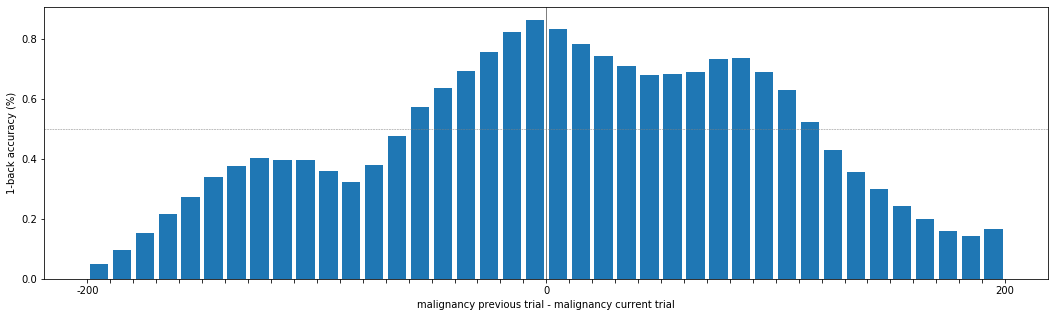

In [61]:
# PLOT 1: Similarity Barplot over all trials
y = data_per_bin['1back_accuracy']
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: above 0.5 SD is apparent

### 1-Back analysis before Merging two sides

<Figure size 432x288 with 0 Axes>

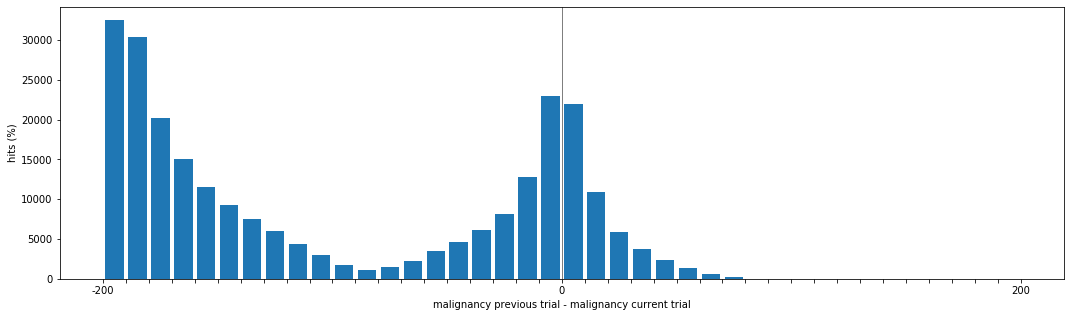

<Figure size 432x288 with 0 Axes>

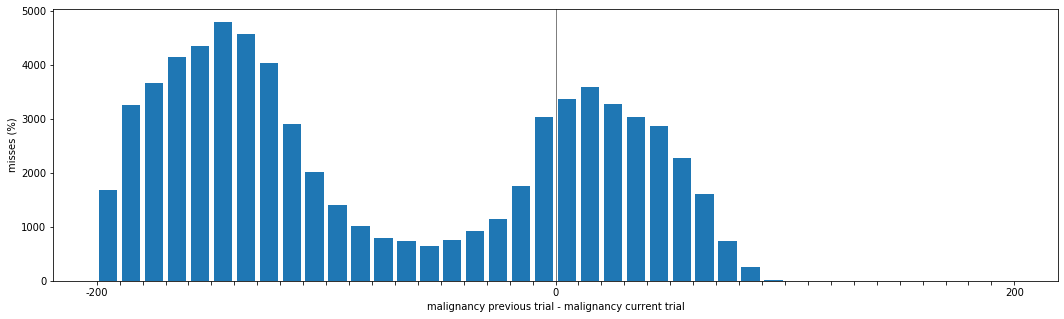

<Figure size 432x288 with 0 Axes>

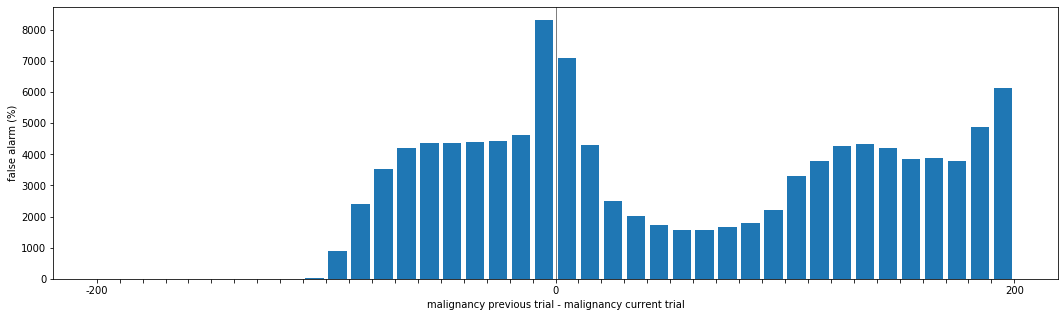

<Figure size 432x288 with 0 Axes>

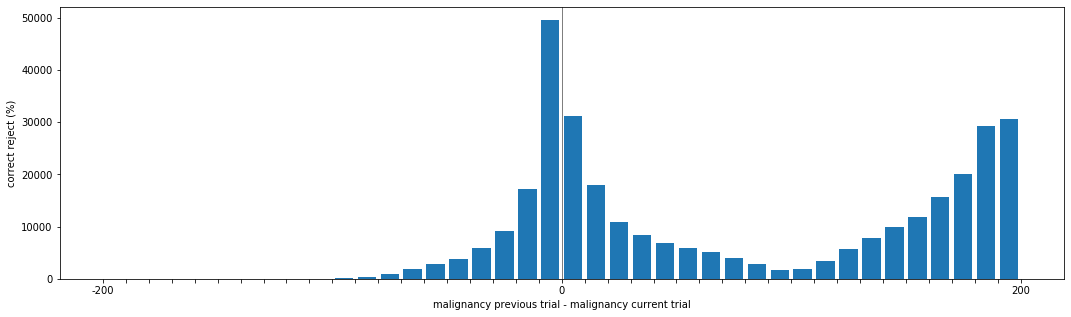

<Figure size 432x288 with 0 Axes>

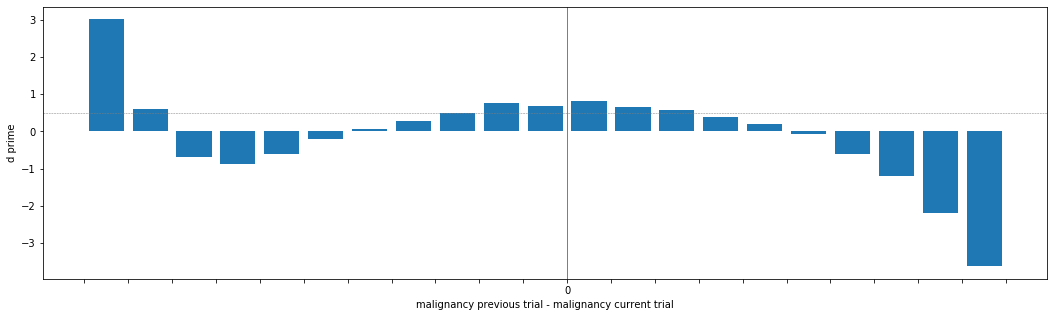

<Figure size 432x288 with 0 Axes>

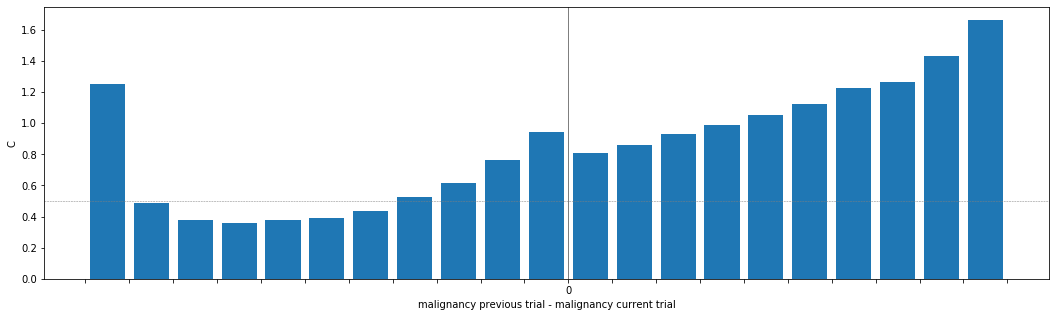

<Figure size 432x288 with 0 Axes>

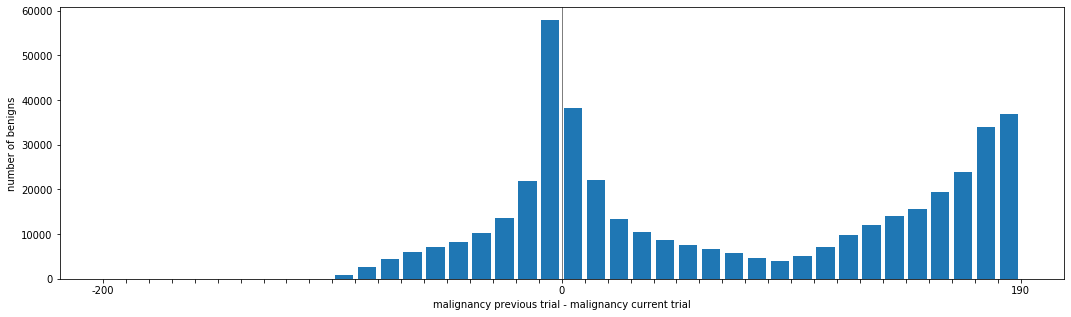

<Figure size 432x288 with 0 Axes>

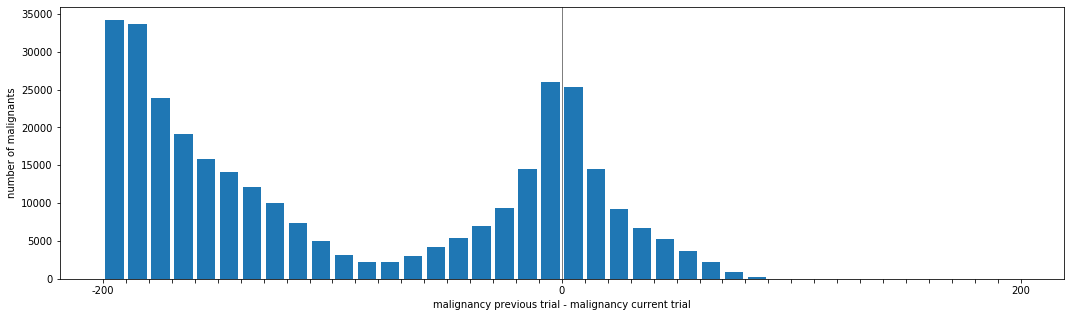

In [60]:
import scipy.stats as stats

hit_1back = []
miss_1back = []
FA_1back = []
CR_1back = []
lengths_1back = []
num_benign_1back = []
num_malignant_1back = []
# balance_rate = []
for start in np.arange(-200,210,10):
    data_temp = data[data['similarity_bins'] == pd.Interval(start, start + 10, closed='right')]
    lengths_1back.append(data_temp.shape[0])
#     hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
#     miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
    hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

    num_benign_1back.append(FA_1back[-1] + CR_1back[-1])
    num_malignant_1back.append(hit_1back[-1] + miss_1back[-1])
#     balance_rate.append(num_malignant[-1]/num_benign[-1])
    
# PLOT 1: hits
plt.figure()
y = hit_1back[:-1]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back[:-1]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back[:-1]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back[:-1]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1back[:-1], FA_1back[:-1], lengths_1back[:-1])]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1back[:-1], FA_1back[:-1], lengths_1back[:-1])]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: benign samples
plt.figure()
y = num_benign_1back[:-1]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 190
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of benigns')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: malignant samples
plt.figure()
y = num_malignant_1back[:-1]
x = data_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of malignants')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### 1-Back analysis after Merging two sides

/Users/peterren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/peterren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

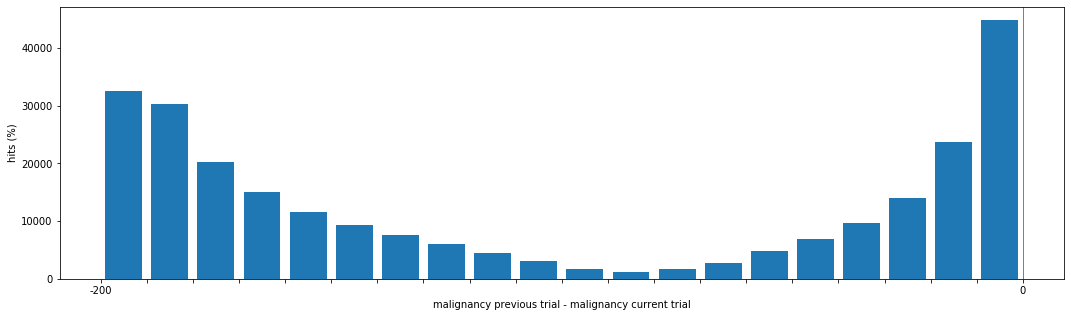

<Figure size 432x288 with 0 Axes>

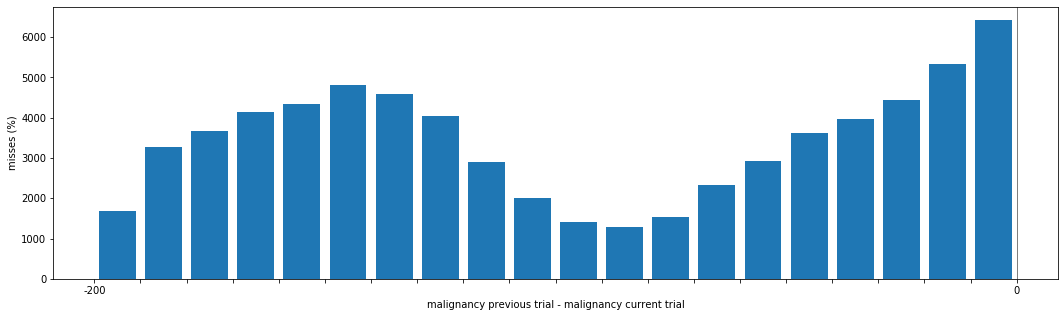

<Figure size 432x288 with 0 Axes>

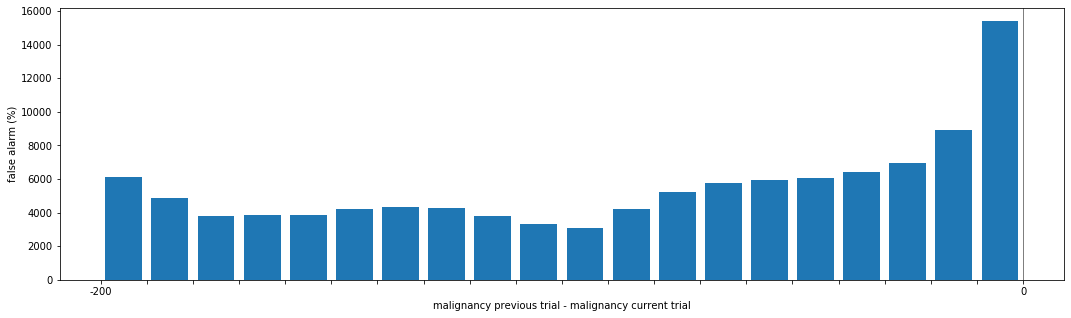

<Figure size 432x288 with 0 Axes>

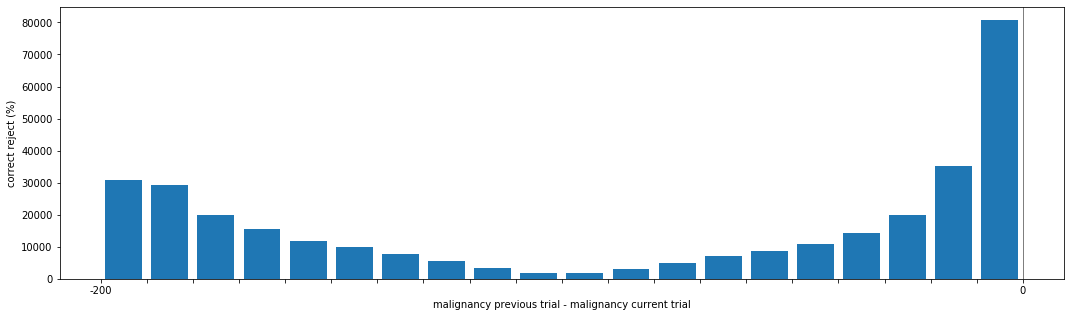

<Figure size 432x288 with 0 Axes>

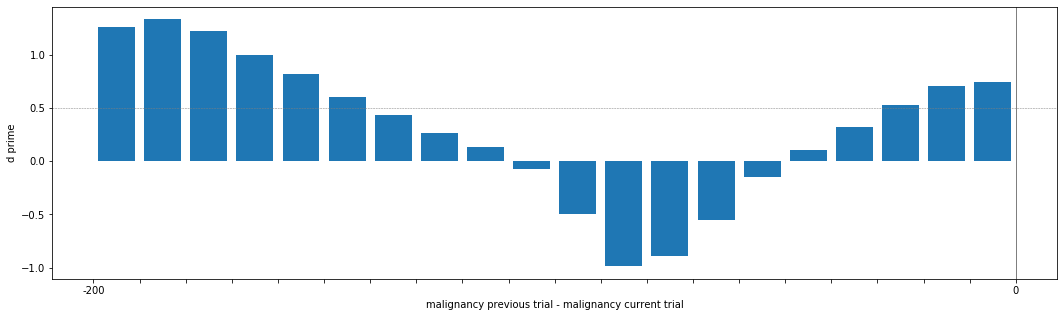

<Figure size 432x288 with 0 Axes>

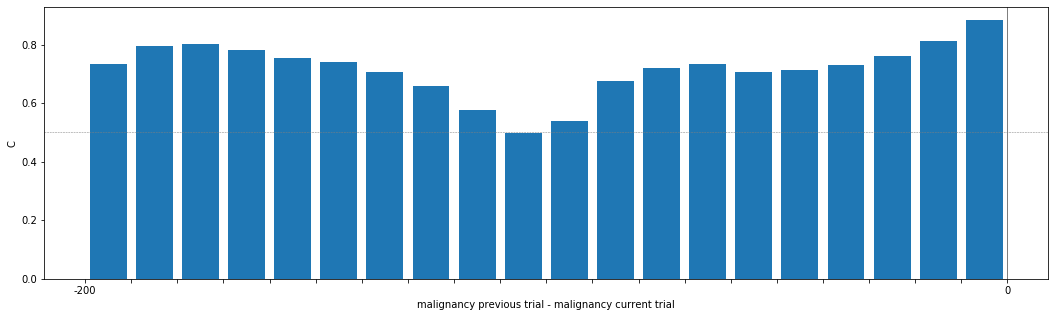

<Figure size 432x288 with 0 Axes>

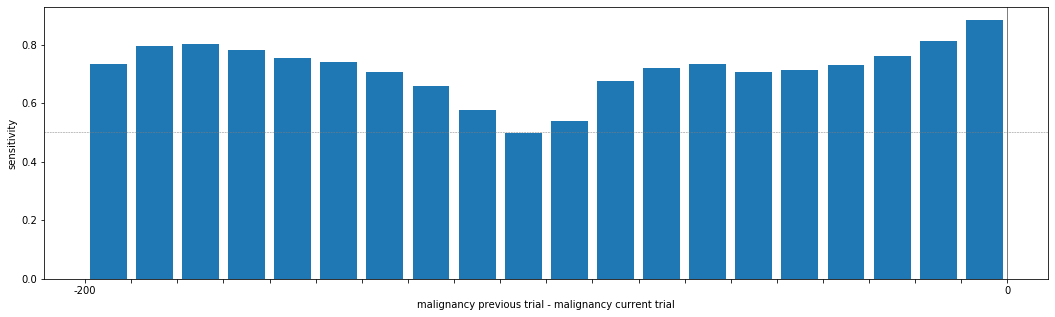

<Figure size 432x288 with 0 Axes>

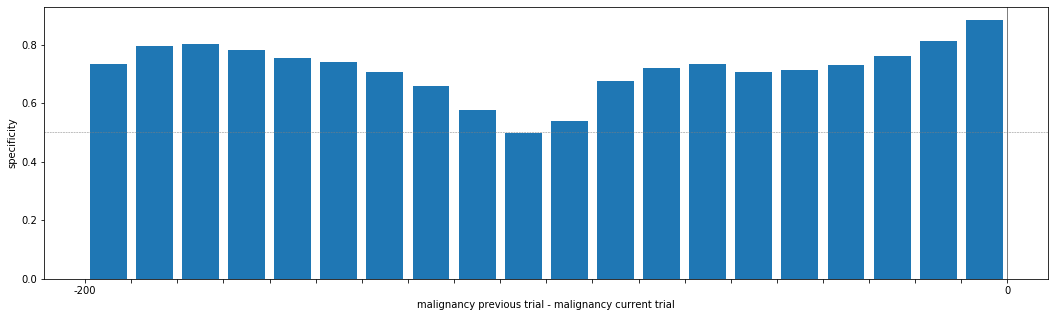

<Figure size 432x288 with 0 Axes>

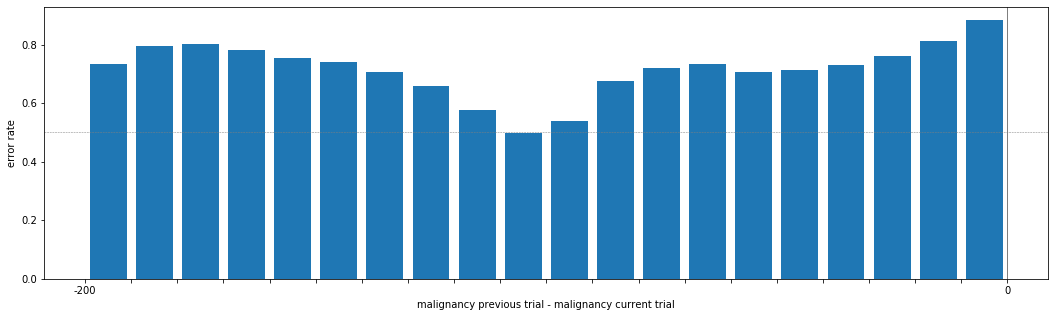

<Figure size 432x288 with 0 Axes>

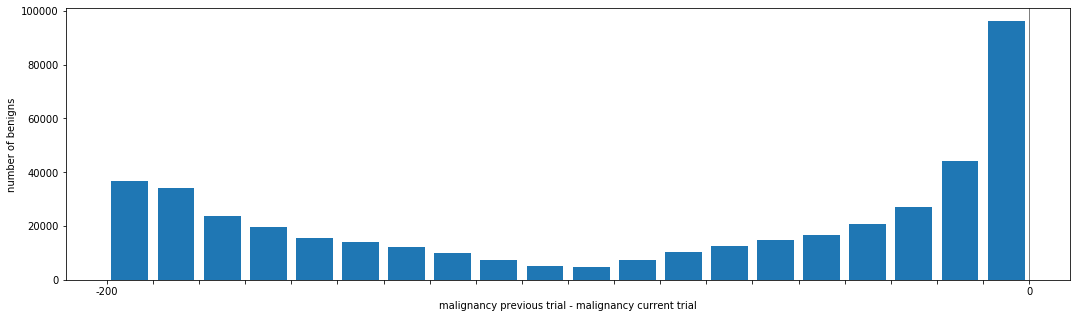

<Figure size 432x288 with 0 Axes>

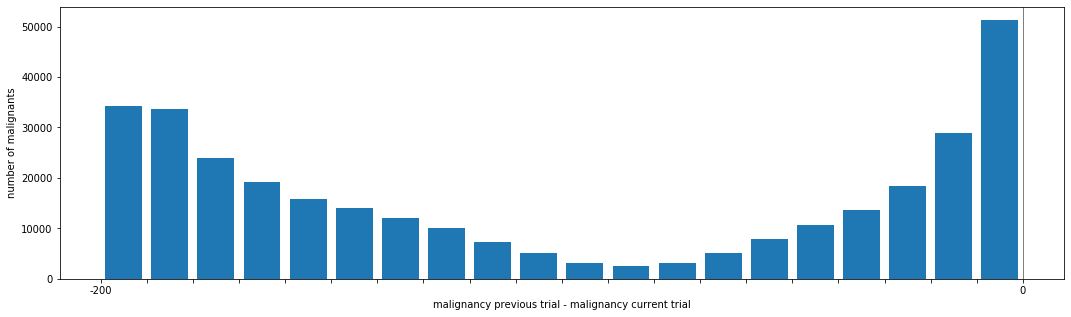

In [80]:
hit_1back_merge = np.zeros(20,)
miss_1back_merge = np.zeros(20,)
FA_1back_merge = np.zeros(20,)
CR_1back_merge = np.zeros(20,)
lengths_1back_merge = np.zeros(20,)
num_benign_1back_merge = np.zeros(20,)
num_malignant_1back_merge = np.zeros(20,)
sensitivity_1back_merge = np.zeros(20,)
specificity_1back_merge = np.zeros(20,)
error_rate_1back_merge = np.zeros(20,)

for i in range(20):
    hit_1back_merge[i] = hit_1back[i] + hit_1back[39 - i]
    miss_1back_merge[i] = miss_1back[i] + miss_1back[39 - i]
    FA_1back_merge[i] = FA_1back[i] + FA_1back[39 - i]
    CR_1back_merge[i] = CR_1back[i] + CR_1back[39 - i]
    lengths_1back_merge[i] = lengths_1back[i] + lengths_1back[39 - i]
    num_benign_1back_merge[i] = num_benign_1back[i] + num_benign_1back[39 - i]
    num_malignant_1back_merge[i] = num_malignant_1back[i] + num_malignant_1back[39 - i]
    
    sensitivity_1back_merge[i] = hit_1back_merge[i] / (hit_1back_merge[i] + miss_1back_merge[i])
    specificity_1back_merge[i] = CR_1back_merge[i] / (CR_1back_merge[i] + FA_1back_merge[i])
    error_rate_1back_merge[i] = 1 - (hit_1back_merge[i] + CR_1back_merge[i]) / lengths_1back_merge[i]

# PLOT 1: hits
plt.figure()
y = hit_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1back_merge, FA_1back_merge, lengths_1back_merge)]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1back_merge, FA_1back_merge, lengths_1back_merge)]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y_1back_sensitivity = sensitivity_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('sensitivity')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: specificity
plt.figure()
y_1back_sensitivity = specificity_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('specificity')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: error rate
plt.figure()
y_1back_sensitivity = error_rate_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('error rate')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 1: benign samples
plt.figure()
y = num_benign_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of benigns')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: malignant samples
plt.figure()
y = num_malignant_1back_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of malignants')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### Similarity-wise RT analysis

(array([15857., 13886., 14756., 13960., 12182., 10369.,  9442.,  8172.,
         8024.,  7195.,  6479.,  5922.,  6176.,  5564.,  5772.,  5134.,
         4677.,  4379.,  4026.,  3901.,  3215.,  2743.,  2653.,  2010.,
         1783.,  1597.,  1592.,  1869.,  1812.,  2075.,  2600.,  2672.,
         3105.,  3417.,  3738.,  4271.,  4704.,  4984.,  5500.,  5557.,
         6237.,  7374.,  7724.,  8787.,  9916., 12091., 15187., 20085.,
        24514., 28004., 48191., 24842., 20219., 15361., 12105.,  9969.,
         8675.,  7611.,  7269.,  6282.,  5556.,  5527.,  4948.,  4711.,
         4189.,  4002.,  3345.,  3119.,  2706.,  2500.,  2089.,  1870.,
         1832.,  1593.,  1490.,  1802.,  2142.,  2619.,  2716.,  3134.,
         3786.,  4082.,  4324.,  4597.,  5187.,  5656.,  5622.,  6050.,
         5959.,  6450.,  7355.,  8075.,  8270.,  9189., 10217., 12436.,
        14143., 14871., 13703., 15925.]),
 array([-200., -196., -192., -188., -184., -180., -176., -172., -168.,
        -164., -160., -

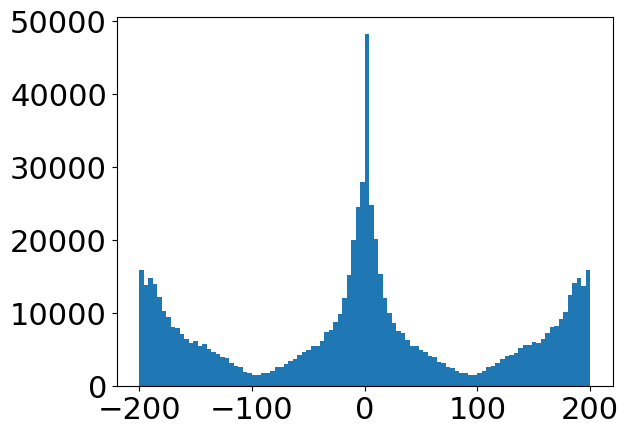

In [10]:
plt.hist(data['similarity_to_previous'], bins=100)

100%|██████████████████████████████████████████████████████████████████████████████| 713/713 [00:00<00:00, 8121.39it/s]


(-0.45, -0.05)

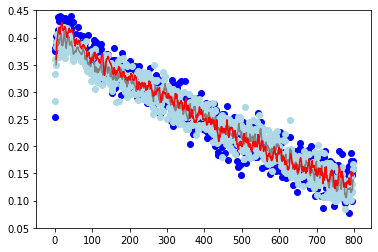

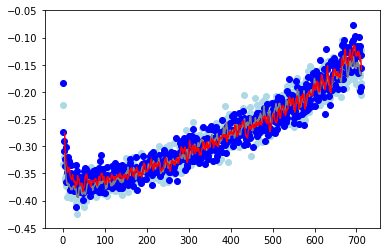

In [27]:
from tqdm import tqdm

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

#Based on similarity_to_previous
data_similar_ones = data[(data['similarity_to_previous']<100) & (data['similarity_to_previous']>-100)]
data_dissimilar_ones = data[~((data['similarity_to_previous']<100) & (data['similarity_to_previous']>-100))]

data_similar_ones = data_similar_ones.sort_values(by=["RT"])
data_dissimilar_ones = data_dissimilar_ones.sort_values(by=["RT"])

plt.figure()
similar_ones_biases_1back = []
for i in tqdm(range(len(data_similar_ones["RT"])//500)):
    similar_ones_biases_1back.append(data_similar_ones["1back_accuracy"][500*i:500*(i+1)].mean() - 0.5)
plt.scatter(range(len(data_similar_ones["RT"])//500), similar_ones_biases_1back, color='#0000FF')

dissimilar_ones_biases_1back = []
for i in tqdm(range(len(data_dissimilar_ones["RT"])//500)):
    dissimilar_ones_biases_1back.append(data_dissimilar_ones["1back_accuracy"][500*i:500*(i+1)].mean() - 0.5)
    

#Based on similarity_to_forward
similarity_1forward = data['malignancy'].shift(periods = -1) - data['malignancy'] #previous - current malignancy 
data['similarity_to_forward'] = similarity_1forward

data_similar_ones = data[(data['similarity_to_forward']<100) & (data['similarity_to_forward']>-100)]
data_dissimilar_ones = data[~((data['similarity_to_forward']<100) & (data['similarity_to_forward']>-100))]

data_similar_ones = data_similar_ones.sort_values(by=["RT"])
data_dissimilar_ones = data_dissimilar_ones.sort_values(by=["RT"])

similar_ones_biases_1forward = []
for i in tqdm(range(len(data_similar_ones["RT"])//500)):
    similar_ones_biases_1forward.append(data_similar_ones["1forward_accuracy"][500*i:500*(i+1)].mean() - 0.5)
plt.scatter(range(len(data_similar_ones["RT"])//500), similar_ones_biases_1forward, color='#ADD8E6')

dissimilar_ones_biases_1forward = []
for i in tqdm(range(len(data_dissimilar_ones["RT"])//500)):
    dissimilar_ones_biases_1forward.append(data_dissimilar_ones["1forward_accuracy"][500*i:500*(i+1)].mean() - 0.5)
    
#running mean calculation
similar_ones_biases_1forward_rm = running_mean(similar_ones_biases_1forward, 5)
similar_ones_biases_1back_rm = running_mean(similar_ones_biases_1back, 5)
plt.plot([x + 4 for x in range(len(data_similar_ones["RT"])//500 - 4)], similar_ones_biases_1forward_rm, '-', color='#808080')
plt.plot([x + 4 for x in range(len(data_similar_ones["RT"])//500 - 4)], similar_ones_biases_1back_rm, 'r-')

plt.ylim([0.05,0.45])


plt.figure()
plt.scatter(range(len(data_dissimilar_ones["RT"])//500), dissimilar_ones_biases_1forward, color='#ADD8E6')
plt.scatter(range(len(data_dissimilar_ones["RT"])//500), dissimilar_ones_biases_1back, color='#0000FF')

dissimilar_ones_biases_1forward_rm = running_mean(dissimilar_ones_biases_1forward, 5)
dissimilar_ones_biases_1back_rm = running_mean(dissimilar_ones_biases_1back, 5)
plt.plot([x + 4 for x in range(len(data_dissimilar_ones["RT"])//500 - 4)], dissimilar_ones_biases_1forward_rm, '-', color='#808080')
plt.plot([x + 4 for x in range(len(data_dissimilar_ones["RT"])//500 - 4)], dissimilar_ones_biases_1back_rm, 'r-')

plt.ylim([-0.45,-0.05])

100%|████████████████████████████████████████████████████████████████████████████| 1512/1512 [00:00<00:00, 3877.09it/s]


(-0.2, 0.2)

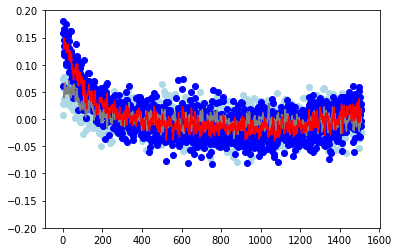

In [28]:
data_RT_ordered = data.sort_values(by=["RT"])
all_biases_1forward = []
all_biases_1back = []
for i in tqdm(range(len(data_RT_ordered["RT"])//500)):
    all_biases_1forward.append(data_RT_ordered["1forward_accuracy"][500*i:500*(i+1)].mean() - 0.5)
    all_biases_1back.append(data_RT_ordered["1back_accuracy"][500*i:500*(i+1)].mean() - 0.5)
plt.scatter(range(len(data_RT_ordered["RT"])//500), all_biases_1forward, color='#ADD8E6')
plt.scatter(range(len(data_RT_ordered["RT"])//500), all_biases_1back, color='#0000FF')

all_biases_1forward_rm = running_mean(all_biases_1forward, 5)
all_biases_1back_rm = running_mean(all_biases_1back, 5)
plt.plot([x + 4 for x in range(len(data_RT_ordered["RT"])//500 - 4)], all_biases_1forward_rm, '-', color='#808080')
plt.plot([x + 4 for x in range(len(data_RT_ordered["RT"])//500 - 4)], all_biases_1back_rm, 'r-')

plt.ylim([-0.2,0.2])

100%|████████████████████████████████████████████████████████████████████████████| 1512/1512 [00:00<00:00, 3828.39it/s]


(-0.2, 0.2)

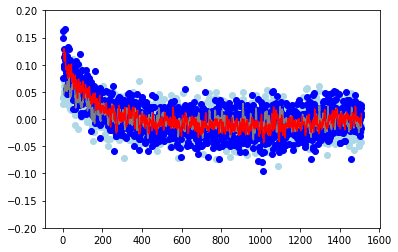

In [29]:
def get_forward(dataframe, id_col, correct_col, chosen_col, n_back):    
    df = dataframe
    is_valid = df[id_col].value_counts(sort=False)>n_back
    result = np.array([]) # create empty list
    for i, subject in enumerate(np.unique(df[id_col])): # loop over subjects
        if is_valid.values[i] == True:
            true_false_list = np.empty(np.abs(n_back)) # initialize with nan for first n_back trials
            true_false_list[:] = np.nan # select rows of currect subject
            df_subj = df.loc[df[id_col]==subject,]
            choices_subj = df_subj[chosen_col] 
            correct_subj = df_subj[correct_col] 
            tmp_list = np.array(choices_subj == correct_subj.shift(periods = n_back)) # calculate accuracy (True if choice[t] == correct[t-n_back], else False)
            true_false_list = np.append(tmp_list[:n_back], true_false_list) # append to inialized list
            result = np.append(result, true_false_list)
            
        elif is_valid.values[i] == False:
            num_rows = df[id_col][df[id_col]==subject].value_counts()
            true_false_list = np.empty([num_rows.values[0]]) # initialize with nan for rows with invalid data
            true_false_list[:] = np.nan
            result = np.append(result, true_false_list)

    return(result)

data['2forward_accuracy'] = get_forward(n_back = -2, dataframe = data, id_col = 'user_id', correct_col = 'current_correct_answer', chosen_col = 'chosen_answer')

data_RT_ordered = data.sort_values(by=["RT"])
all_biases_2forward = []
all_biases_2back = []
for i in tqdm(range(len(data_RT_ordered["RT"])//500)):
    all_biases_2forward.append(data_RT_ordered["2forward_accuracy"][500*i:500*(i+1)].mean() - 0.5)
    all_biases_2back.append(data_RT_ordered["2back_accuracy"][500*i:500*(i+1)].mean() - 0.5)
plt.scatter(range(len(data_RT_ordered["RT"])//500), all_biases_2forward, color='#ADD8E6')
plt.scatter(range(len(data_RT_ordered["RT"])//500), all_biases_2back, color='#0000FF')

all_biases_2forward_rm = running_mean(all_biases_2forward, 5)
all_biases_2back_rm = running_mean(all_biases_2back, 5)
plt.plot([x + 4 for x in range(len(data_RT_ordered["RT"])//500 - 4)], all_biases_2forward_rm, '-', color='#808080')
plt.plot([x + 4 for x in range(len(data_RT_ordered["RT"])//500 - 4)], all_biases_2back_rm, 'r-')

plt.ylim([-0.2,0.2])

(-0.2, 0.2)

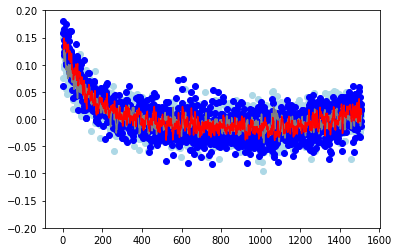

In [30]:
plt.scatter(range(len(data_RT_ordered["RT"])//500), all_biases_2back, color='#ADD8E6')
plt.scatter(range(len(data_RT_ordered["RT"])//500), all_biases_1back, color='#0000FF')

plt.plot([x + 4 for x in range(len(data_RT_ordered["RT"])//500 - 4)], all_biases_2back_rm, '-', color='#808080')
plt.plot([x + 4 for x in range(len(data_RT_ordered["RT"])//500 - 4)], all_biases_1back_rm, 'r-')

plt.ylim([-0.2,0.2])

#### RT Permutation Analysis

100%|██████████████████████████████████████| 707/707 [00:00<00:00, 29234.22it/s]


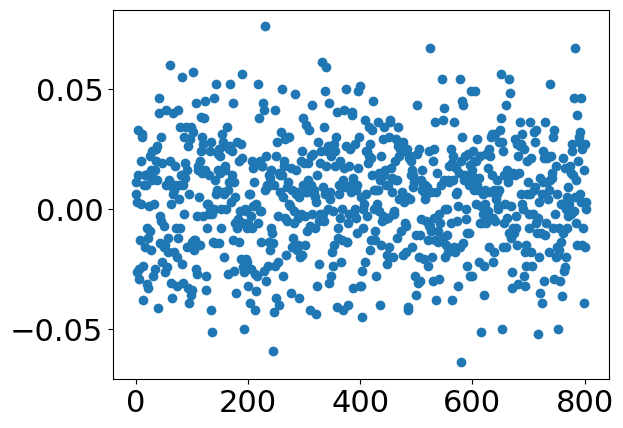

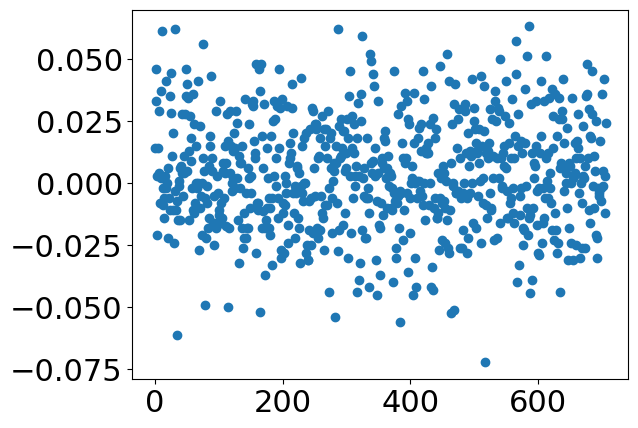

In [25]:
def get_backward(dataframe, id_col, correct_col, chosen_col, n_back):    
    df = dataframe
    is_valid = df[id_col].value_counts(sort=False)>n_back
    result = np.array([]) # create empty list
    for i, subject in enumerate(np.unique(df[id_col])): # loop over subjects
        if is_valid.values[i] == True:
            true_false_list = np.empty([n_back]) # initialize with nan for first n_back trials
            true_false_list[:] = np.nan # select rows of currect subject
            df_subj = df.loc[df[id_col]==subject,]
            choices_subj = df_subj[chosen_col] 
            correct_subj = df_subj[correct_col] 
            tmp_list = np.array(choices_subj == correct_subj.shift(periods = n_back)) # calculate accuracy (True if choice[t] == correct[t-n_back], else False)
            true_false_list = np.append(true_false_list, tmp_list[n_back:]) # append to inialized list
            result = np.append(result, true_false_list)
            
        elif is_valid.values[i] == False:
            num_rows = df[id_col][df[id_col]==subject].value_counts()
            true_false_list = np.empty([num_rows.values[0]]) # initialize with nan for rows with invalid data
            true_false_list[:] = np.nan
            result = np.append(result, true_false_list)

    return(result)

data_shuffled = data.copy()
# data_shuffled['chosen_answer'] = np.random.permutation(data_shuffled['chosen_answer'].values)
data_shuffled = data_shuffled.sample(frac=1).reset_index(drop=True)

## Recompute 1back_accuracy
data_shuffled['1back_accuracy'] = get_backward(n_back = 1, dataframe = data_shuffled, id_col = 'user_id', correct_col = 'current_correct_answer', chosen_col = 'chosen_answer')

## Recompute similarity
similarity_shuffled = data_shuffled['malignancy'].shift(periods = 1) - data_shuffled['malignancy'] #previous - current malignancy 
data_shuffled['similarity_to_previous'] = similarity_shuffled

data_similar_ones = data_shuffled[(data_shuffled['similarity_to_previous']<100) & (data_shuffled['similarity_to_previous']>-100)]
data_dissimilar_ones = data_shuffled[~((data_shuffled['similarity_to_previous']<100) & (data_shuffled['similarity_to_previous']>-100))]

data_similar_ones = data_similar_ones.sort_values(by=["RT"])
data_dissimilar_ones = data_dissimilar_ones.sort_values(by=["RT"])

plt.figure()
similar_ones_biases = []
for i in tqdm(range(len(data_similar_ones["RT"])//500)):
    similar_ones_biases.append(data_similar_ones["1back_accuracy"][500*i:500*(i+1)].mean() - 0.5)
plt.scatter(range(len(data_similar_ones["RT"])//500), similar_ones_biases)

plt.figure()
dissimilar_ones_biases = []
for i in tqdm(range(len(data_dissimilar_ones["RT"])//500)):
    dissimilar_ones_biases.append(data_dissimilar_ones["1back_accuracy"][500*i:500*(i+1)].mean() - 0.5)
plt.scatter(range(len(data_dissimilar_ones["RT"])//500), dissimilar_ones_biases)

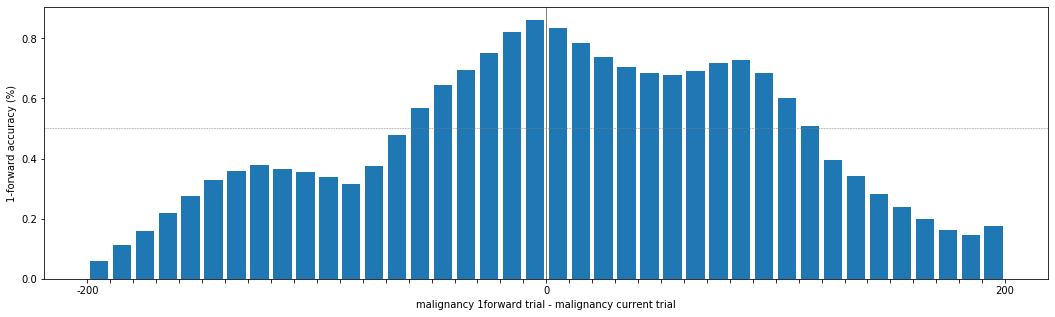

41


In [64]:
similarity_1forward = data['malignancy'].shift(periods = -1) - data['malignancy'] #previous - current malignancy 
data['similarity_to_1forward'] = similarity_1forward
data['similarity_1forward_bins'] = pd.cut(x=similarity_1forward, bins=np.arange(-200,210,10))
data_1forward_per_bin = data.groupby(['similarity_1forward_bins']).mean()

y = data_1forward_per_bin['1forward_accuracy']
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-forward accuracy (%)')
plt.xlabel('malignancy 1forward trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()
print(len(x_labels))

### 1-Forward analysis before Mergeing two sides

<Figure size 432x288 with 0 Axes>

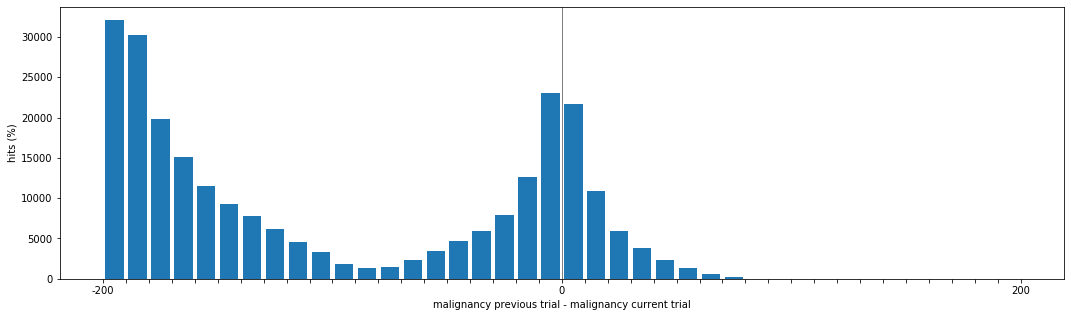

<Figure size 432x288 with 0 Axes>

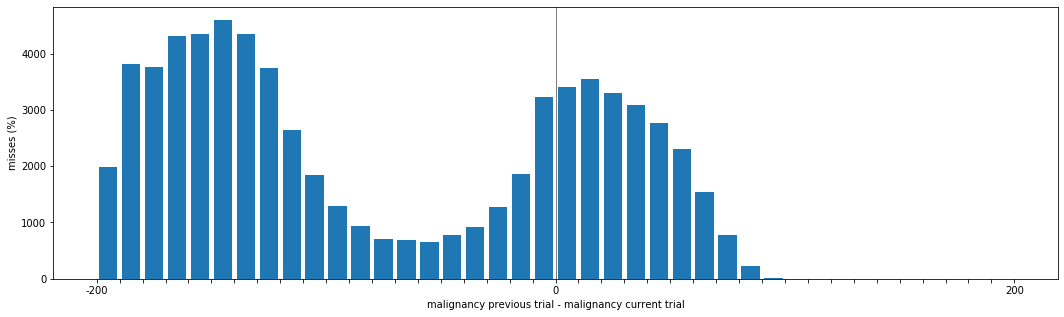

<Figure size 432x288 with 0 Axes>

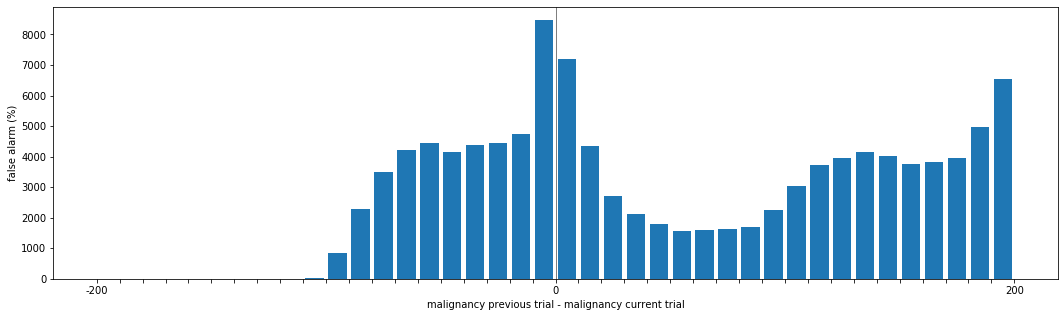

<Figure size 432x288 with 0 Axes>

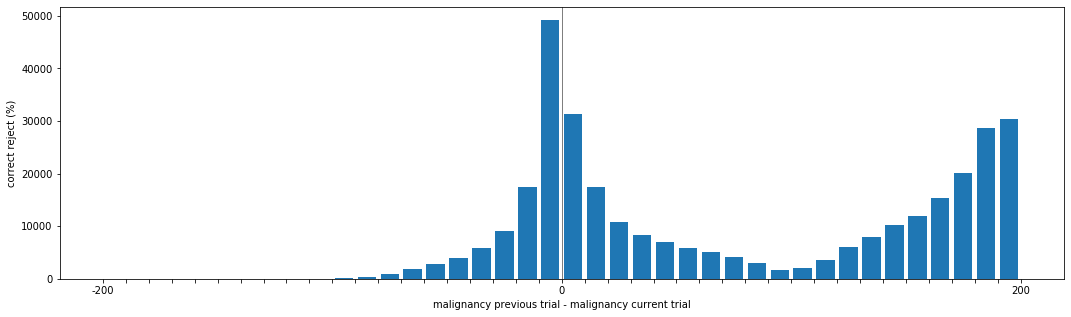

<Figure size 432x288 with 0 Axes>

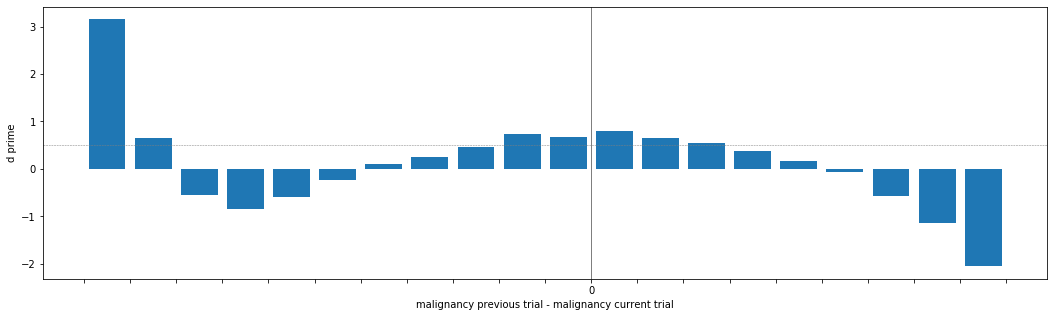

<Figure size 432x288 with 0 Axes>

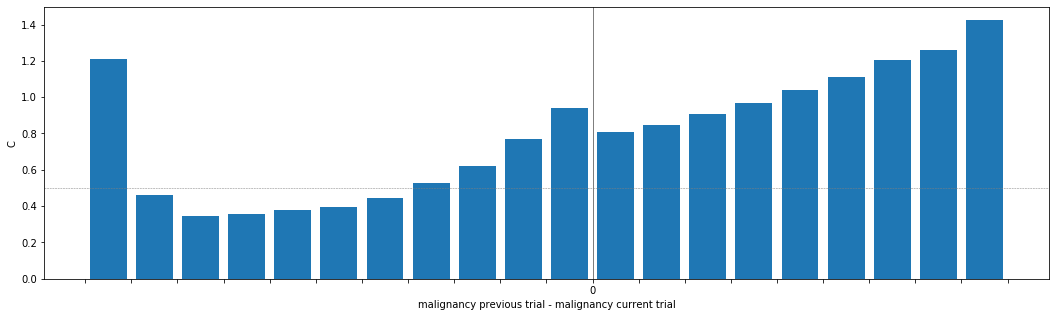

In [81]:
hit_1forward = []
miss_1forward = []
FA_1forward = []
CR_1forward = []
lengths_1forward = []

num_benign_1forward = []
num_malignant_1forward = []
for start in np.arange(-200,210,10):
    data_temp = data[data['similarity_1forward_bins'] == pd.Interval(start, start + 10, closed='right')]
    lengths_1forward.append(data_temp.shape[0])
#     hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
#     miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
    hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    
    num_benign_1forward.append(FA_1forward[-1] + CR_1forward[-1])
    num_malignant_1forward.append(hit_1forward[-1] + miss_1forward[-1])

# PLOT 1: hits
plt.figure()
y = hit_1forward[:-1]
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward[:-1]
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward[:-1]
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward[:-1]
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]
# y_1forward_d = [0 if a != a else a for a in y_1forward_d]
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]
# y_1forward_c = [0 if a != a else a for a in y_1forward_c]
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### 1-Forward analysis after Mergeing two sides

/Users/peterren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/peterren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

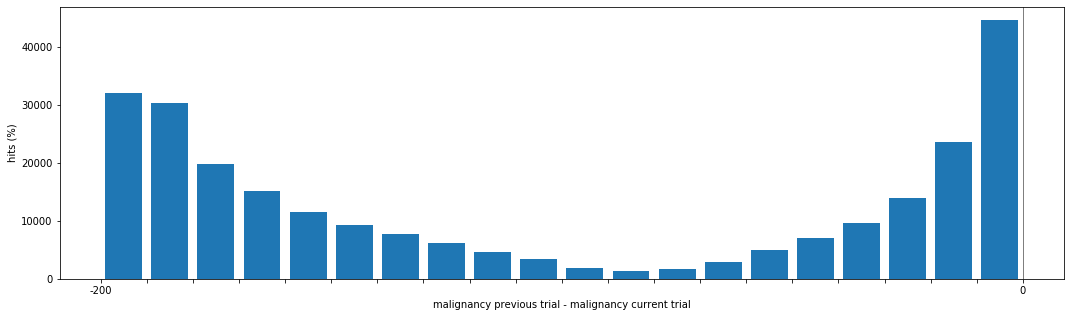

<Figure size 432x288 with 0 Axes>

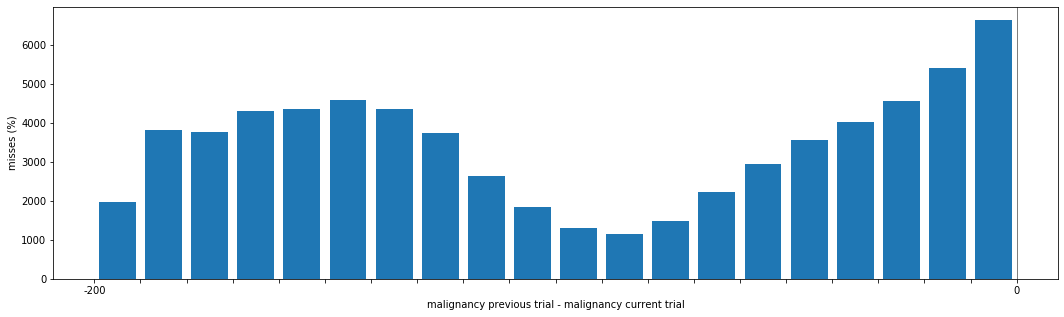

<Figure size 432x288 with 0 Axes>

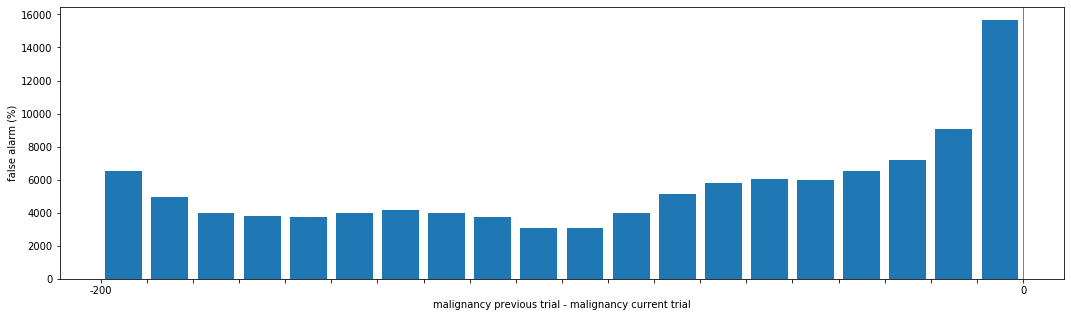

<Figure size 432x288 with 0 Axes>

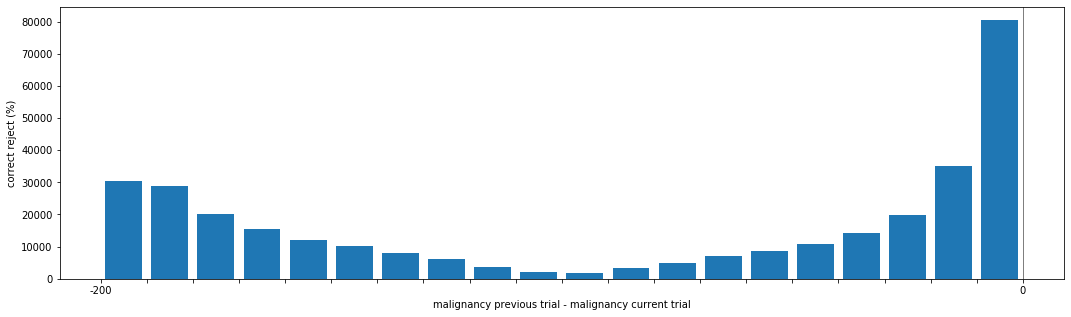

<Figure size 432x288 with 0 Axes>

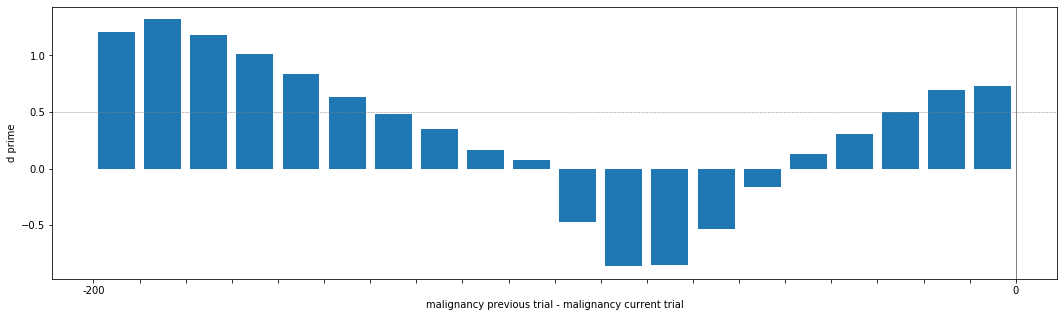

<Figure size 432x288 with 0 Axes>

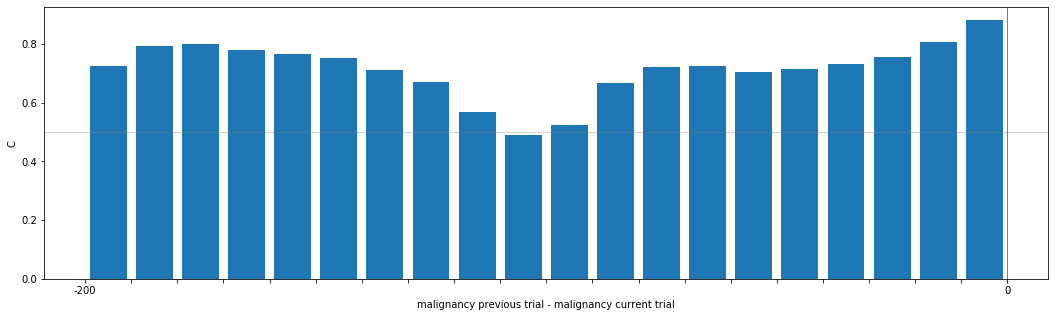

<Figure size 432x288 with 0 Axes>

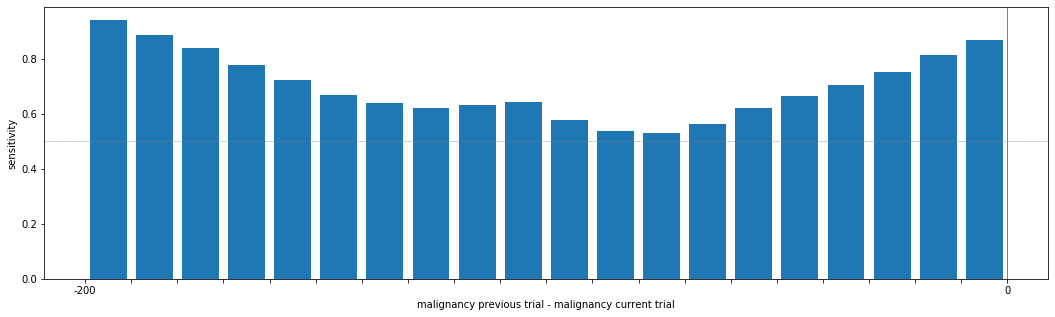

<Figure size 432x288 with 0 Axes>

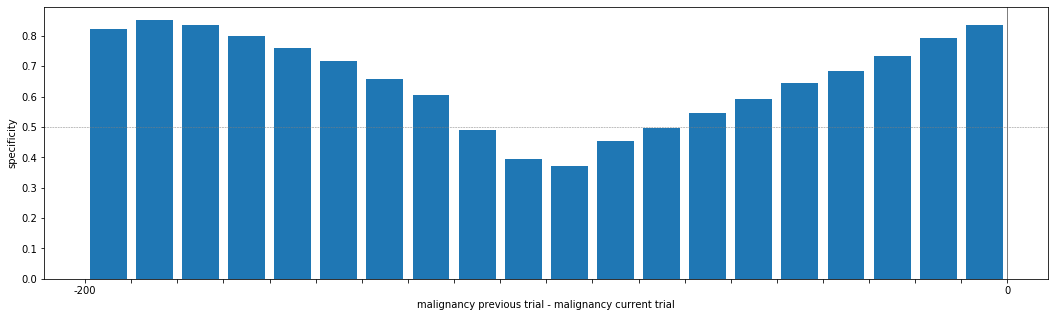

<Figure size 432x288 with 0 Axes>

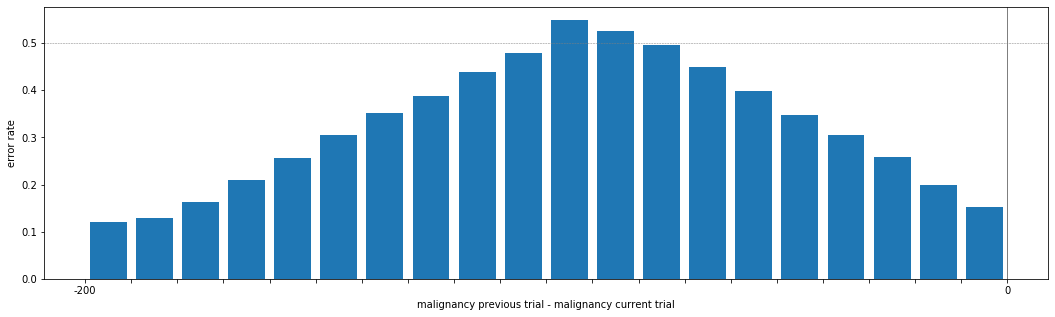

<Figure size 432x288 with 0 Axes>

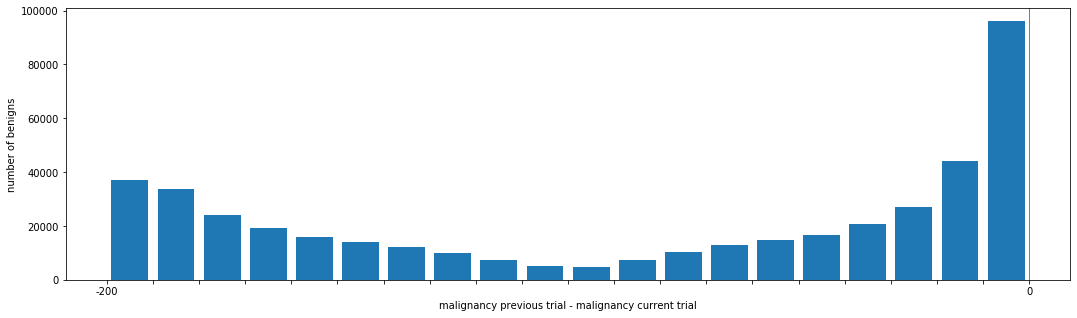

<Figure size 432x288 with 0 Axes>

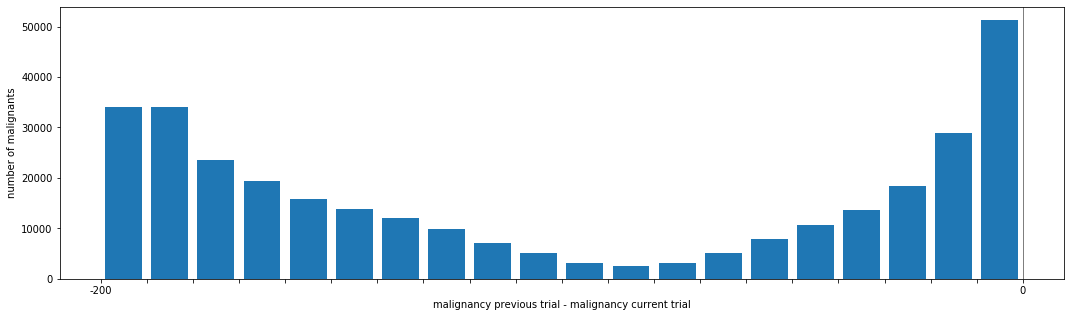

In [82]:
hit_1forward_merge = np.zeros(20,)
miss_1forward_merge = np.zeros(20,)
FA_1forward_merge = np.zeros(20,)
CR_1forward_merge = np.zeros(20,)
lengths_1forward_merge = np.zeros(20,)
num_benign_1forward_merge = np.zeros(20,)
num_malignant_1forward_merge = np.zeros(20,)
sensitivity_1forward_merge = np.zeros(20,)
specificity_1forward_merge = np.zeros(20,)
error_rate_1forward_merge = np.zeros(20,)

for i in range(20):
    hit_1forward_merge[i] = hit_1forward[i] + hit_1forward[39 - i]
    miss_1forward_merge[i] = miss_1forward[i] + miss_1forward[39 - i]
    FA_1forward_merge[i] = FA_1forward[i] + FA_1forward[39 - i]
    CR_1forward_merge[i] = CR_1forward[i] + CR_1forward[39 - i]
    lengths_1forward_merge[i] = lengths_1forward[i] + lengths_1forward[39 - i]
    num_benign_1forward_merge[i] = num_benign_1forward[i] + num_benign_1forward[39 - i]
    num_malignant_1forward_merge[i] = num_malignant_1forward[i] + num_malignant_1forward[39 - i]
    
    sensitivity_1forward_merge[i] = hit_1forward_merge[i] / (hit_1forward_merge[i] + miss_1forward_merge[i])
    specificity_1forward_merge[i] = CR_1forward_merge[i] / (CR_1forward_merge[i] + FA_1forward_merge[i])
    error_rate_1forward_merge[i] = 1 - (hit_1forward_merge[i] + CR_1forward_merge[i]) / lengths_1forward_merge[i]

# PLOT 1: hits
plt.figure()
y = hit_1forward_merge
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward_merge
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward_merge
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward_merge
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1forward_merge, FA_1forward_merge, lengths_1forward_merge)]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1forward_merge, FA_1forward_merge, lengths_1forward_merge)]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = sensitivity_1forward_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('sensitivity')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: specificity
plt.figure()
y = specificity_1forward_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('specificity')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: error rate
plt.figure()
y = error_rate_1forward_merge
x = data_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('error rate')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 1: benign samples
plt.figure()
y = num_benign_1forward_merge
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of benigns')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: malignant samples
plt.figure()
y = num_malignant_1forward_merge
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of malignants')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### Serial Dependence on 1-back accuracy before merging

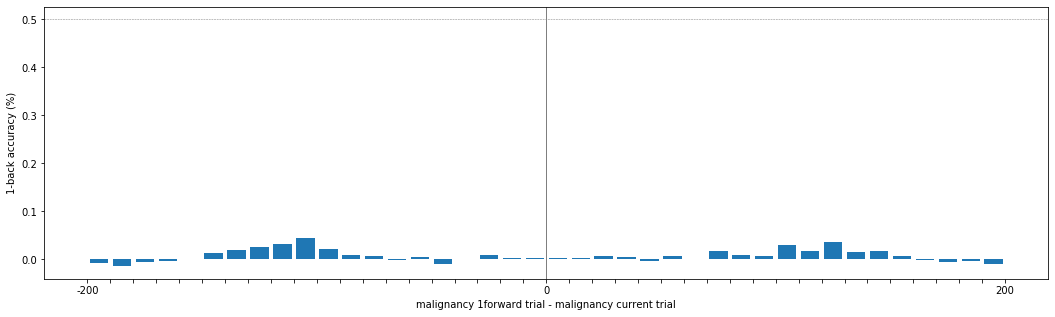

In [76]:
y = data_per_bin['1back_accuracy'] - data_1forward_per_bin['1forward_accuracy']
x = data_1forward_per_bin.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
x_labels[40] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('malignancy 1forward trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

### Serial Dependence on 1-back accuracy after merging

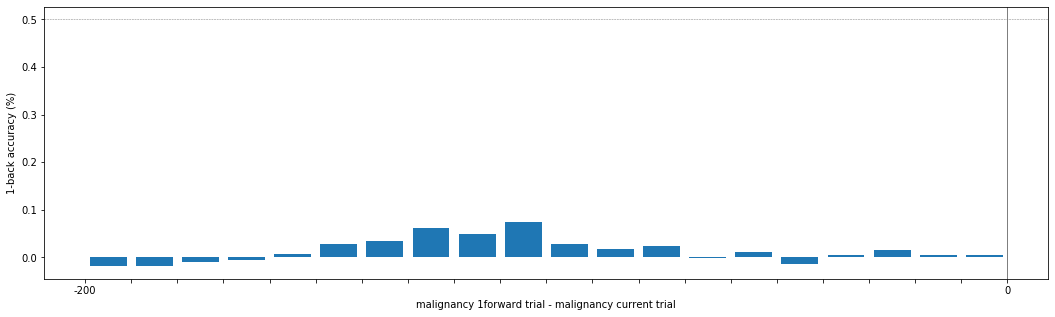

In [77]:
# y = data_per_bin['1back_accuracy'] - data_1forward_per_bin['1forward_accuracy']

y_merged = []
y = list(y)
for i in range(20):
    y_merged.append(y[i] + y[39 - i])
    
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_merged)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('malignancy 1forward trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

### Serial Dependence Analysis after merging

sum of hits:-2.38094923154863e-05
sum of miss:-1.7195744450073324e-05
sum of FA:1.3227495730826384e-06
sum of CR:-1.3227495730826384e-06
sum of sensitivity:-0.1941353479753229
sum of specificity:-0.11597408036683715
sum of error rate:0.14007261837354235


<Figure size 432x288 with 0 Axes>

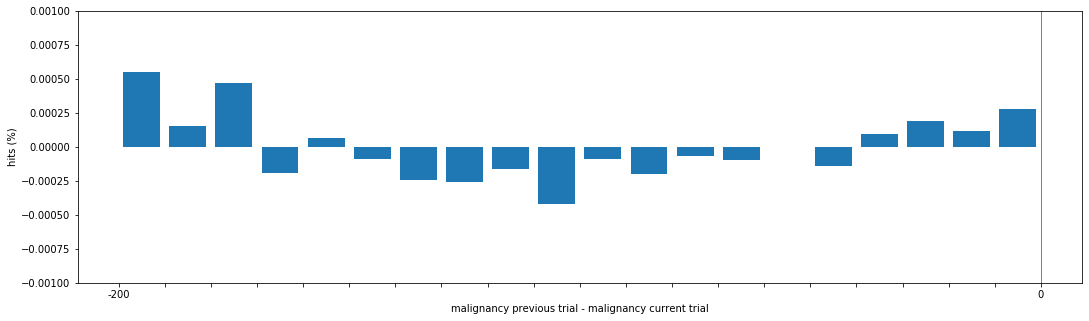

<Figure size 432x288 with 0 Axes>

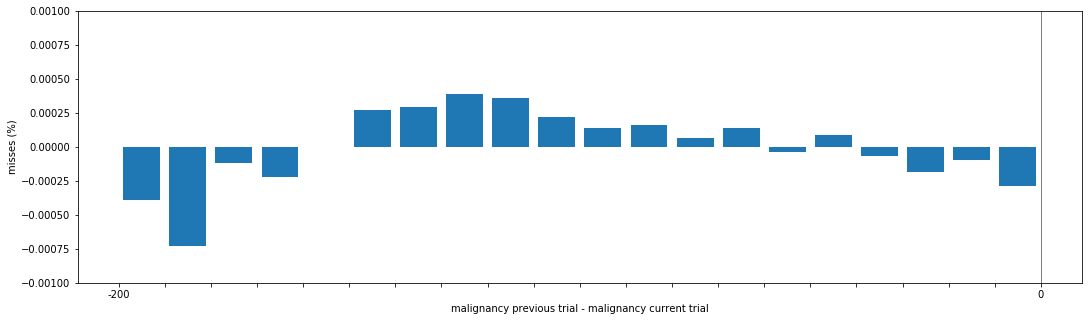

<Figure size 432x288 with 0 Axes>

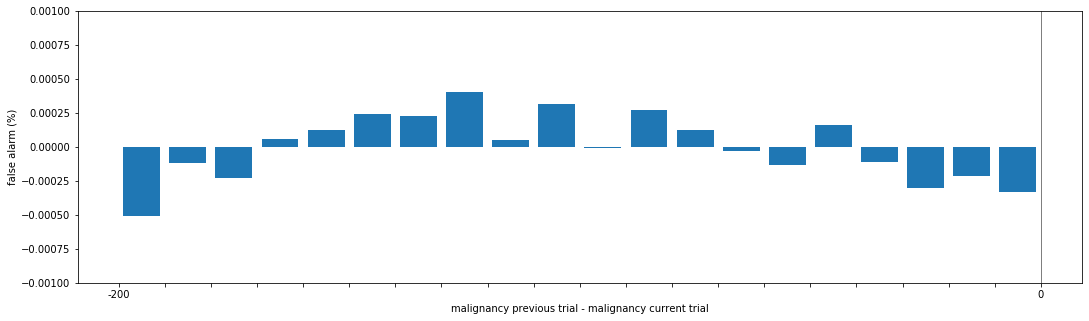

<Figure size 432x288 with 0 Axes>

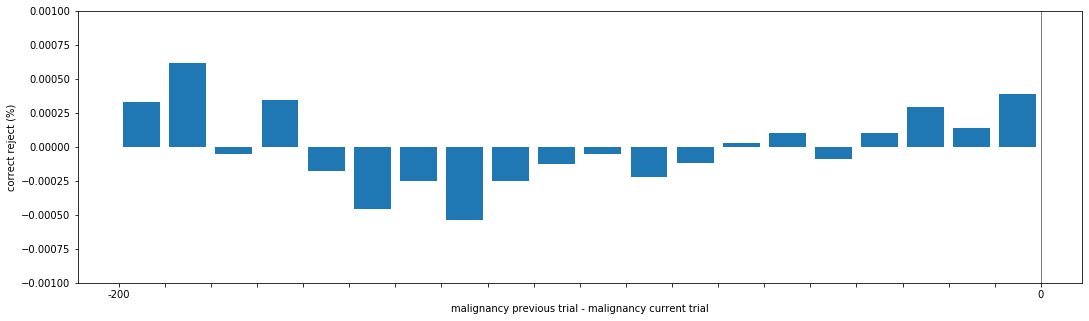

<Figure size 432x288 with 0 Axes>

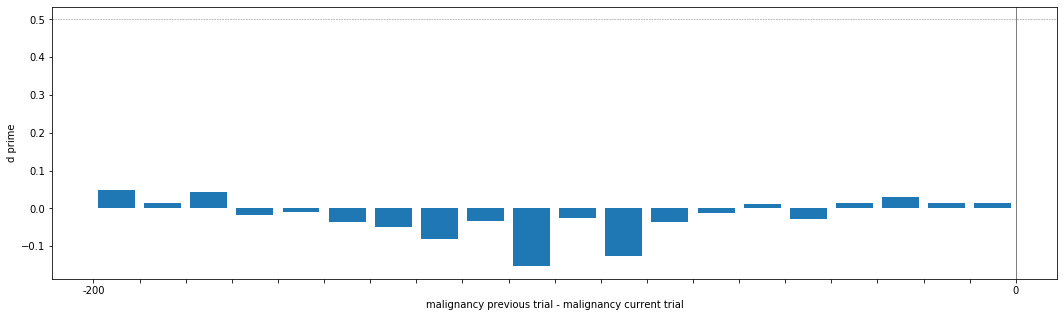

<Figure size 432x288 with 0 Axes>

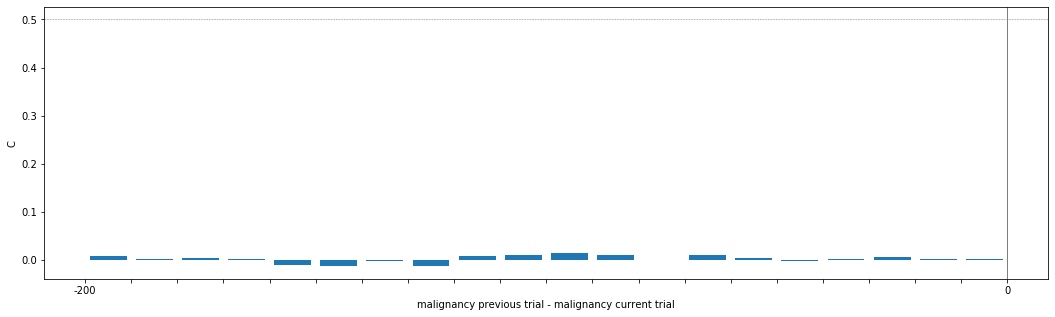

<Figure size 432x288 with 0 Axes>

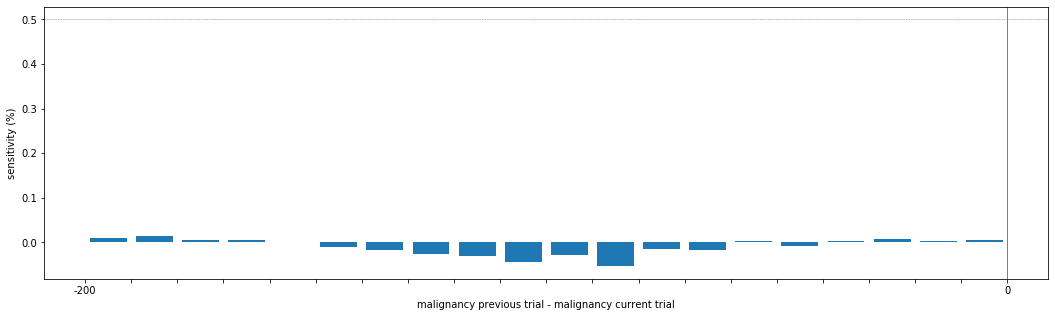

<Figure size 432x288 with 0 Axes>

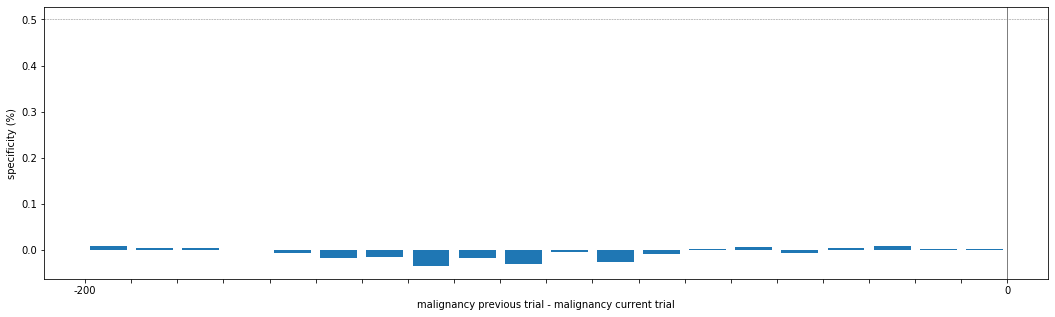

<Figure size 432x288 with 0 Axes>

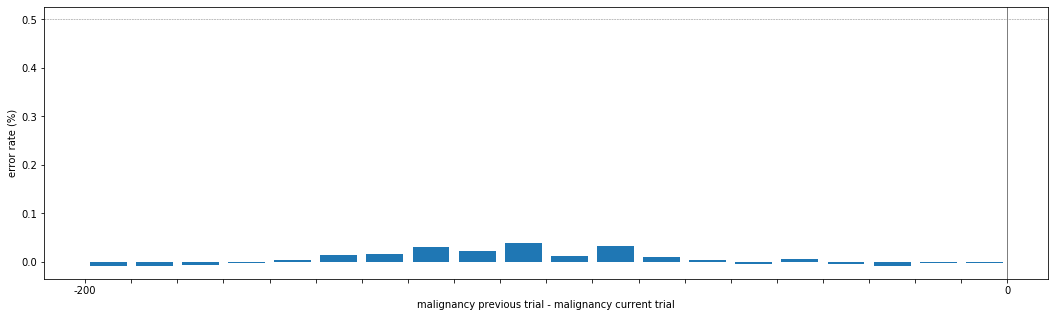

In [84]:
lenth = data.shape[0]
# PLOT 1: hits
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(hit_1back_merge, hit_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of hits:' + str(sum(y)))

# PLOT 2: miss
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(miss_1back_merge, miss_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of miss:' + str(sum(y)))

# PLOT 3: false alarm
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(FA_1back_merge, FA_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of FA:' + str(sum(y)))

# PLOT 4: correct reject
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(CR_1back_merge, CR_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of CR:' + str(sum(y)))

# PLOT 5: d'
plt.figure()
y = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('d prime')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('C')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = [a - b for (a,b) in zip(sensitivity_1back_merge, sensitivity_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('sensitivity (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of sensitivity:' + str(sum(y)))

# PLOT 8: specificity
plt.figure()
y = [a - b for (a,b) in zip(specificity_1back_merge, specificity_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('specificity (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of specificity:' + str(sum(y)))

# PLOT 9: error rate
plt.figure()
y = [a - b for (a,b) in zip(error_rate_1back_merge, error_rate_1forward_merge)]
x = data_1forward_per_bin.index[:20]
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[20] = 0
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('error rate (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of error rate:' + str(sum(y)))

### Serial Dependence vs d'

[0.00076683 0.50325161]


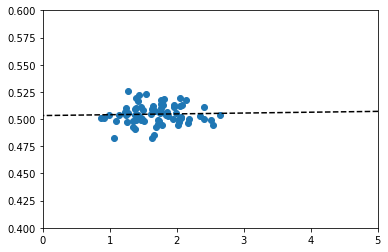

In [116]:
data_dropedna = data.dropna()

sample_size = 10000
N = len(data_dropedna) // sample_size

x_d = np.zeros(N,)
y_sd = np.zeros(N,)
for i in range(N):
    data_temp = data_dropedna[sample_size * i : sample_size * (i + 1)]
    hit_temp = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    FA_temp = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    x_d[i] = 1 / (stats.norm.ppf(hit_temp/sample_size) - stats.norm.ppf(FA_temp/sample_size))
    y_sd[i] = data_temp["1back_accuracy"].mean()

plt.scatter(x_d, y_sd)

coef = np.polyfit(x_d, y_sd, 1)
poly1d_fn = np.poly1d(coef)

x_0 = np.linspace(-5, 20, 100)
plt.plot(x_0, poly1d_fn(x_0),'--k')
plt.xlim(0,5)
plt.ylim(0.4,0.6)

print(coef)

In [70]:
data[(data['similarity_to_1forward']<50) & (data['similarity_to_1forward']>-50)]['1back_accuracy'].mean()

0.5071811748010496

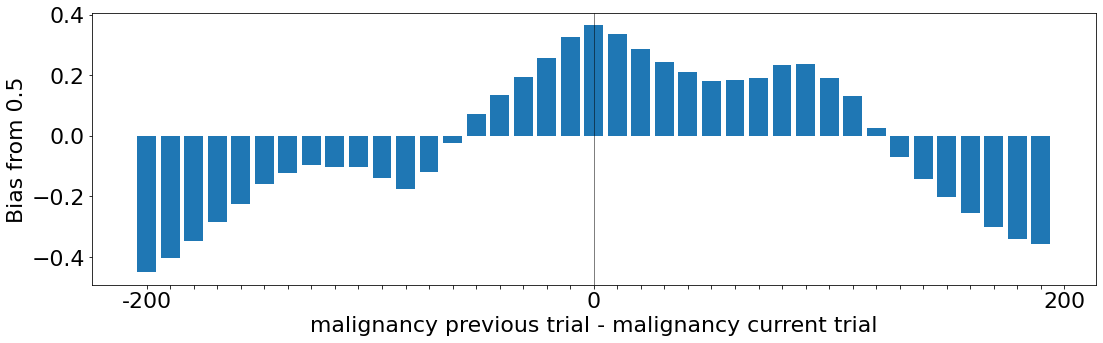

In [12]:
# PLOT 2: Similarity Barplot over all trials
y = data_per_bin['1back_accuracy']
y = y-0.5
x = data_per_bin.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Bias from 0.5')
plt.xlabel('malignancy previous trial - malignancy current trial')
#plt.title('Bias towards previous image for different levels of similarity')

plt.axvline(x=19,linewidth=0.5, color='black')

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: -0.5: Bias away from previous image, 0.5: Bias towards previous images 

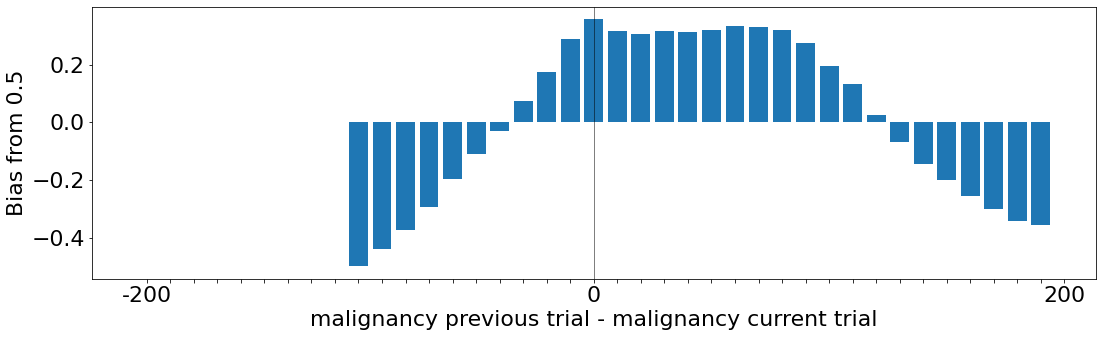

In [13]:
# PLOT 3: Similarity Barplot FOR NEVUS IN CURRENT TRIAL ONLY

nevus_only = data[data['current_correct_answer']== "['nevus']"]
data_per_bin_n = nevus_only.groupby(['similarity_bins']).mean()

y = data_per_bin_n['1back_accuracy']
y = y-0.5
y = y.fillna(0)
x = data_per_bin_n.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Bias from 0.5')
plt.xlabel('malignancy previous trial - malignancy current trial')
#plt.title('Bias towards previous image for different levels of similarity: Benign images in current trial only')

plt.axvline(x=19,linewidth=0.5, color='black')

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: -0.5: Bias away from previous image, 0.5: Bias towards previous images 

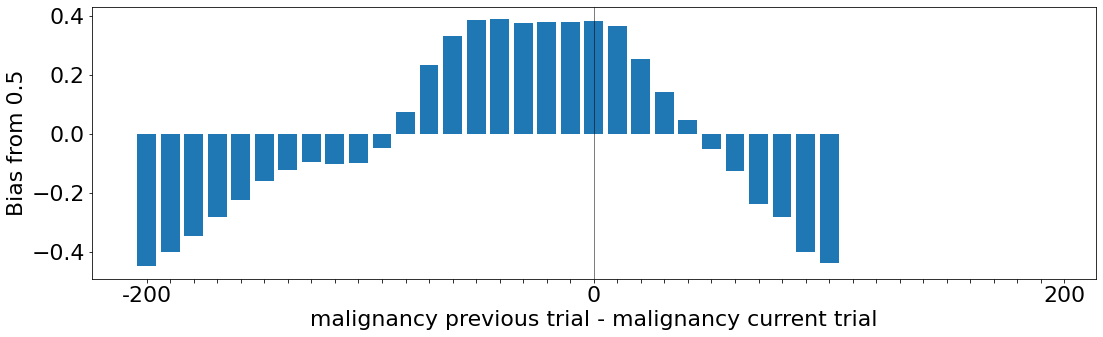

In [14]:
# PLOT 4: Similarity Barplot FOR MELANOMA IN CURRENT TRIAL ONLY

melanoma_only = data[data['current_correct_answer']== "['melanoma']"]
data_per_bin_m = melanoma_only.groupby(['similarity_bins']).mean()

y = data_per_bin_m['1back_accuracy']
y = y-0.5
y = y.fillna(0)
x = data_per_bin_m.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Bias from 0.5')
plt.xlabel('malignancy previous trial - malignancy current trial')
#plt.title('Bias towards previous image for different levels of similarity: Malignant images in current trial only')

plt.axvline(x=19,linewidth=0.5, color='black')

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: -0.5: Bias away from previous image, 0.5: Bias towards previous images 

In [ ]:
data.to_csv('prepped_data.csv')